In [2]:
import pandas as pd

In [3]:
ev_data=pd.read_csv('ev.csv')
ev_data

EV Maker        Place        State
0                   Tata Motors         Pune  Maharashtra
1             Mahindra Electric    Bengaluru    Karnataka
2                  Ather Energy    Bengaluru    Karnataka
3                 Hero Electric    New Delhi        Delhi
4                  Ola Electric  Krishnagiri   Tamil Nadu
..                          ...          ...          ...
57          YC Electric Vehicle        Delhi        Delhi
58  Dilli Electric Auto Pvt Ltd    New Delhi        Delhi
59           Electrotherm India    Ahmedabad      Gujarat
60        Lohia Auto Industries     Kashipur  Uttarakhand
61                 Euler Motors    New Delhi        Delhi

[62 rows x 3 columns]

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [5]:
ev_data['State'].unique()

array(['Maharashtra', 'Karnataka', 'Delhi', 'Tamil Nadu', 'Gujarat',
       'Haryana', 'Rajasthan', 'Telangana', 'West Bengal',
       'Andhra Pradesh', 'Madhya Pradesh', 'Punjab', 'Uttarakhand'],
      dtype=object)

In [6]:
ev_data['EV Maker'].unique()

array(['Tata Motors', 'Mahindra Electric', 'Ather Energy',
       'Hero Electric', 'Ola Electric', 'Ashok Leyland',
       'TVS Motor Company', 'Bajaj Auto', 'MG Motor India',
       'Hyundai Motor India', 'Revolt Motors', 'Ampere Vehicles',
       'Okinawa Autotech', 'Kinetic Green Energy', 'BYD India',
       'JBM Auto', 'Piaggio Vehicles', 'Hero MotoCorp',
       'Etrio Automobiles', 'Triton Electric', 'Simple Energy',
       'Minda Industries', 'Exide Industries', 'Greaves Cotton',
       'Maruti Suzuki India', 'Renault India', 'Citroën India',
       'Audi India', 'Mercedes-Benz India', 'Kia Motors India',
       'Volvo Eicher', 'JSW Energy', 'Olectra Greentech', 'Force Motors',
       'TVS Electronics', 'Royal Enfield', 'Bharat Forge',
       'Hindustan Motors', 'Atul Auto', 'SML Isuzu', 'Mahindra Reva',
       'Ajanta Manufacturing', 'Tata Power', 'Ashok Leyland (EV Bus)',
       'HOP Electric Mobility', 'Omega Seiki Mobility', 'Bajaj Auto (EV)',
       'Tata AutoComp Systems', 

In [7]:
ev_data.groupby(['State','EV Maker']).count()

Place
State          EV Maker                          
Andhra Pradesh Kia Motors India                 1
Delhi          Dilli Electric Auto Pvt Ltd      1
               Euler Motors                     1
               Hero Electric                    1
               YC Electric Vehicle              1
...                                           ...
Telangana      Olectra Greentech                1
Uttarakhand    Lohia Auto Industries            2
West Bengal    Exide Industries                 1
               Hindustan Motors                 1
               Jezza Motors                     1

[61 rows x 1 columns]

In [8]:
ev_data.groupby('State')['EV Maker'].count()

State
Andhra Pradesh     1
Delhi              4
Gujarat            5
Haryana            6
Karnataka          6
Madhya Pradesh     1
Maharashtra       15
Punjab             1
Rajasthan          4
Tamil Nadu        11
Telangana          3
Uttarakhand        2
West Bengal        3
Name: EV Maker, dtype: int64

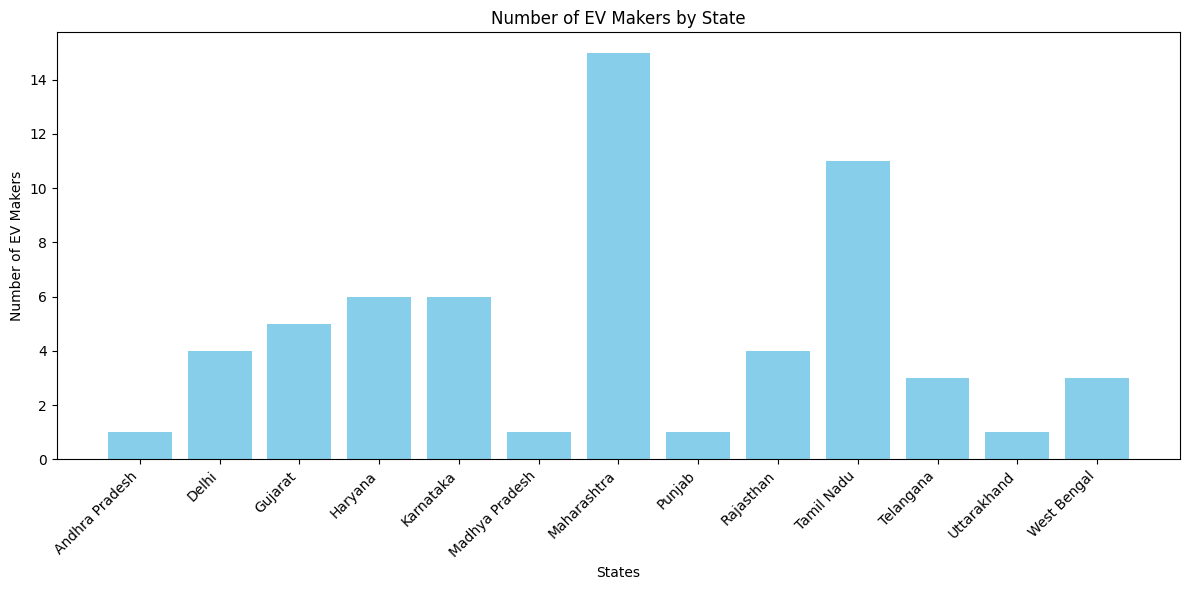

In [9]:
import matplotlib.pyplot as plt
ev_counts = ev_data.groupby('State')['EV Maker'].nunique().reset_index(name='Number of EV Makers')
plt.figure(figsize=(12, 6))
plt.bar(ev_counts['State'], ev_counts['Number of EV Makers'], color='skyblue')
plt.xlabel('States')
plt.ylabel('Number of EV Makers')

plt.title('Number of EV Makers by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [45]:
ev_sale=pd.read_csv('evsales.csv')
ev_sale



YEAR       2 W      3 W     4 W    BUS     TOTAL
0   Apr-17      96.0   4748.0   198.0    0.0    5042.0
1   May-17      91.0   6720.0   215.0    2.0    7028.0
2   Jun-17     137.0   7178.0   149.0    1.0    7465.0
3   Jul-17     116.0   8775.0   120.0    0.0    9011.0
4   Aug-17      99.0   8905.0   137.0    0.0    9141.0
..     ...       ...      ...     ...    ...       ...
70  Feb-23   66033.0  35995.0  4850.0   99.0  106977.0
71  Mar-23   86194.0  45225.0  8852.0   89.0  140360.0
72  Apr-23   66755.0  38016.0  6193.0   84.0  111048.0
73  May-23  105154.0  44615.0  7736.0  283.0  157788.0
74     NaN       NaN      NaN     NaN    NaN       NaN

[75 rows x 6 columns]

In [46]:
ev_sale

YEAR       2 W      3 W     4 W    BUS     TOTAL
0   Apr-17      96.0   4748.0   198.0    0.0    5042.0
1   May-17      91.0   6720.0   215.0    2.0    7028.0
2   Jun-17     137.0   7178.0   149.0    1.0    7465.0
3   Jul-17     116.0   8775.0   120.0    0.0    9011.0
4   Aug-17      99.0   8905.0   137.0    0.0    9141.0
..     ...       ...      ...     ...    ...       ...
70  Feb-23   66033.0  35995.0  4850.0   99.0  106977.0
71  Mar-23   86194.0  45225.0  8852.0   89.0  140360.0
72  Apr-23   66755.0  38016.0  6193.0   84.0  111048.0
73  May-23  105154.0  44615.0  7736.0  283.0  157788.0
74     NaN       NaN      NaN     NaN    NaN       NaN

[75 rows x 6 columns]

In [47]:
ev_sale.loc[:, 'YEAR'] = pd.to_datetime(ev_sale['YEAR'], format='%b-%y', errors='coerce').dt.year % 100

In [48]:
ev_sale = ev_sale.dropna(subset=['YEAR'])


In [49]:
ev_sale

YEAR       2 W      3 W     4 W    BUS     TOTAL
0   17.0      96.0   4748.0   198.0    0.0    5042.0
1   17.0      91.0   6720.0   215.0    2.0    7028.0
2   17.0     137.0   7178.0   149.0    1.0    7465.0
3   17.0     116.0   8775.0   120.0    0.0    9011.0
4   17.0      99.0   8905.0   137.0    0.0    9141.0
..   ...       ...      ...     ...    ...       ...
69  23.0   64649.0  34308.0  3490.0   98.0  102545.0
70  23.0   66033.0  35995.0  4850.0   99.0  106977.0
71  23.0   86194.0  45225.0  8852.0   89.0  140360.0
72  23.0   66755.0  38016.0  6193.0   84.0  111048.0
73  23.0  105154.0  44615.0  7736.0  283.0  157788.0

[74 rows x 6 columns]

In [50]:
bike_sales_per_year = ev_sale.groupby('YEAR')['2 W'].sum()

In [51]:
bike_sales_per_year

YEAR
17.0      1211.0
18.0     17062.0
19.0     30389.0
20.0     29112.0
21.0    156182.0
22.0    630725.0
23.0    388785.0
Name: 2 W, dtype: float64

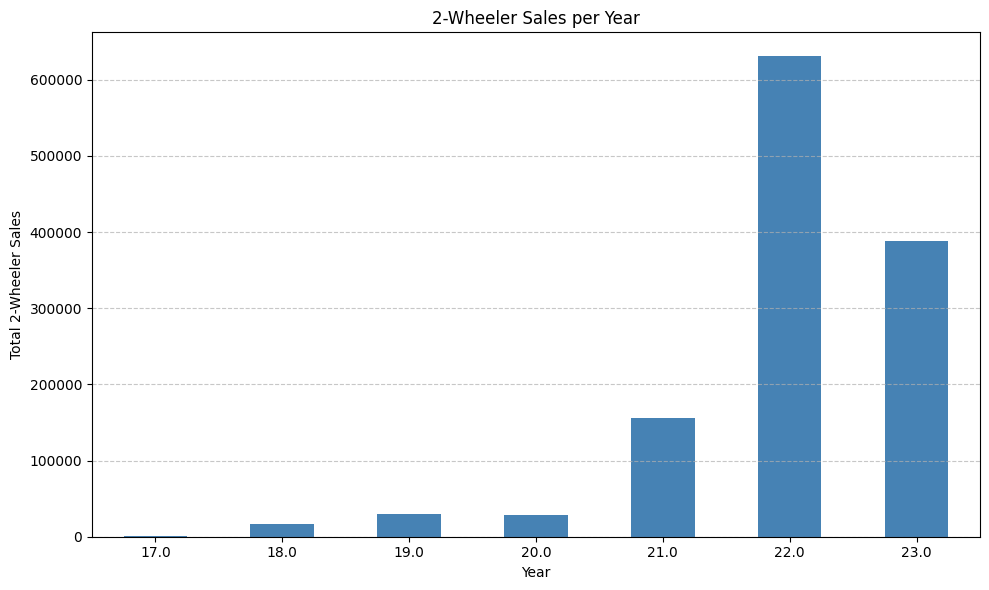

In [52]:
import matplotlib.pyplot as plt

# Group by Year and sum the '2 W' sales
bike_sales_per_year = ev_sale.groupby('YEAR')['2 W'].sum()

# Plotting the bar graph
plt.figure(figsize=(10,6))
bike_sales_per_year.plot(kind='bar', color='steelblue')

plt.title('2-Wheeler Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total 2-Wheeler Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [55]:
Threewheel_sales_per_year = ev_sale.groupby('YEAR')['3 W'].sum()

In [56]:
Threewheel_sales_per_year

YEAR
17.0     69307.0
18.0    110375.0
19.0    133489.0
20.0     90361.0
21.0    147180.0
22.0    350129.0
23.0    198159.0
Name: 3 W, dtype: float64

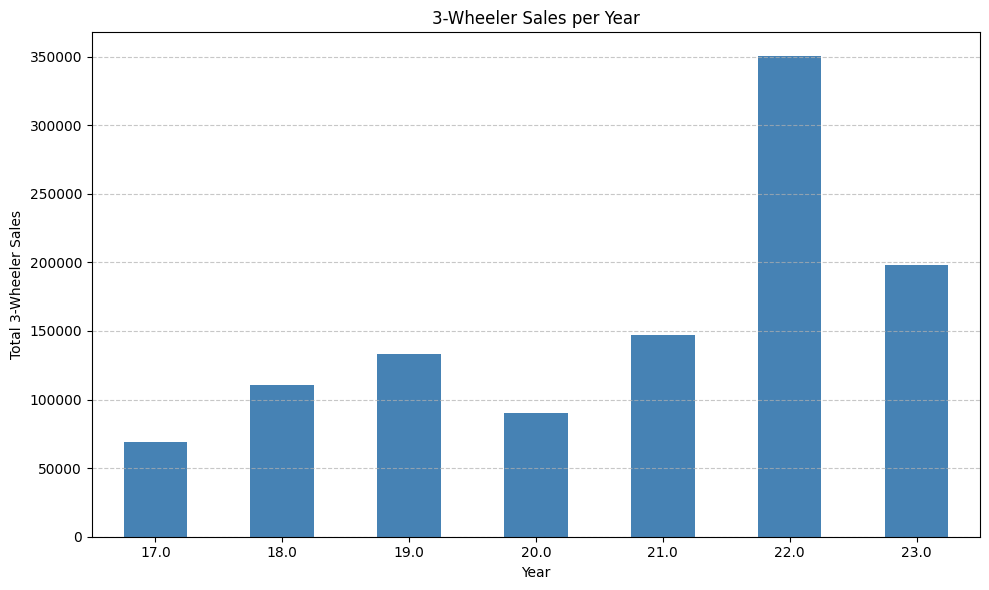

In [58]:
import matplotlib.pyplot as plt
Threewheel_sales_per_year = ev_sale.groupby('YEAR')['3 W'].sum()
plt.figure(figsize=(10,6))
Threewheel_sales_per_year.plot(kind='bar', color='steelblue')
plt.title('3-Wheeler Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total 3-Wheeler Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
car_sales_per_year = ev_sale.groupby('YEAR')['4 W'].sum()

In [60]:
car_sales_per_year

YEAR
17.0     1591.0
18.0     2500.0
19.0     1749.0
20.0     4323.0
21.0    14142.0
22.0    38744.0
23.0    31121.0
Name: 4 W, dtype: float64

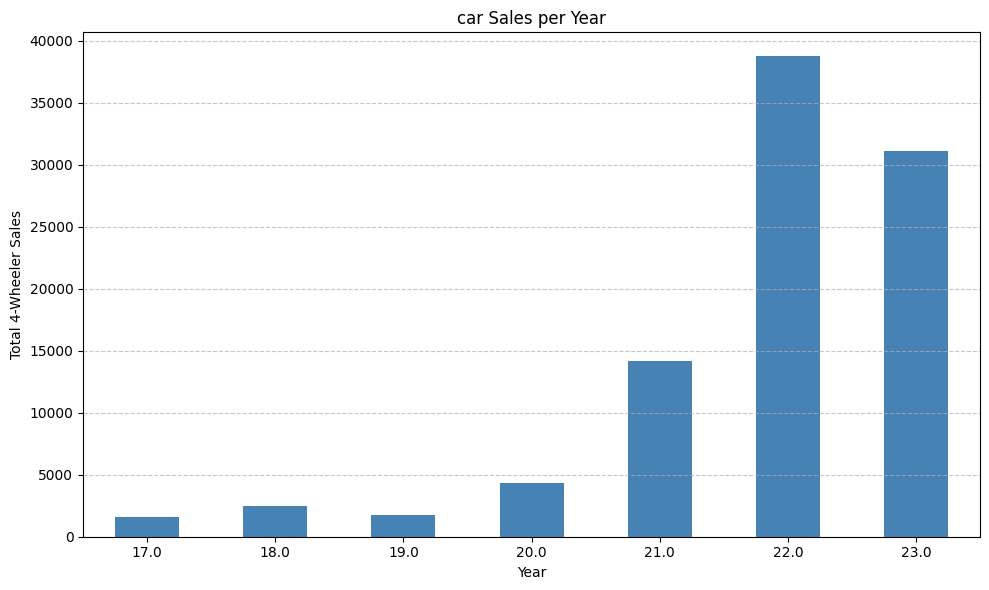

In [61]:
import matplotlib.pyplot as plt
car_sales_per_year = ev_sale.groupby('YEAR')['4 W'].sum()
plt.figure(figsize=(10,6))
car_sales_per_year.plot(kind='bar', color='steelblue')
plt.title('car Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total 4-Wheeler Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
bus_sales_per_year = ev_sale.groupby('YEAR')['BUS'].sum()

In [63]:
bus_sales_per_year

YEAR
17.0      14.0
18.0     680.0
19.0    1093.0
20.0      88.0
21.0    1180.0
22.0    2383.0
23.0     653.0
Name: BUS, dtype: float64

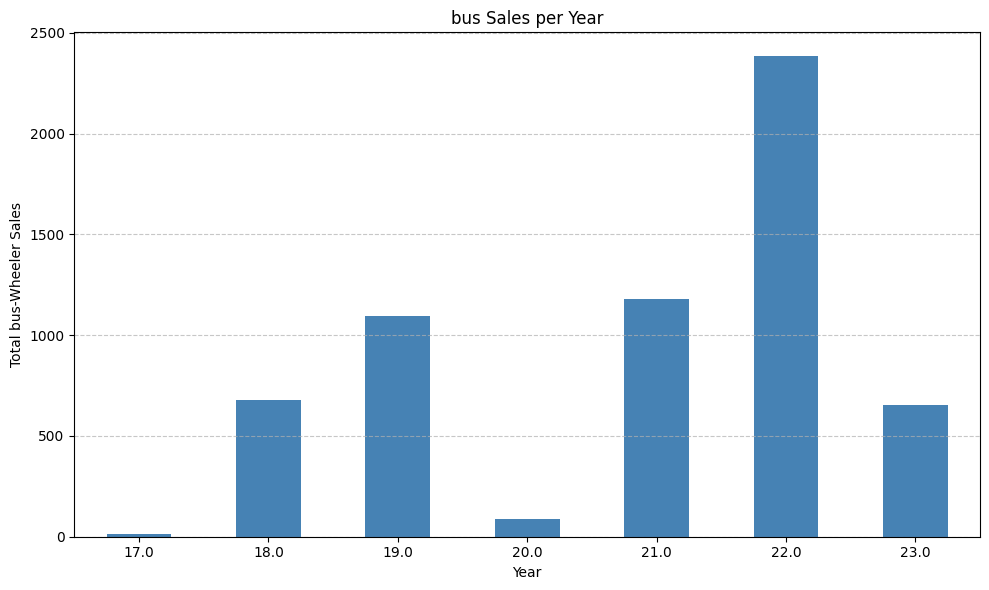

In [64]:
import matplotlib.pyplot as plt
bus_sales_per_year = ev_sale.groupby('YEAR')['BUS'].sum()
plt.figure(figsize=(10,6))
bus_sales_per_year.plot(kind='bar', color='steelblue')
plt.title('bus Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total bus-Wheeler Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [68]:
df=pd.read_csv('car_data.csv')

In [69]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0         450              161            940         Yes        AWD   
1         270              167            250         Yes        RWD   
2         400              181            620         Yes        AWD   
3         360              206            560         Yes        RWD   
4         170              168            190         Yes        RWD   
..        ...              ...            ...         ...        ...   
98        330              191            440         Yes        FWD   
99        335              258            540         Yes        AWD   
100       325              194            440         Yes        AWD   
101       375              232            450         Yes        AWD   
102       400              238            480         Yes        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[103 rows x 14 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [71]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000

In [73]:
df['Brand'].isna().sum()


0

In [75]:
df['Brand'].nunique()

33

In [76]:
df['Brand']

0           Tesla 
1      Volkswagen 
2        Polestar 
3             BMW 
4           Honda 
          ...     
98         Nissan 
99           Audi 
100        Nissan 
101        Nissan 
102         Byton 
Name: Brand, Length: 103, dtype: object

In [77]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0         450              161            940         Yes        AWD   
1         270              167            250         Yes        RWD   
2         400              181            620         Yes        AWD   
3         360              206            560         Yes        RWD   
4         170              168            190         Yes        RWD   
..        ...              ...            ...         ...        ...   
98        330              191            440         Yes        FWD   
99        335              258            540         Yes        AWD   
100       325              194            440         Yes        AWD   
101       375              232            450         Yes        AWD   
102       400              238            480         Yes        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[103 rows x 14 columns]

In [78]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000

In [79]:
conversion_rate = 97  
df['PriceINR'] = df['PriceEuro'] * conversion_rate
print(df[['Brand', 'Model', 'PriceEuro', 'PriceINR']])


           Brand                            Model  PriceEuro  PriceINR
0         Tesla     Model 3 Long Range Dual Motor      55480   5381560
1    Volkswagen                         ID.3 Pure      30000   2910000
2      Polestar                                 2      56440   5474680
3           BMW                              iX3       68040   6599880
4         Honda                                e       32997   3200709
..           ...                              ...        ...       ...
98       Nissan                       Ariya 63kWh      45000   4365000
99         Audi     e-tron S Sportback 55 quattro      96050   9316850
100      Nissan               Ariya e-4ORCE 63kWh      50000   4850000
101      Nissan   Ariya e-4ORCE 87kWh Performance      65000   6305000
102       Byton                 M-Byte 95 kWh 2WD      62000   6014000

[103 rows x 4 columns]


In [84]:
df=df.dropna(subset=['PriceEuro'])

In [85]:
df

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0         450              161            940         Yes        AWD   
1         270              167            250         Yes        RWD   
2         400              181            620         Yes        AWD   
3         360              206            560         Yes        RWD   
4         170              168            190         Yes        RWD   
..        ...              ...            ...         ...        ...   
98        330              191            440         Yes        FWD   
99        335              258            540         Yes        AWD   
100       325              194            440         Yes        AWD   
101       375              232            450         Yes        AWD   
102       400              238            480         Yes        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  PriceINR  
0    Type 2 CCS      Sedan       D      5      55480   5381560  
1    Type 2 CCS  Hatchback       C      5      30000   2910000  
2    Type 2 CCS   Liftback       D      5      56440   5474680  
3    Type 2 CCS        SUV       D      5      68040   6599880  
4    Type 2 CCS  Hatchback       B      4      32997   3200709  
..          ...        ...     ...    ...        ...       ...  
98   Type 2 CCS  Hatchback       C      5      45000   4365000  
99   Type 2 CCS        SUV       E      5      96050   9316850  
100  Type 2 CCS  Hatchback       C      5      50000   4850000  
101  Type 2 CCS  Hatchback       C      5      65000   6305000  
102  Type 2 CCS        SUV       E      5      62000   6014000  

[103 rows x 15 columns]

In [86]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro      PriceINR  
count     103.000000  1.030000e+02  
mean    55811.563107  5.413722e+06  
std     34134.665280  3.311063e+06  
min     20129.000000  1.952513e+06  
25%     34429.500000  3.339662e+06  
50%     45000.000000  4.365000e+06  
75%     65000.000000  6.305000e+06  
max    215000.000000  2.085500e+07

In [99]:
def categorize_price(price):
    if price <= 5000000:
        return 'Section 1'
    elif 5000000 < price <= 10000000:
        return 'Section 2'
    else:
        return 'Section 3'
df['PriceSection'] = df['PriceINR'].apply(categorize_price)
print("\nCars in Section 1 (Up to 50 Lakhs):")
print(df[df['PriceSection'] == 'Section 1']['Model'].to_list())
print("\nCars in Section 2 (50 to 1 cr):")
print(df[df['PriceSection'] == 'Section 2']['Model'].to_list())
print("\nCars in Section 3 (Above 1 cr):")
print(df[df['PriceSection'] == 'Section 3']['Model'].to_list())



Cars in Section 1 (Up to 50 Lakhs):
['ID.3 Pure', 'e ', 'e-Golf ', 'e-208 ', 'Model 3 Standard Range Plus', 'Leaf ', 'Kona Electric 64 kWh', 'IONIQ Electric', 'ID.3 Pro S', 'e-Up! ', 'ZS EV', 'Cooper SE ', 'Corsa-e ', 'Enyaq iV 50', 'ID.4 ', 'ID.3 Pro', 'i3 120 Ah', 'e-2008 SUV ', 'e-Niro 64 kWh', 'Zoe ZE50 R110', 'MX-30 ', 'Leaf e+', 'UX 300e', 'el-Born ', 'Zoe ZE50 R135', 'EQA ', 'Kona Electric 39 kWh', 'CITIGOe iV ', 'Mii Electric ', 'e-Soul 64 kWh', 'Ampera-e ', 'U5 ', 'Mokka-e ', 'Enyaq iV 80', 'e Advance', '3 Crossback E-Tense', 'Twingo ZE', 'e-C4 ', 'Zoe ZE40 R110', 'Ariya 87kWh', 'e-NV200 Evalia ', 'Kangoo Maxi ZE 33', 'i3s 120 Ah', 'Enyaq iV 80X', 'Sion ', 'e-Niro 39 kWh', 'EQ forfour ', 'ID.3 1st', 'EQ fortwo coupe', 'Mustang Mach-E SR RWD', '500e Hatchback', 'Cybertruck Single Motor', 'Enyaq iV vRS', 'Enyaq iV 60', 'EQ fortwo cabrio', 'e-Soul 64 kWh', '500e Convertible', 'ID.3 Pro Performance', 'e-Soul 39 kWh', 'Ariya 63kWh', 'Ariya e-4ORCE 63kWh']

Cars in Section 2 (50 to

In [90]:
range_stats=df.groupby('PriceSection')['Range_Km'].agg(['min','max'])
print(range_stats)

              min  max
PriceSection          
Section 1      95  440
Section 2     280  750
Section 3     375  970


In [91]:
range_stats=df.groupby('PriceSection')['Efficiency_WhKm'].agg(['min','max'])
print(range_stats)

              min  max
PriceSection          
Section 1     153  256
Section 2     161  273
Section 3     104  223


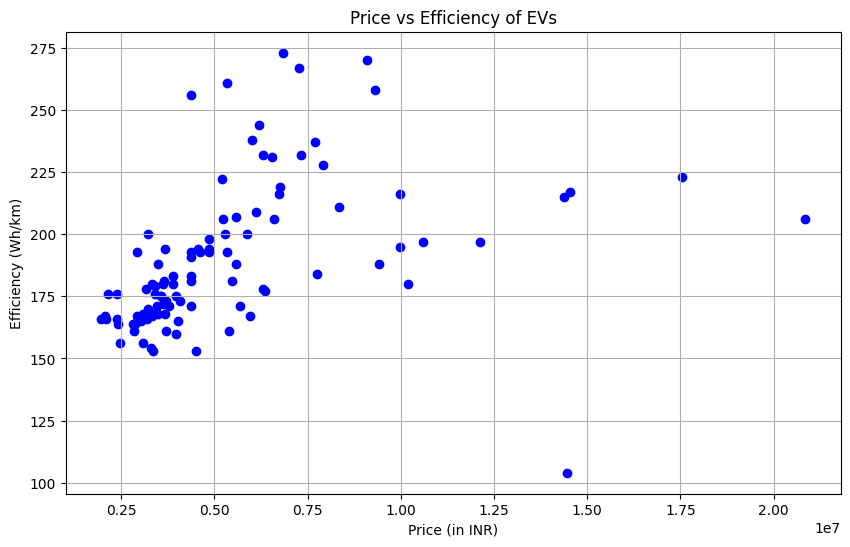

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['PriceINR'], df['Efficiency_WhKm'], color='blue', marker='o')
plt.title('Price vs Efficiency of EVs')
plt.xlabel('Price (in INR)')
plt.ylabel('Efficiency (Wh/km)')
plt.grid(True)
plt.show()


In [93]:
range_stats=df.groupby('PriceSection')['FastCharge_KmH'].agg(['min','max'])
print(range_stats)

              min  max
PriceSection          
Section 1       -  740
Section 2     290  940
Section 3     540  920


In [96]:
(df['RapidCharge']=='No').sum()

5

In [97]:
range_stats=df.groupby('PriceSection')['TopSpeed_KmH'].agg(['min','max'])
print(range_stats)

              min  max
PriceSection          
Section 1     123  225
Section 2     140  261
Section 3     150  410


In [98]:
df['BodyStyle'].nunique()

9

In [103]:
df['PriceSection'] = pd.cut(df['PriceINR'], 
                             bins=[0, 5000000, 10000000, float('inf')], 
                             labels=['Section 1 (<=50L)', 'Section 2 (50L-1cr)', 'Section 3 (>1cr)'])
body_styles_by_section = {
    'Section 1 (<=50L)': set(),
    'Section 2 (50L-1cr)': set(),
    'Section 3 (>1cr)': set()
}
for index, row in df.iterrows():
    section = row['PriceSection']
    body_style = row['BodyStyle']
    body_styles_by_section[section].add(body_style)
for section, body_styles in body_styles_by_section.items():
    print(f"Body styles in {section}:")
    print(', '.join(body_styles))
    print()


Body styles in Section 1 (<=50L):
Sedan, Liftback, SUV, MPV, Cabrio, Pickup, SPV, Hatchback

Body styles in Section 2 (50L-1cr):
Sedan, Liftback, SUV, Pickup, SPV, Hatchback

Body styles in Section 3 (>1cr):
Sedan, Liftback, Station, Cabrio



In [104]:
range_stats=df.groupby('PriceSection')['Seats'].agg(['min','max'])
print(range_stats)

                     min  max
PriceSection                 
Section 1 (<=50L)      2    7
Section 2 (50L-1cr)    4    7
Section 3 (>1cr)       4    5


C:\Users\Visha\AppData\Local\Temp\ipykernel_76232\3612878562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_stats=df.groupby('PriceSection')['Seats'].agg(['min','max'])


In [3]:
charge=pd.read_csv('ev_charge.csv')
charge

name          state  \
0                    Neelkanth Star DC Charging Station        Haryana   
1                          Galleria DC Charging Station        Haryana   
2     Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan   
3                     Food Carnival DC Charging Station  Uttar Pradesh   
4                     Food Carnival AC Charging Station  Uttar Pradesh   
...                                                 ...            ...   
1542                                        Tata Power          Kerala   
1543                                        Tata Power         Haryana   
1544                                        Tata Power         Haryana   
1545                                        Tata Power           Jammu   
1546                                        Tata Power       Karnataka   

           city                                            address  \
0      Gurugram  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   
1      Gurugram  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   
2        Behror  Jaipur to Delhi Road, Behror Midway, Behror, R...   
3      Khatauli  Fun and Food Carnival, NH 58, Khatauli Bypass,...   
4      Khatauli  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   
...         ...                                                ...   
1542     Munnar  Gokulam Park Munnar, Power House Road, South C...   
1543    Gurgaon  Vatika Town Square II, Sector 82, Sector 82, V...   
1544    Gurgaon  Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...   
1545      Jammu  Le ROI, Jammu, Railway Station, Jammu, Jammu &...   
1546  Mangalore  Auto Matrix, Bejai, Manjusha Building, Bejai, ...   

       lattitude  longitude  type  
0        29.6019  76.980300  12.0  
1        28.4673  77.081800  12.0  
2        27.8751  76.276000  12.0  
3        29.3105  77.721800  12.0  
4        29.3105  77.721800  12.0  
...          ...        ...   ...  
1542  10.0297934  77.045859   7.0  
1543  28.3904593  76.959200   7.0  
1544   28.411072  77.040546   7.0  
1545  32.7064117  74.879203   7.0  
1546   12.885716  74.843476   7.0  

[1547 rows x 7 columns]

In [4]:
charge['name'].nunique()

1144

In [5]:
unique_charge_point_names = charge['name'].drop_duplicates().tolist()
for names in unique_charge_point_names:
    print(names)


Neelkanth Star DC Charging Station
Galleria DC Charging Station
Highway Xpress (Jaipur-Delhi) DC charging station
Food Carnival DC Charging Station
Food Carnival AC Charging Station
Krishna Hansraj Hotel Una DC charging station 
SG Jabli DC Charging Station
SG Jabli  AC Charging Station
SG Karnal DC Charging Station
SG Karnal AC Charging Station
Neelkanth Star AC charging  station
Deep Brothers IOCL AC Charging Station
Synergy Solutions AC Charging Station 2
IOCL Rajokri Station
VEEV A2B Kallar
VEEV Sathya Nursery
IOCL Nehru Nagar Station
IOCL Mathura Road
IOCL Chahar AC Charging Station
Kothari Enterprises  AC1
Windlass River Valley AC Charging Station
Mindra Polar International AC Station
Lonavla Wax Museum DC Charging Station
Heritage City AC Charging Station
Hotel Fairmont Jaipur AC Station
The Westin Pushkar AC Charger
WeWork Circle Demo
Karma Lakelands AC Charger
Statiq RnD Centre AC Charging Station
JMD Gardens
Mindra Crispy Culture AC Charging Station
IOCL Dhaula Kuan Charging 

In [6]:
charge['state'] = charge['state'].str.strip().str.lower()
charge_unique = charge.drop_duplicates(subset=['state', 'name'])
state_charge_counts = charge_unique['state'].value_counts()
print(state_charge_counts)



state
maharashtra          205
tamil nadu           116
delhi                114
karnataka            108
uttar pradesh         69
kerala                67
telangana             65
rajasthan             54
gujarat               52
haryana               51
delhi ncr             47
west bengal           40
andhra pradesh        37
odisha                26
punjab                21
madhya pradesh        15
jharkhand             15
uttarakhand           15
chhattisgarh          11
tamilnadu              7
goa                    7
bihar                  7
himachal pradesh       6
chattisgarh            6
assam                  6
telengana              5
maharashra             5
jammu                  3
jammu & kashmir        3
westbengal             3
puducherry             2
chandigarh             2
andra pradesh          2
uttrakhand             2
taminadu               1
jajpur                 1
tripura                1
karala                 1
uttarkhand             1
pondicherry        

In [7]:
station_name = 'Tata Power'
filtered_charge = charge[charge['name'].str.contains(station_name, case=False, na=False)]
states_with_station = filtered_charge['state'].unique()
print(states_with_station)


['maharashtra' 'west bengal' 'uttarakhand' 'uttar pradesh' 'tripura'
 'telangana' 'tamil nadu' 'rajasthan' 'punjab' 'odisha' 'andaman' 'assam'
 'bihar' 'chhattisgarh' 'delhi' 'gujarat' 'haryana' 'madhya pradesh'
 'kerala' 'jammu' 'karnataka']


In [8]:
for i in unique_charge_point_names:
    station_name=i
    print("charge points of ",i)
    filtered_charge = charge[charge['name'].str.contains(station_name, case=False, na=False)]
    states_with_station = filtered_charge['state'].unique()
    print(states_with_station)

charge points of  Neelkanth Star DC Charging Station
['haryana']
charge points of  Galleria DC Charging Station
['haryana']
charge points of  Highway Xpress (Jaipur-Delhi) DC charging station
[]
charge points of  Food Carnival DC Charging Station
['uttar pradesh']
charge points of  Food Carnival AC Charging Station
['uttar pradesh']
charge points of  Krishna Hansraj Hotel Una DC charging station 
['himachal pradesh']
charge points of  SG Jabli DC Charging Station
['himachal pradesh']
charge points of  SG Jabli  AC Charging Station
['himachal pradesh']
charge points of  SG Karnal DC Charging Station
['haryana']
charge points of  SG Karnal AC Charging Station
['haryana']
charge points of  Neelkanth Star AC charging  station
['haryana']
charge points of  Deep Brothers IOCL AC Charging Station
['haryana']
charge points of  Synergy Solutions AC Charging Station 2
['maharashtra']
charge points of  IOCL Rajokri Station
['delhi']
charge points of  VEEV A2B Kallar
['tamil nadu']
charge points o

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\2229926498.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_charge = charge[charge['name'].str.contains(station_name, case=False, na=False)]


['telangana']
charge points of  Ampa Skywalk
['telangana']
charge points of  AtWorks - Guindy
['uttarakhand']
charge points of  Cafe Azzure
['uttrakhand']
charge points of  Almond House Kukatpally
['westbengal']
charge points of  Sarath City Capital Mall
['harayana' 'telangana']
charge points of  Atherspace Chennai
['chandigarh']
charge points of  Athergrid CP
['haryana']
charge points of  The Bangalore Bakery
['maharashtra']
charge points of  Almond House SD Road
['delhi']
charge points of  Chai Kahani - Sainikpuri
['hyderabadu00a0']
charge points of  Swiss Castle, Vidyanagar
['punjab']
charge points of  Bliss Bakery & Cafe
['delhi']
charge points of  Flip Side
['delhi']
charge points of  Taj Mahal Hotel
['tamilnadu']
charge points of  Sai Menaka Commercial Complex
['tamilnadu']
charge points of  IDC Kitchen
['gujarat']
charge points of  Kalinga Veg Gourmet Kitchen
['kerala']
charge points of  CopaCabana
['maharashtra']
charge points of  TamTree
['andhrapradesh']
charge points of  KB'

In [9]:
station_state_counts = charge.groupby(['name', 'state']).size().reset_index(name='count')
print(station_state_counts)


                                                   name          state  count
0                             Hotel Noida International    maharashtra      1
1     140% Veg Gulshan Dhaba Kotwan DC Charging Station  uttar pradesh      1
2                  1944 The Hocco Kitchen, Vaishnodevi   uttar pradesh      1
3                       7 Food Court, NH 65 -Rayangudem      telangana      1
4                              A S M ABDUL CADER AND CO     tamil nadu      2
...                                                 ...            ...    ...
1209        Zenith Chemical Works Pvt Ltd, Andheri East    maharashtra      1
1210                                  Zostel, Dandeghar    maharashtra      2
1211                                     Zozoz Pizzeria         kerala      1
1212                     u00a0EESL Sushma Swaraj Bhawan          delhi      1
1213                u00c2u00a0EESL Sushma Swaraj Bhawan      delhi ncr      1

[1214 rows x 3 columns]


In [17]:
import pandas as pd
station_state_count = charge.groupby('name')['state'].nunique().reset_index(name='unique_states_count')
top_50_stations = station_state_count.sort_values(by='unique_states_count', ascending=False).head(200)
top_50_stations


name  unique_states_count
1017                          Tata Power                    21
219                           Charge Zone                    5
301                       EESL Delhi Haat                    2
728                 MG DELHI LAJPAT NAGAR                    2
835    Pacific Mall, Netaji Subash Palace                    2
...                                   ...                  ...
654                        K Star Chembur                    1
655                      KARTHIK AGENCIES                    1
656                        KB's Woodlands                    1
657                       KHT, Whitefield                    1
625   IOCL Sahara Hospitality, Vile Parle                    1

[200 rows x 2 columns]

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\781457239.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', hue='name', data=filtered_data, ci=None)


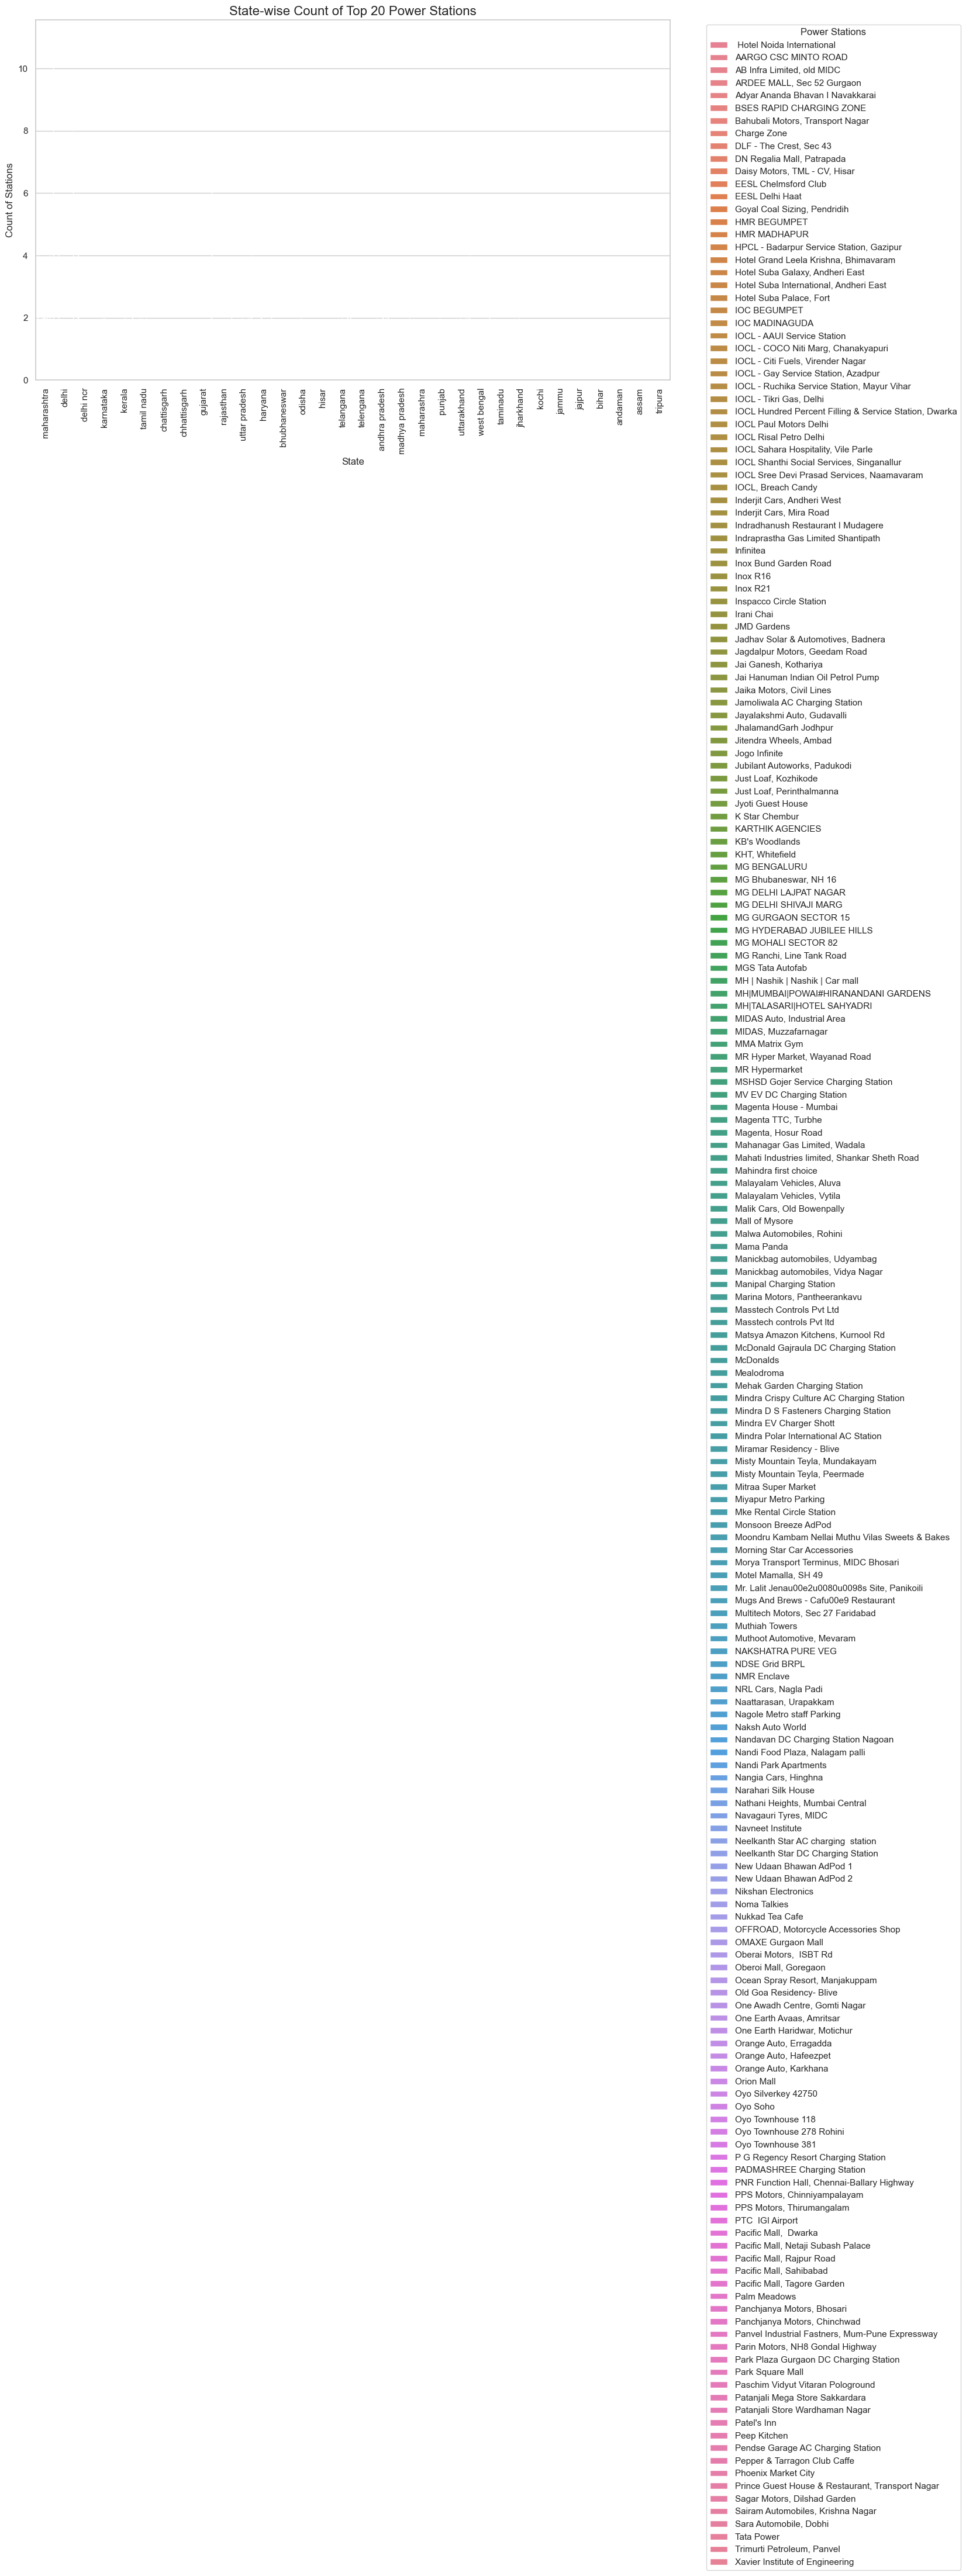

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
station_state_counts = charge.groupby(['name', 'state']).size().reset_index(name='count')
top_20_stations = charge.groupby('name')['state'].nunique().reset_index(name='unique_states_count')
top_20_stations = top_20_stations.sort_values(by='unique_states_count', ascending=False).head(200)['name']
filtered_data = station_state_counts[station_state_counts['name'].isin(top_20_stations)]
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")
sns.barplot(x='state', y='count', hue='name', data=filtered_data, ci=None)
plt.xticks(rotation=90) 
plt.title('State-wise Count of Top 20 Power Stations', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count of Stations', fontsize=12)
plt.legend(title='Power Stations', bbox_to_anchor=(1.05, 1), loc='upper left')




C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


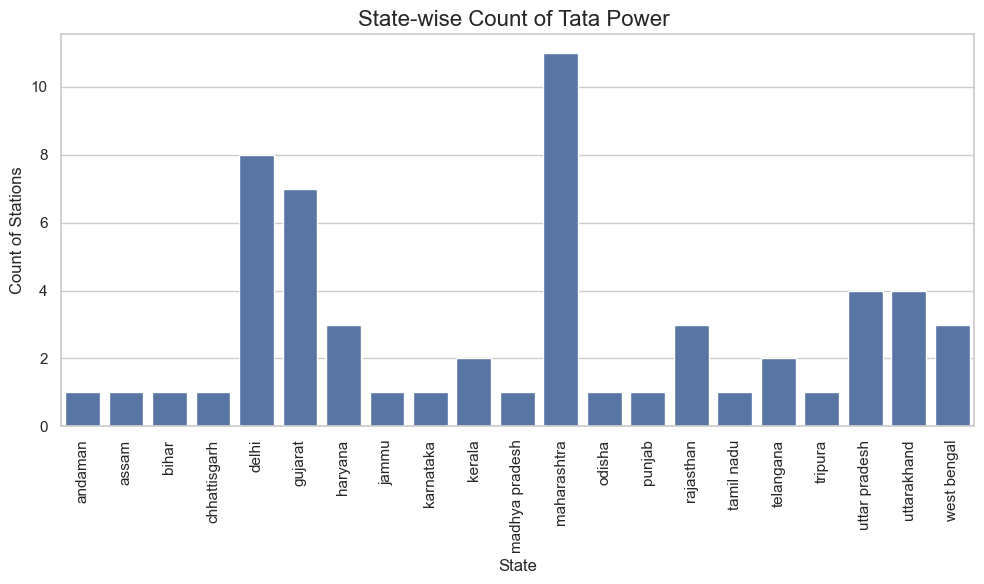

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


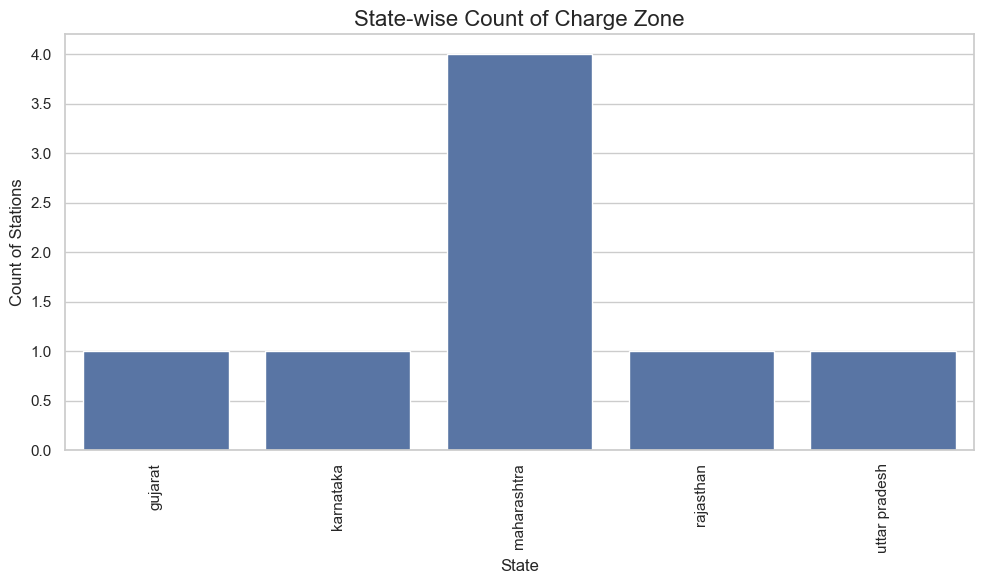

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


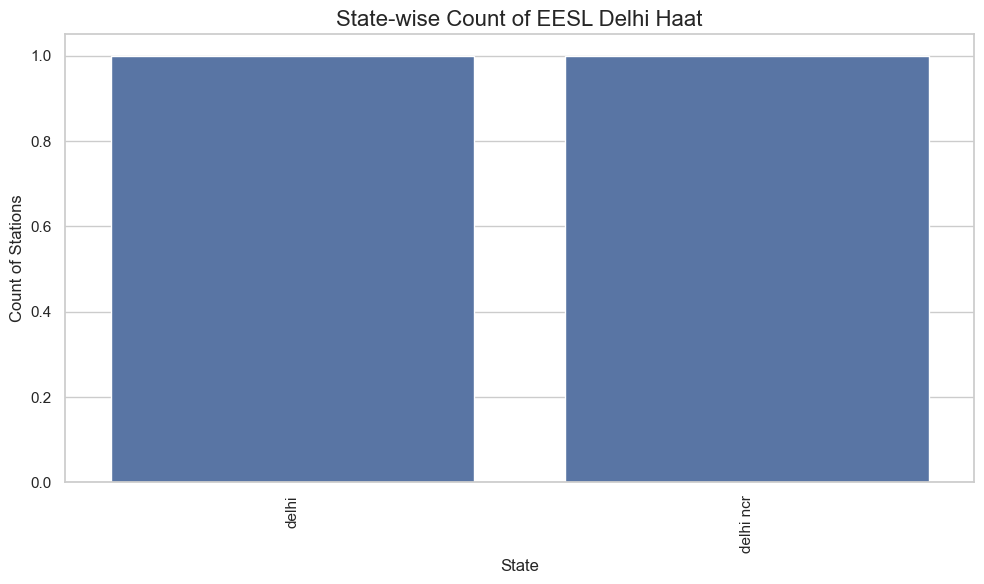

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


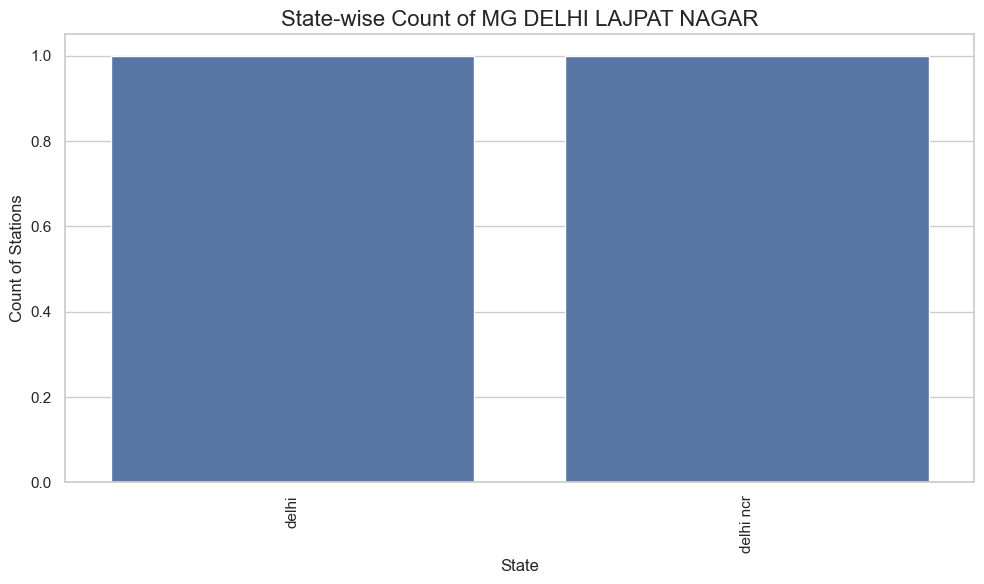

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


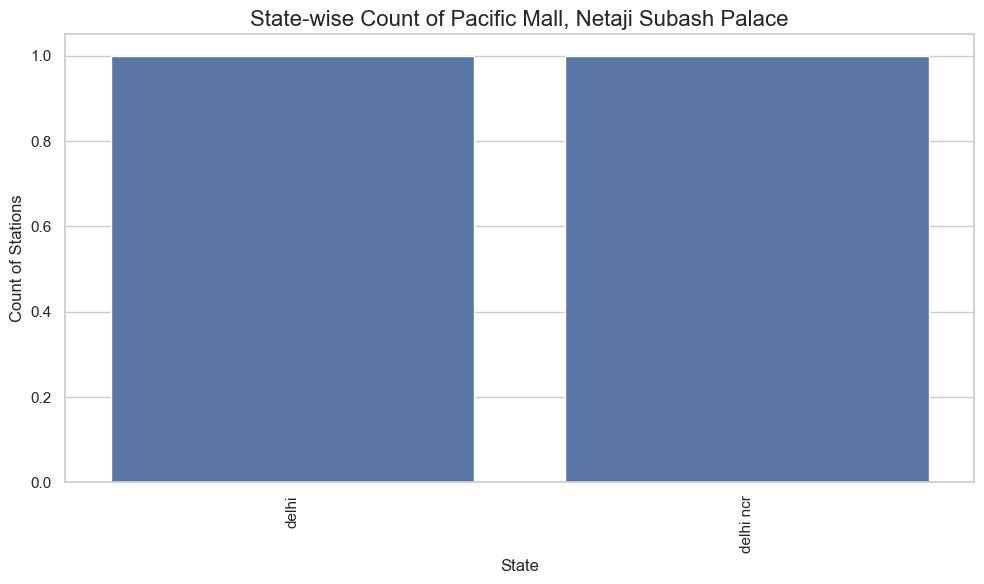

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


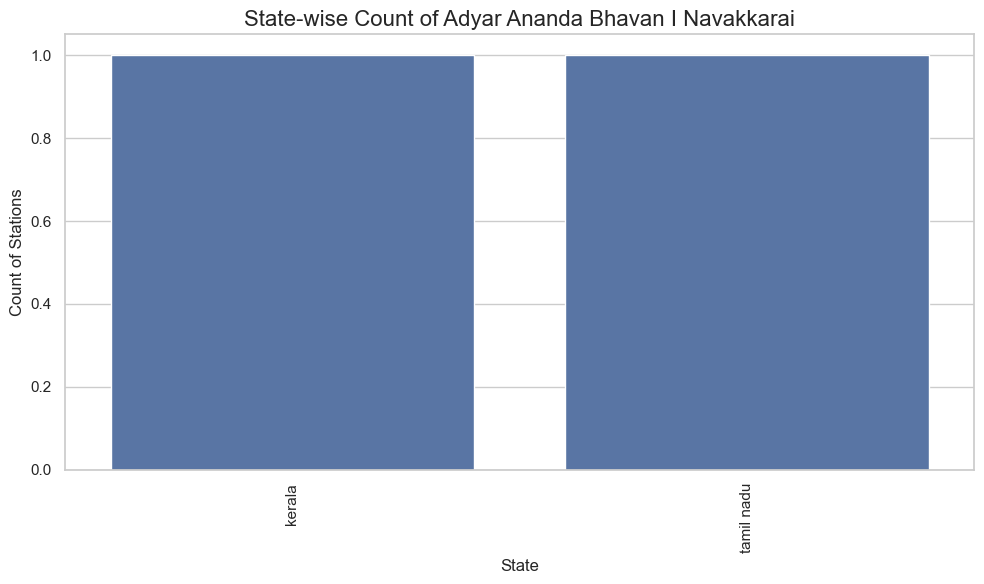

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


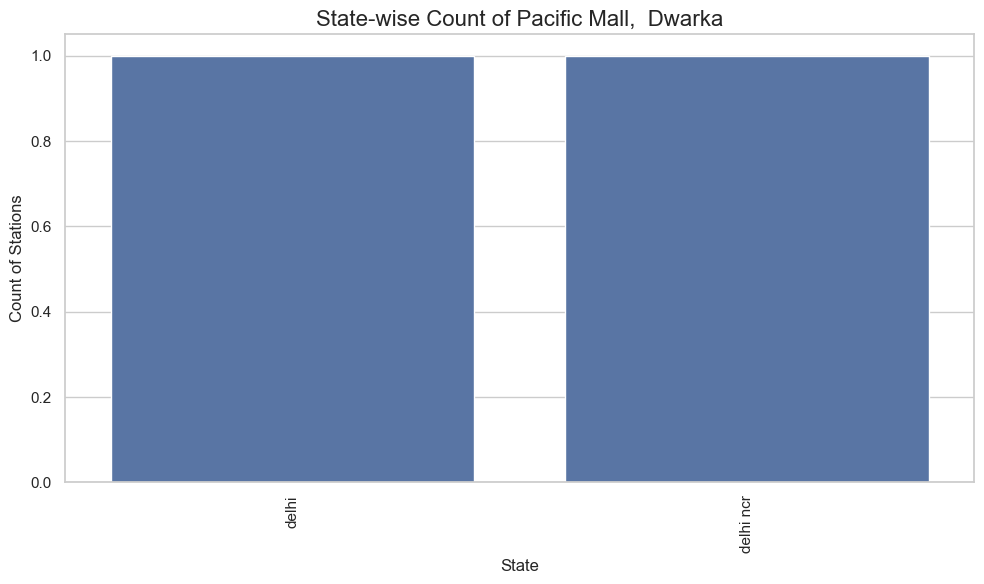

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


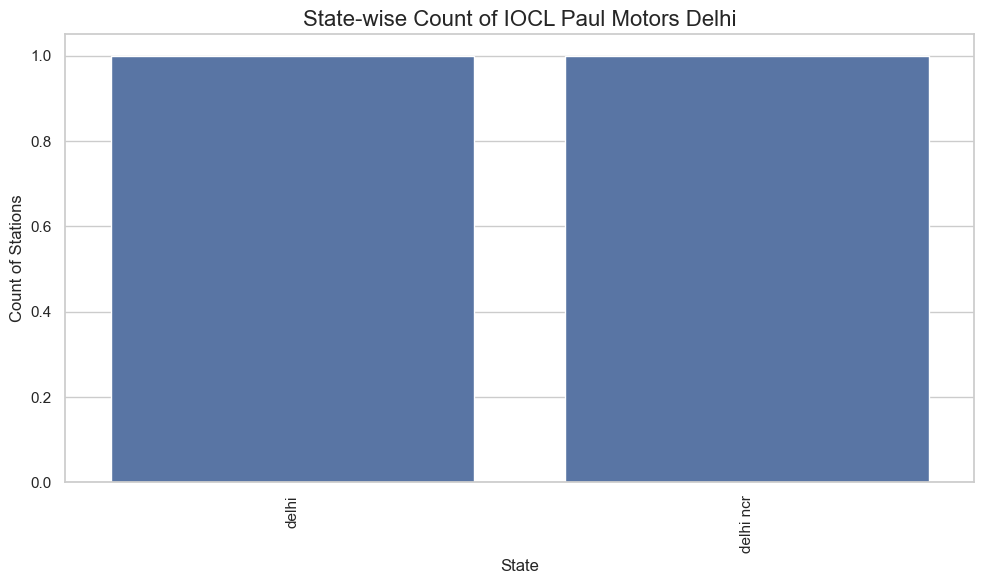

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


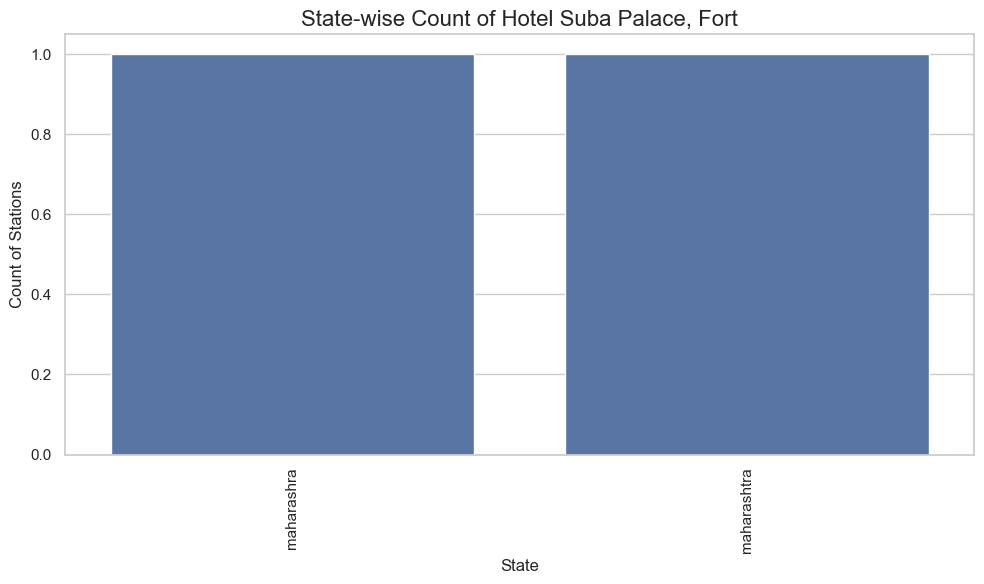

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


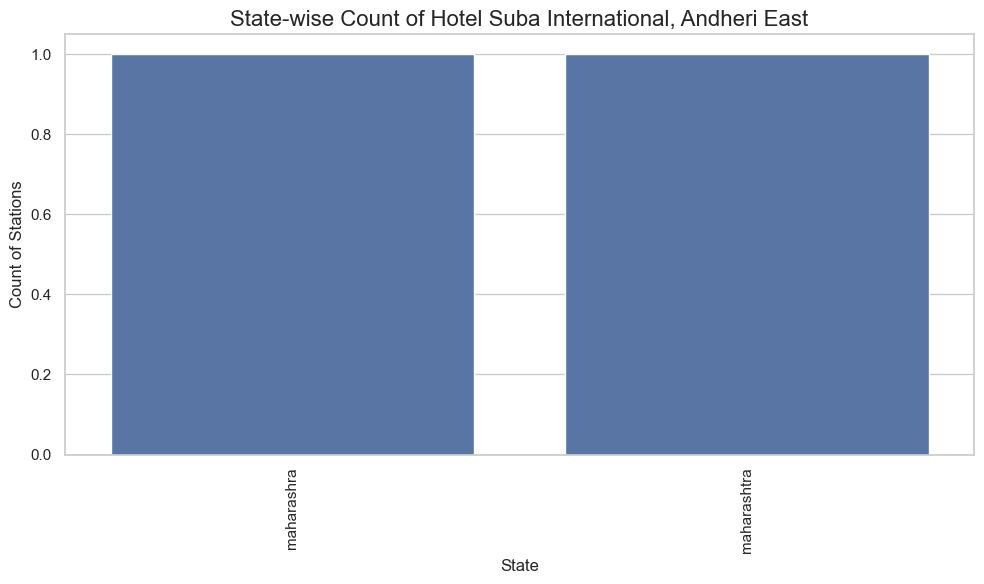

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


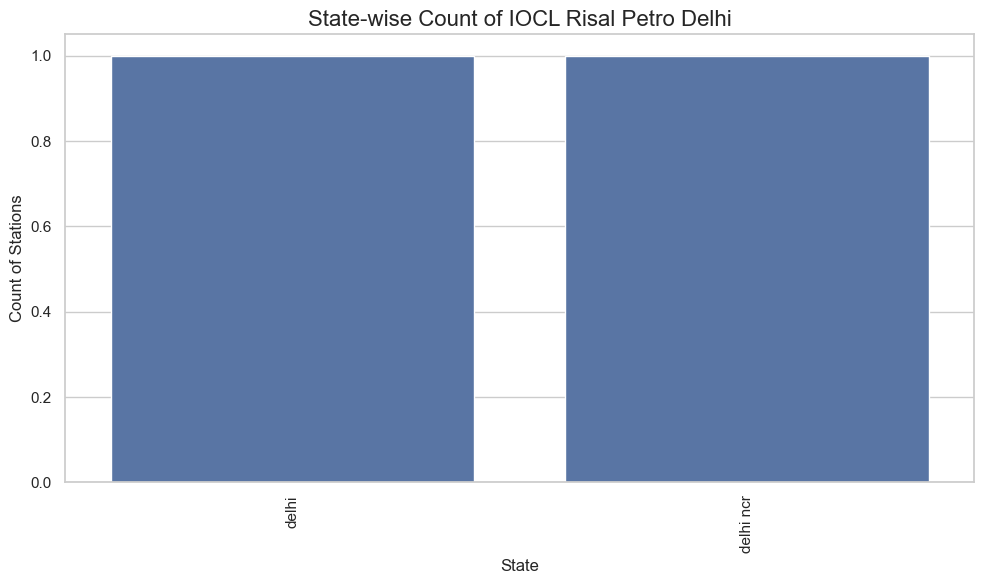

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


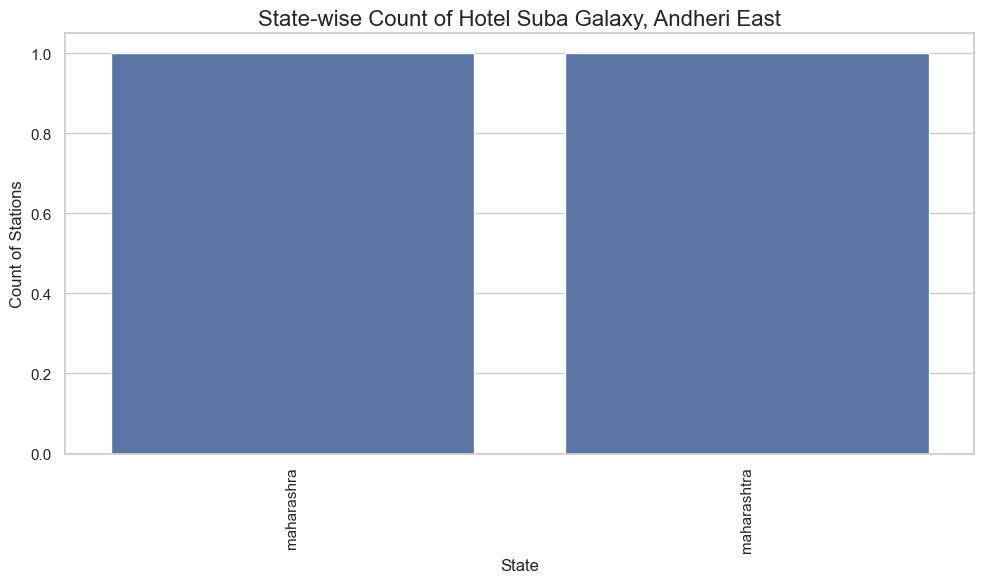

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


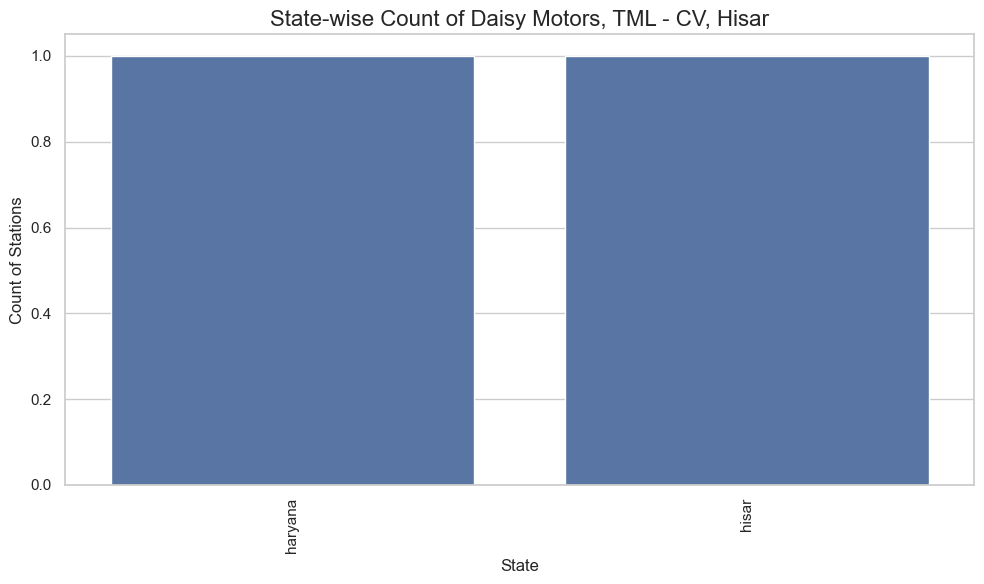

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


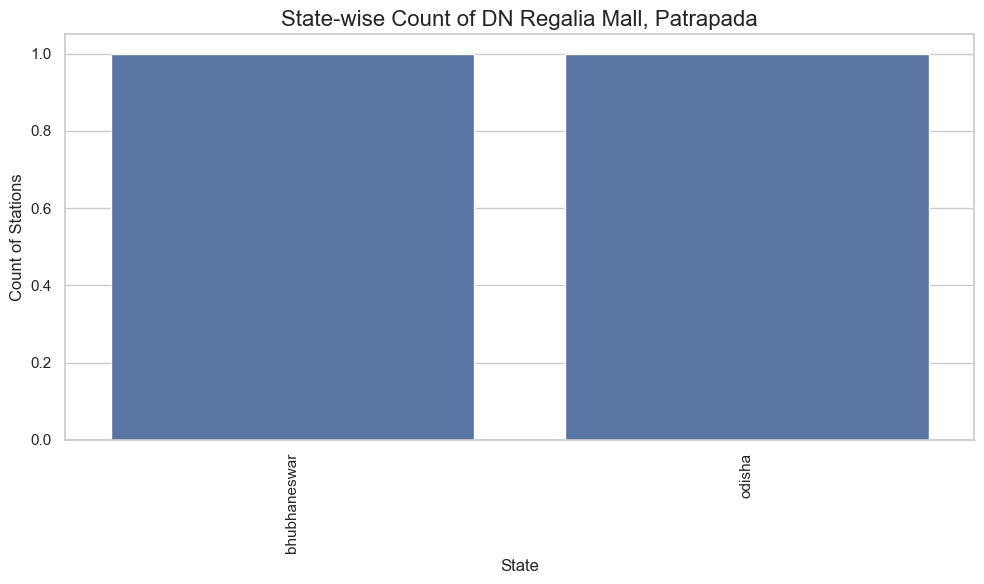

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


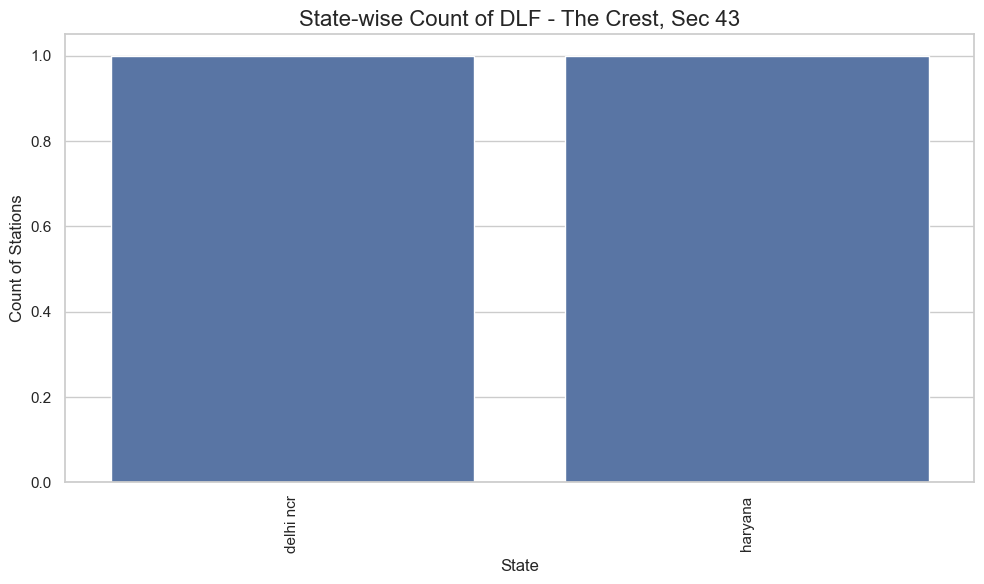

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


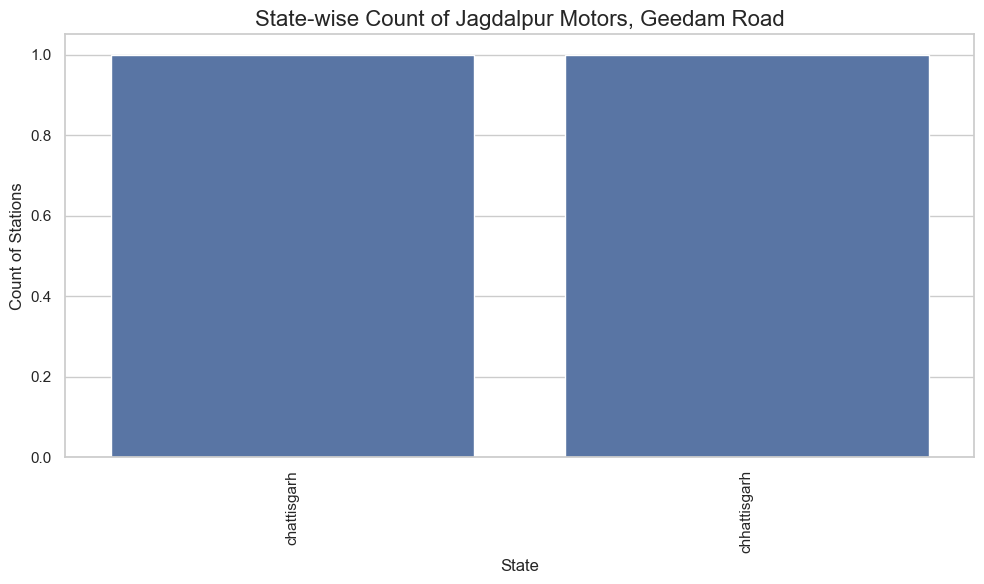

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


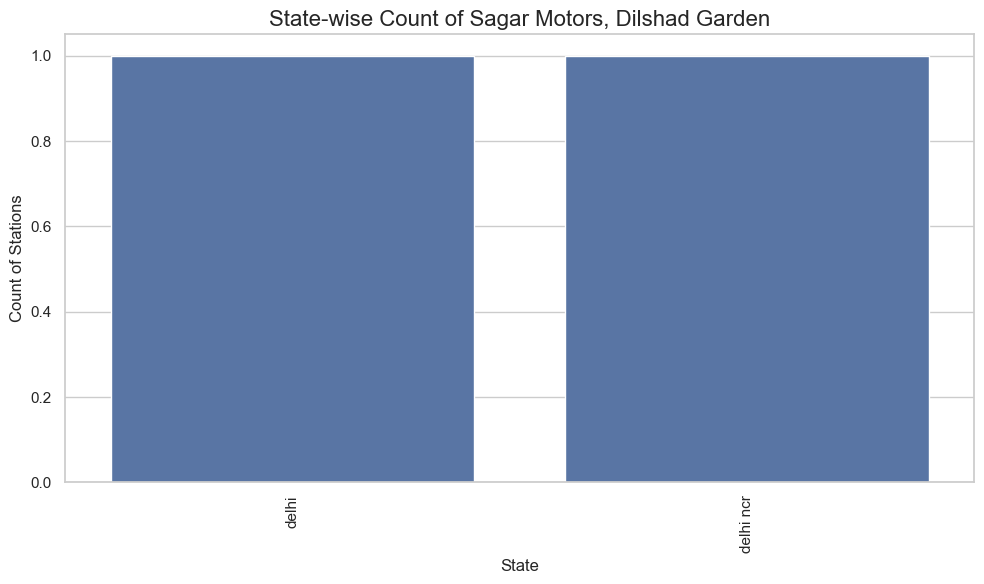

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


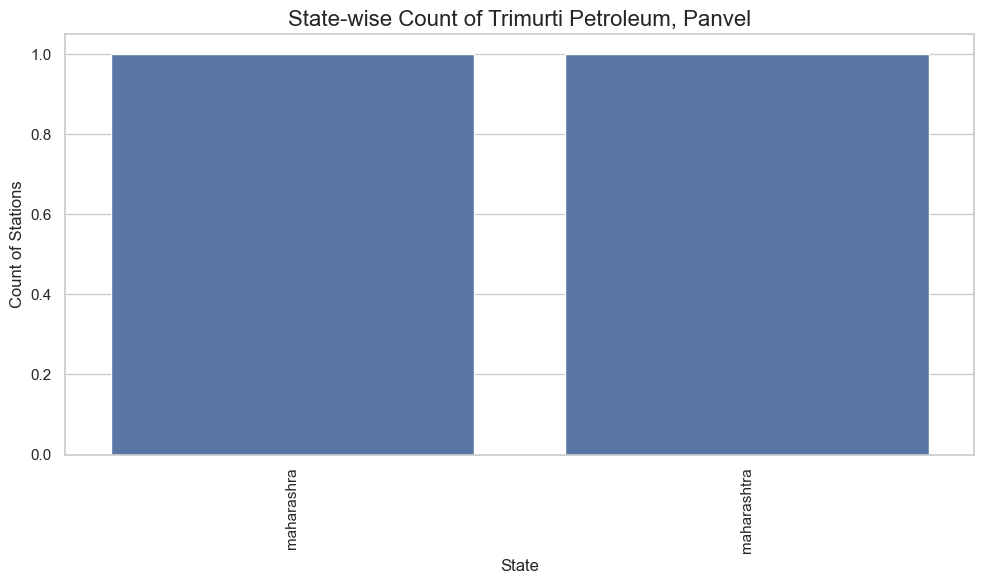

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


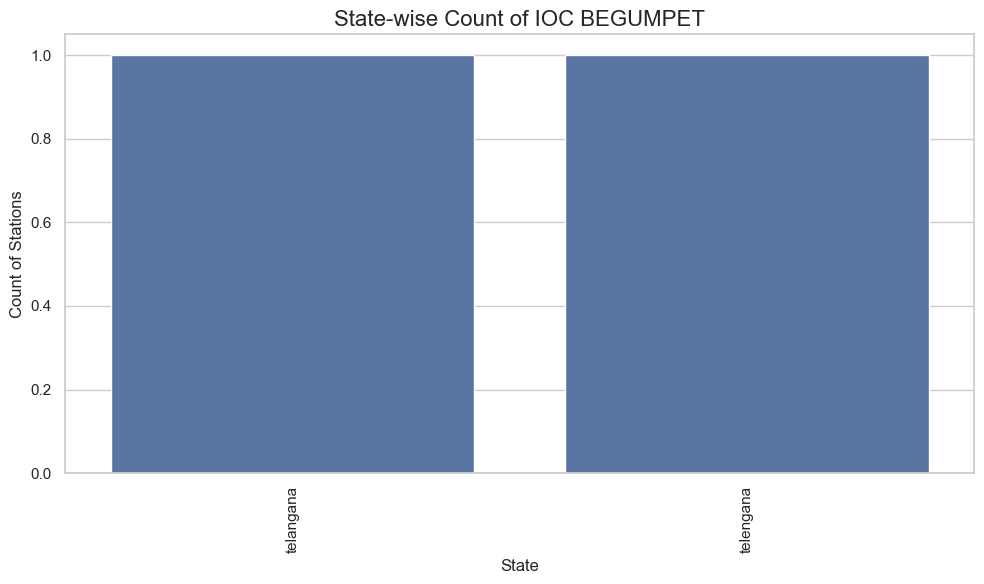

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


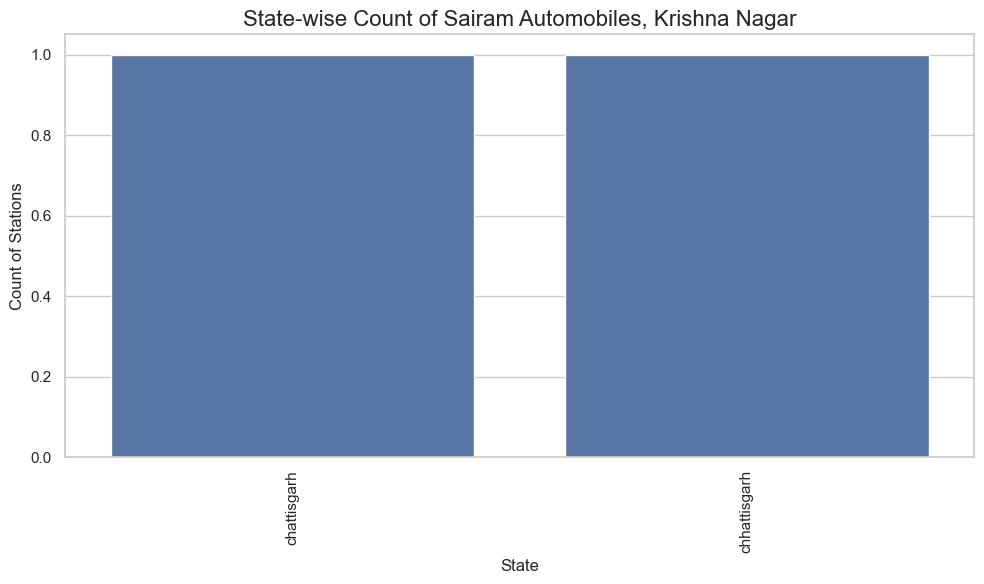

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


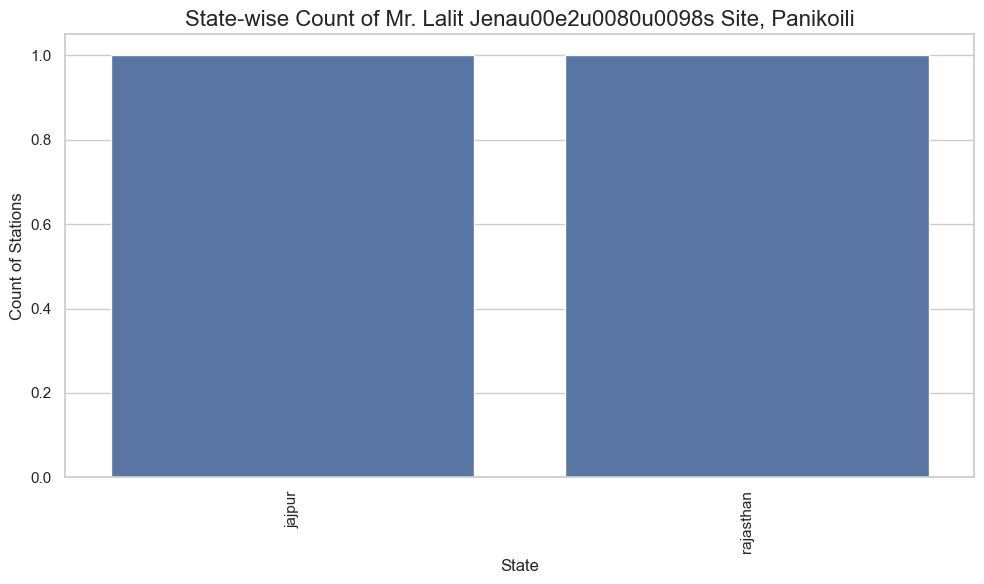

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


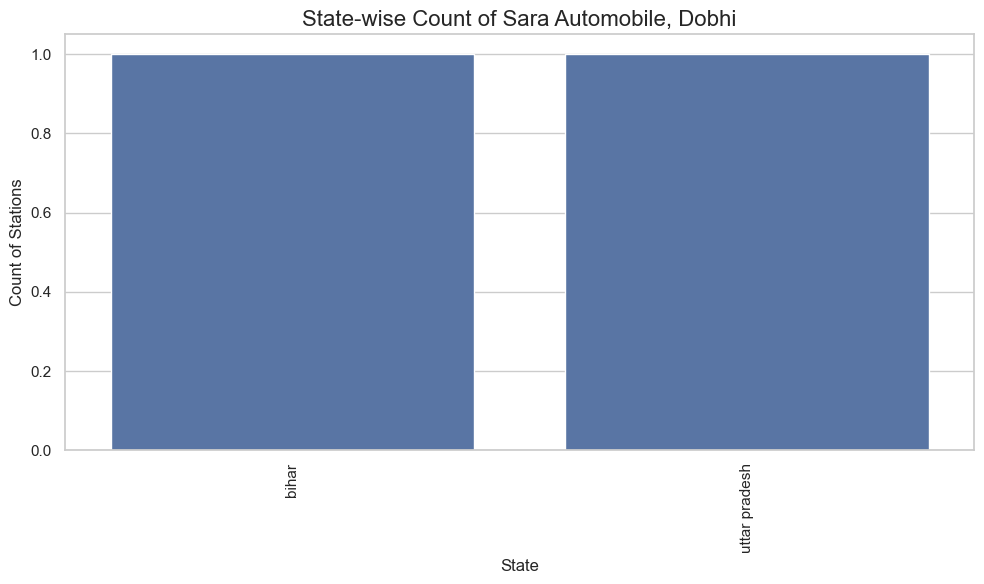

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


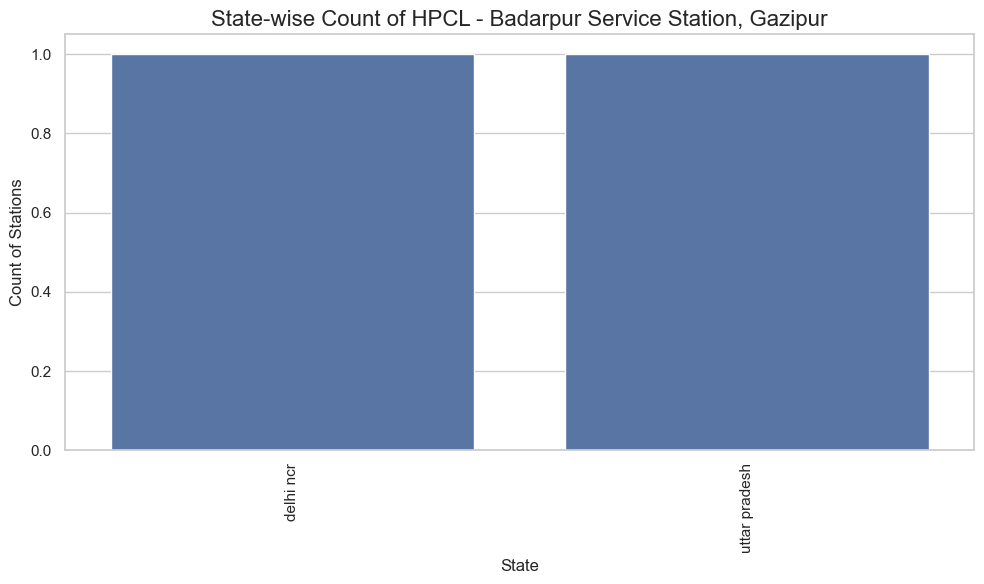

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


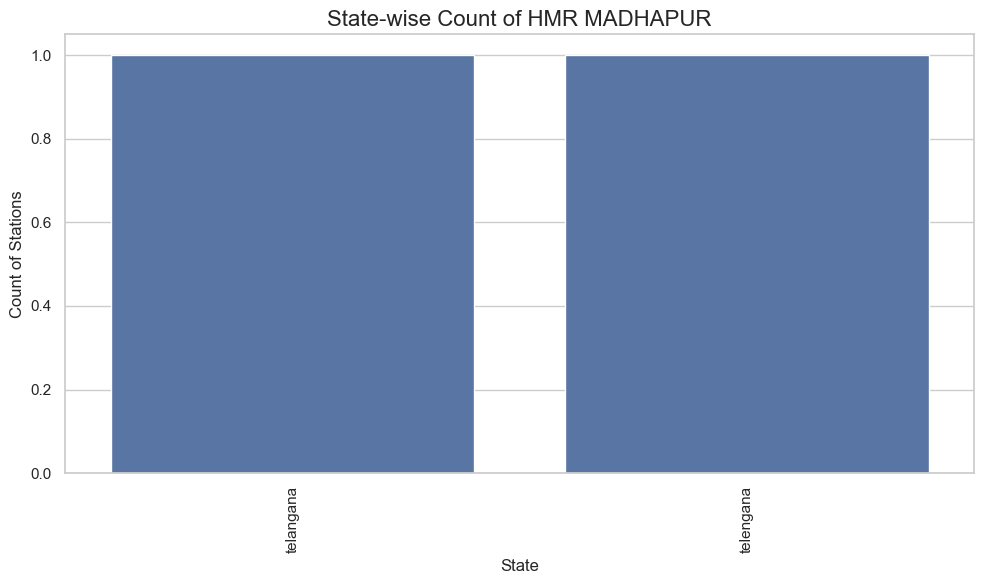

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


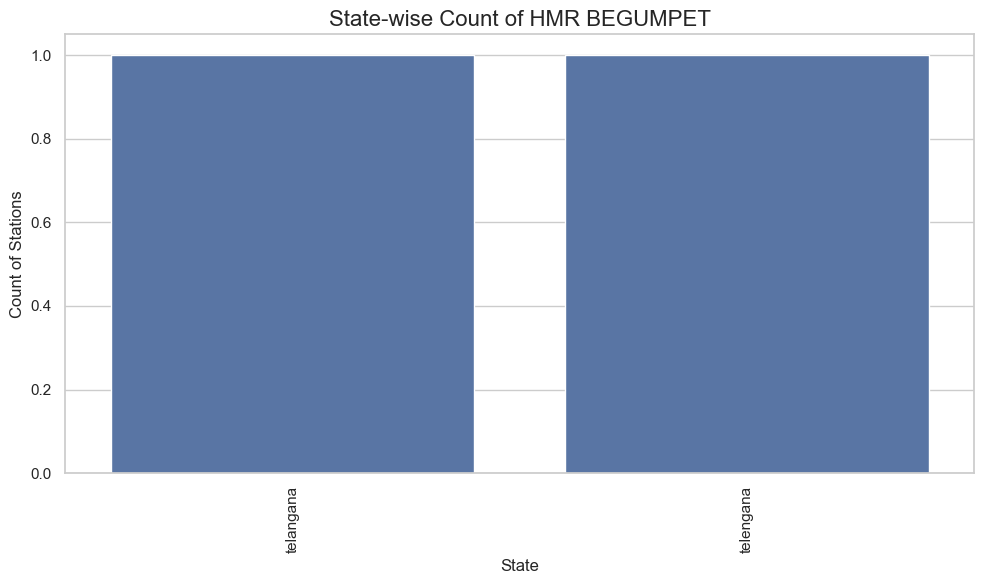

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


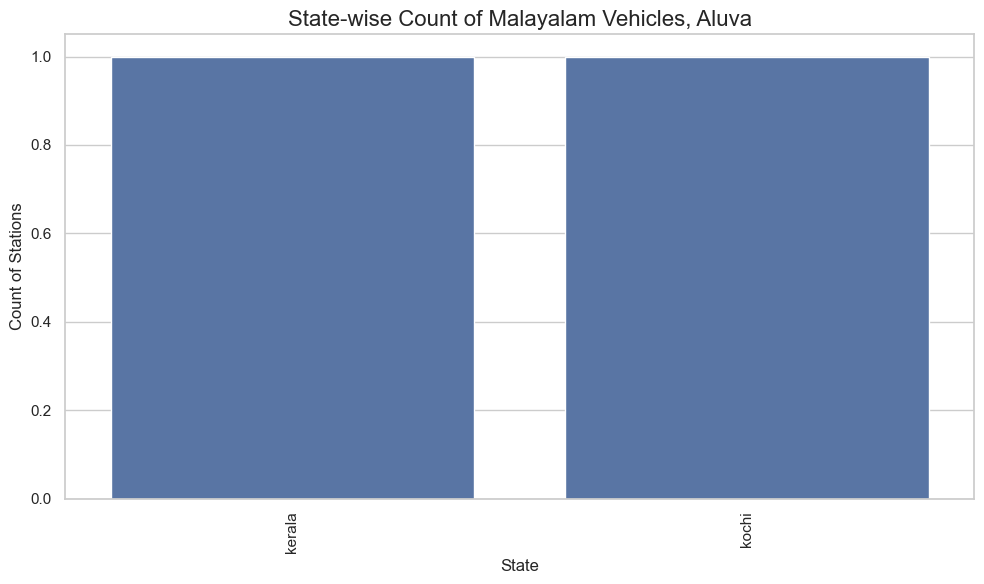

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


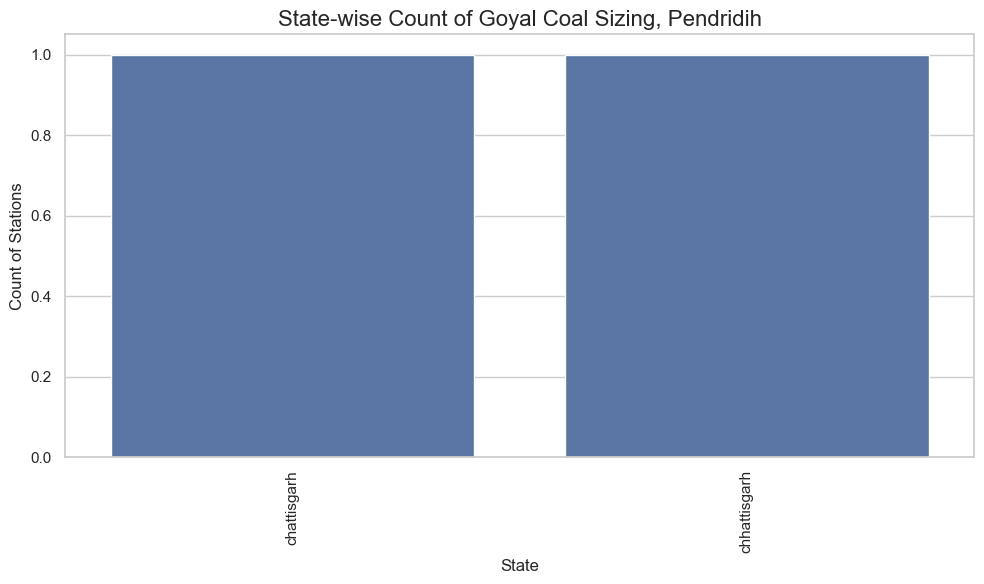

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


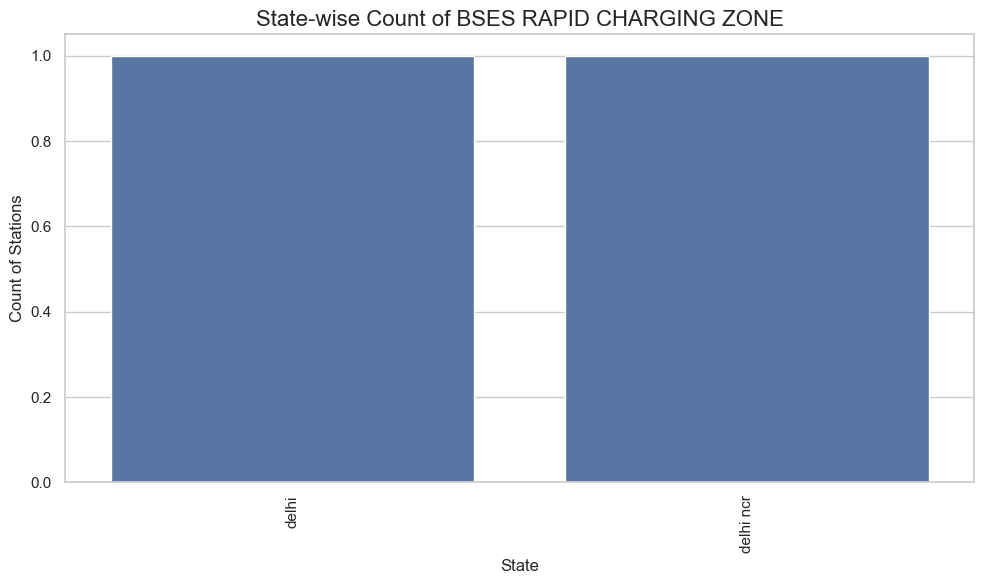

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


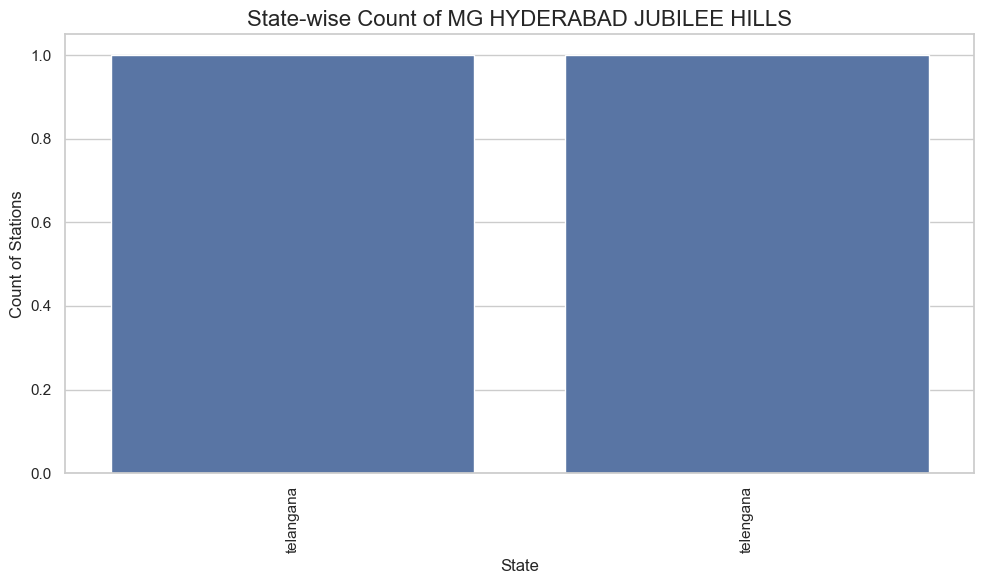

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


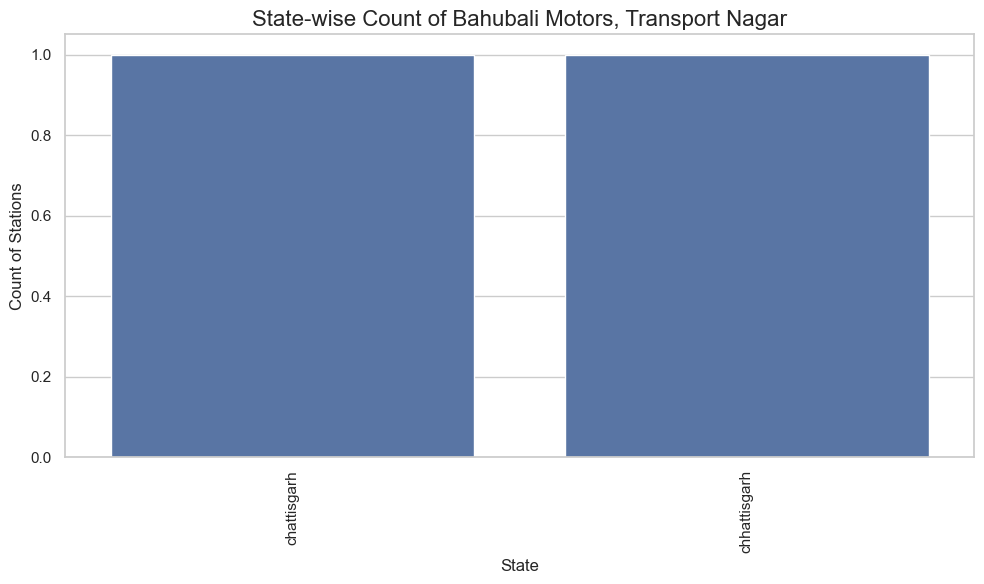

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


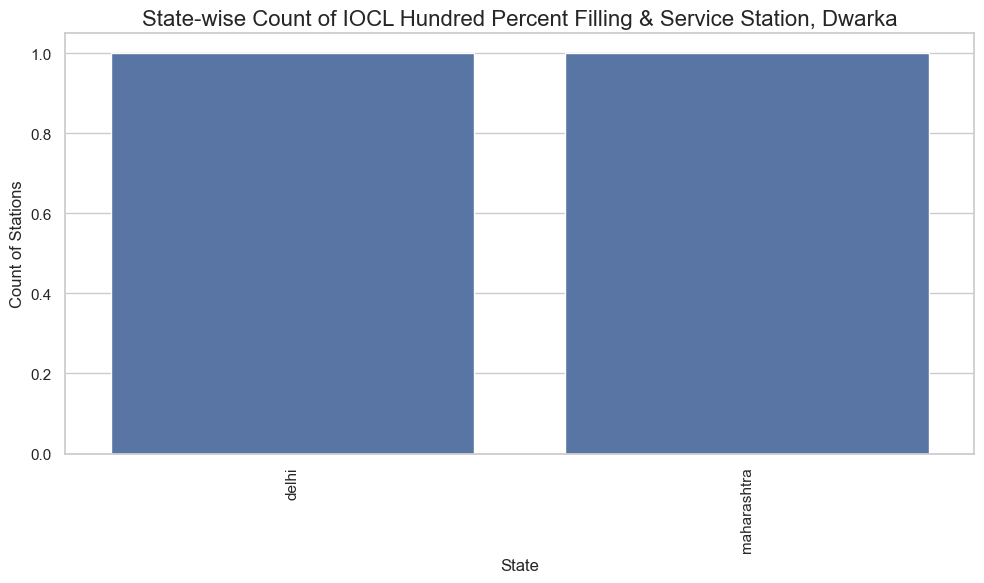

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


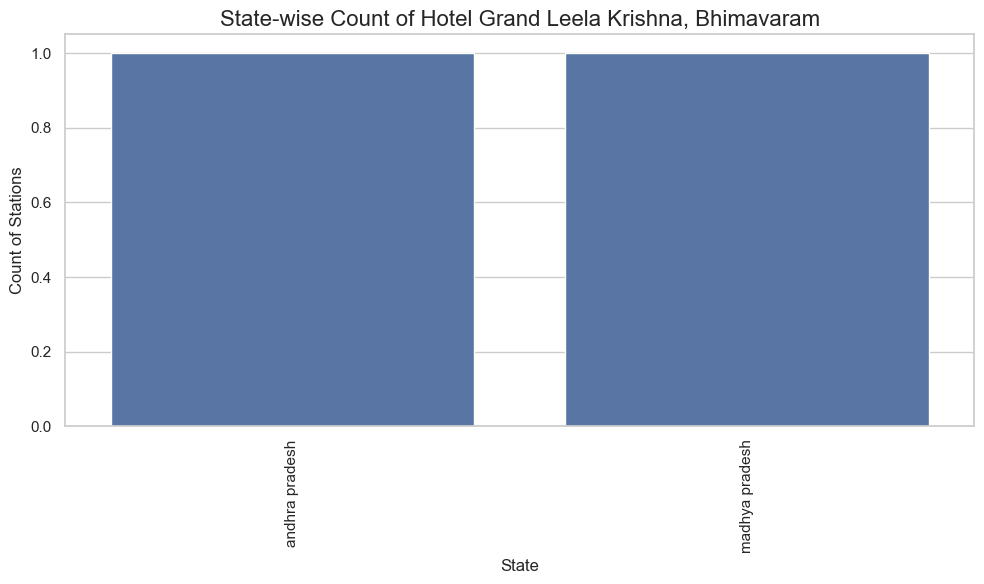

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


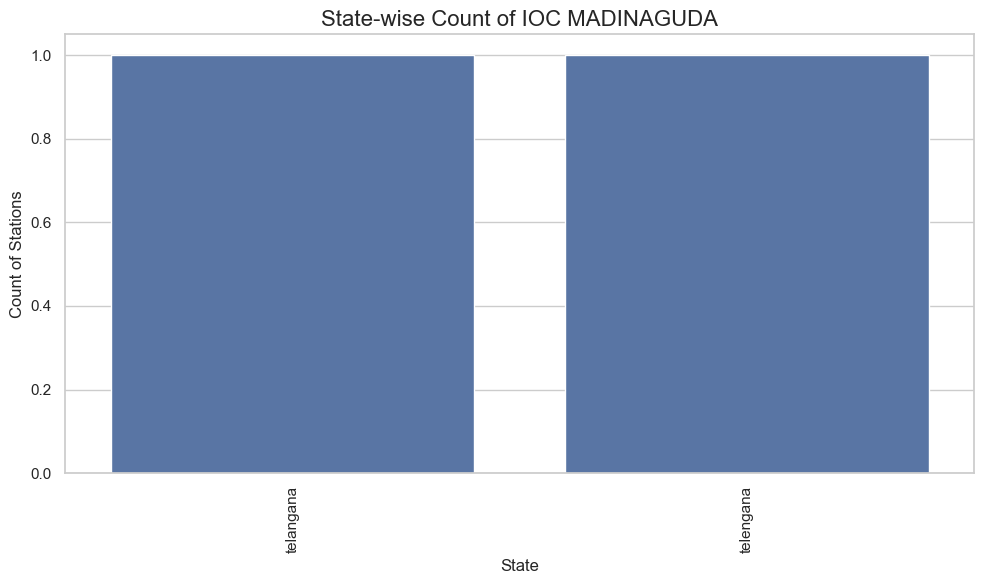

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


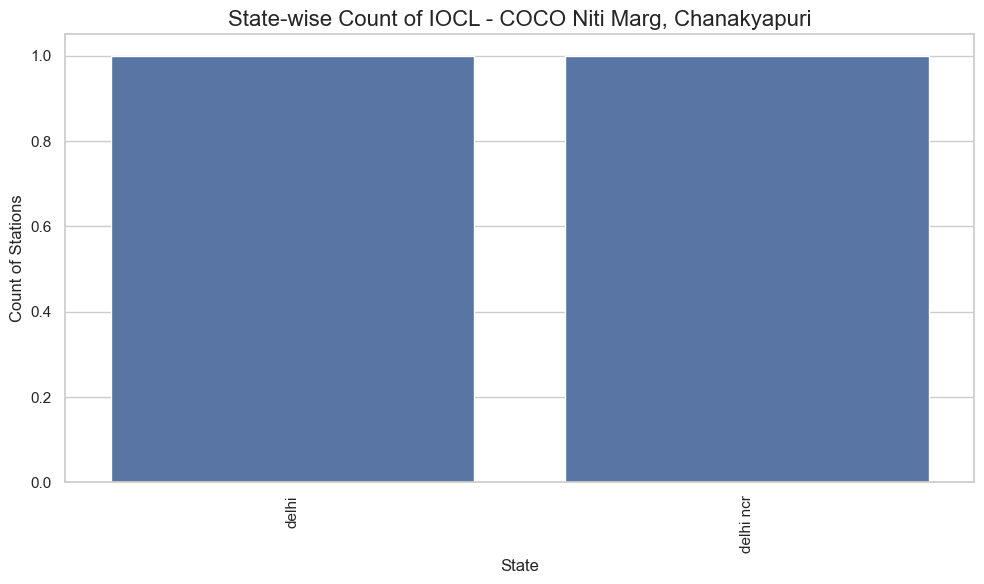

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


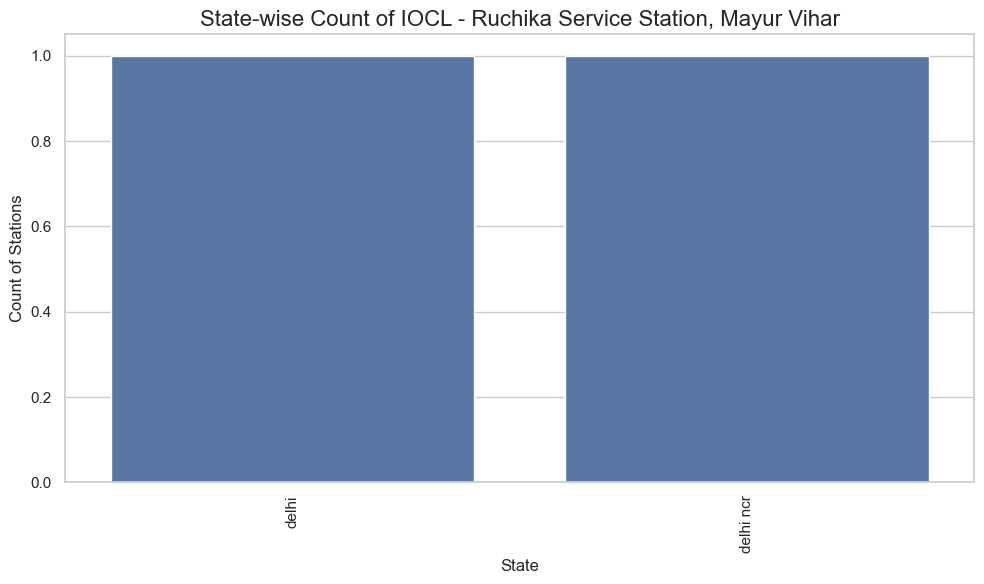

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


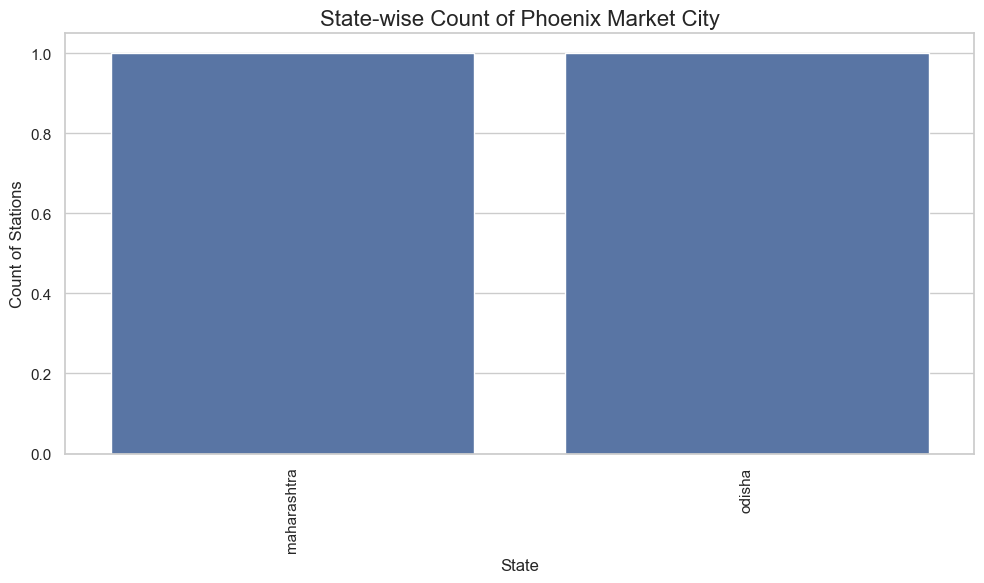

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


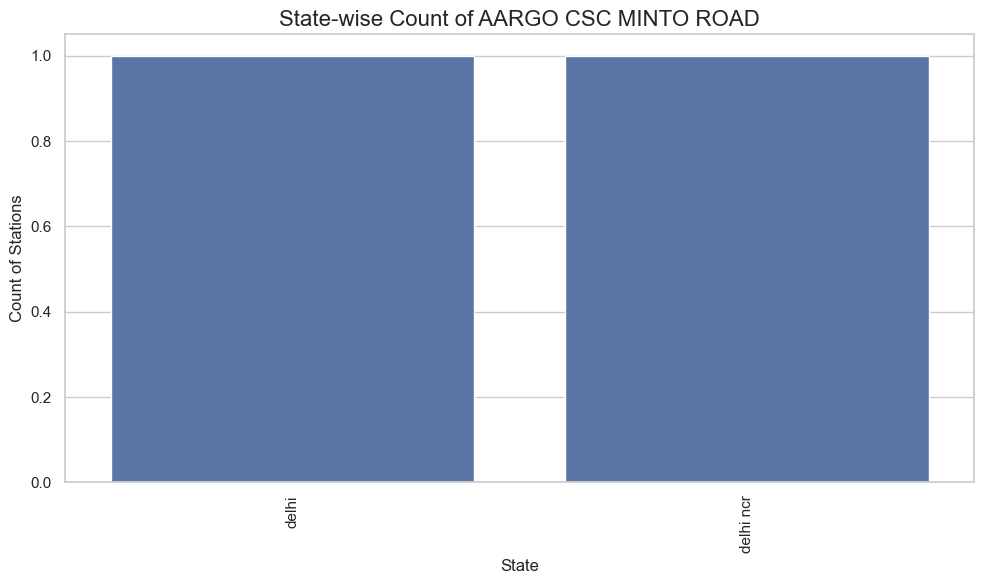

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


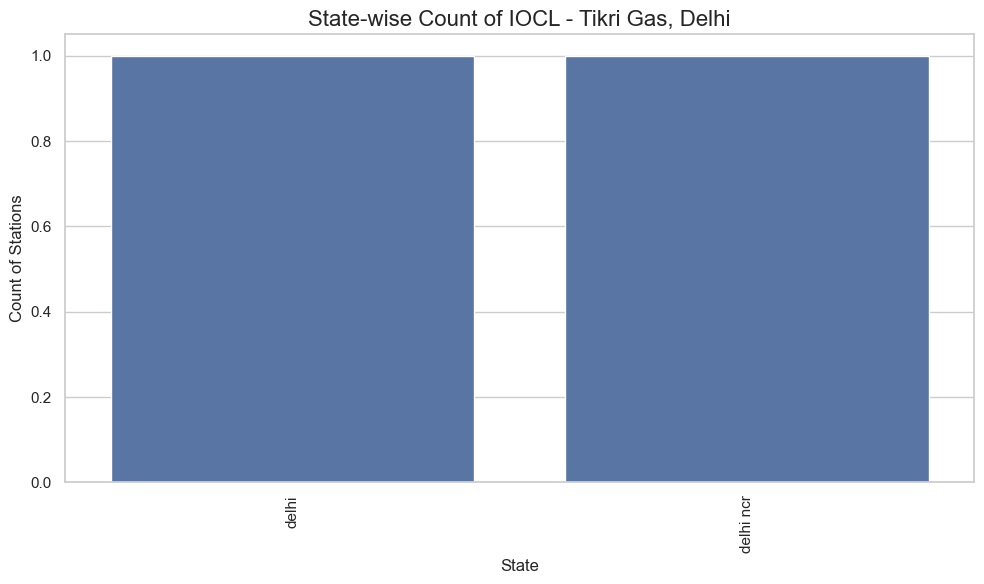

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


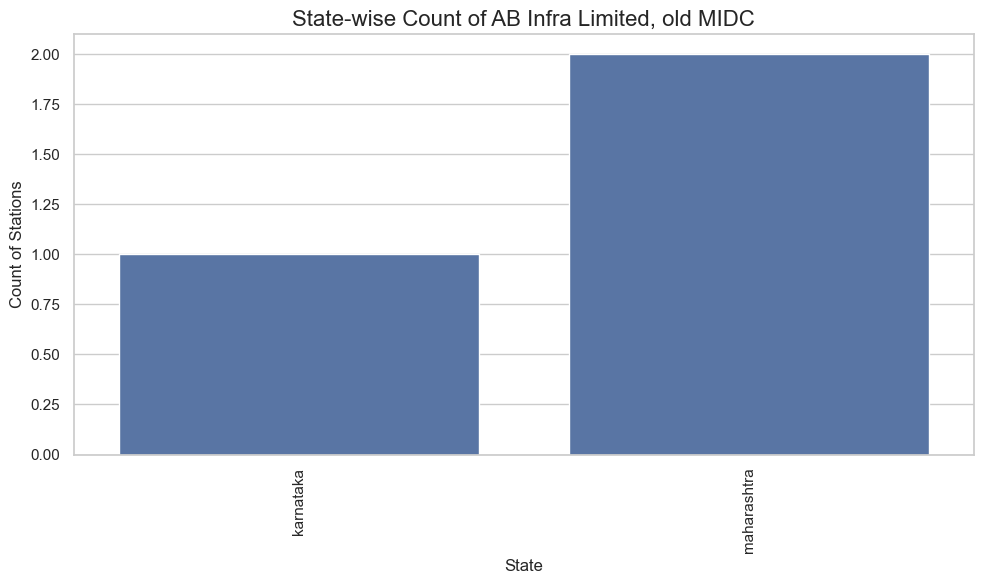

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


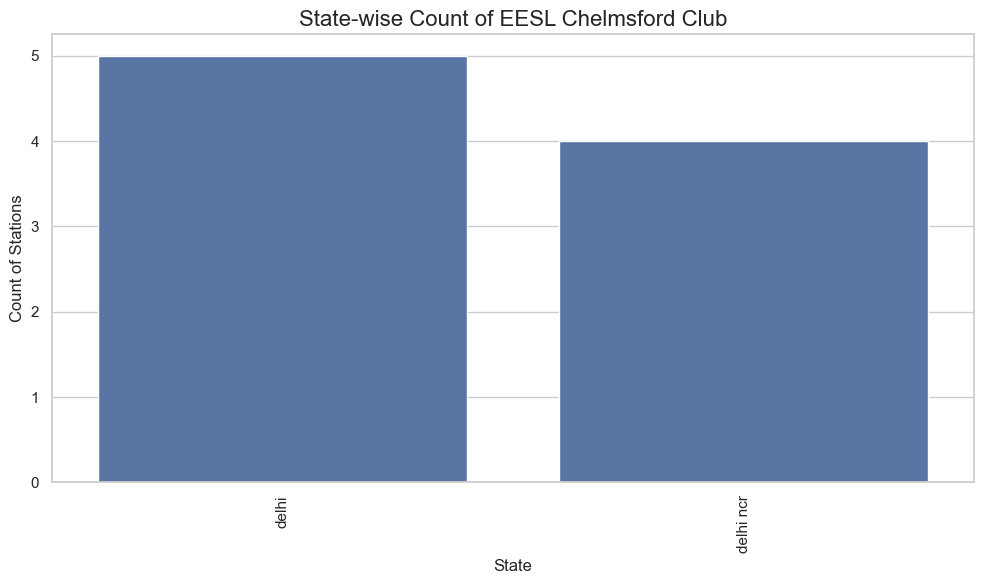

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


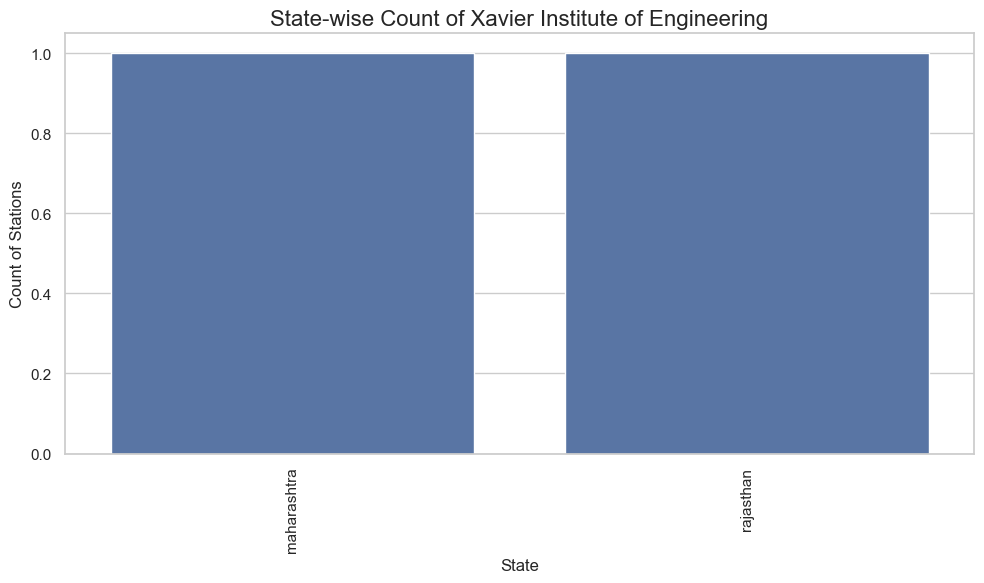

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


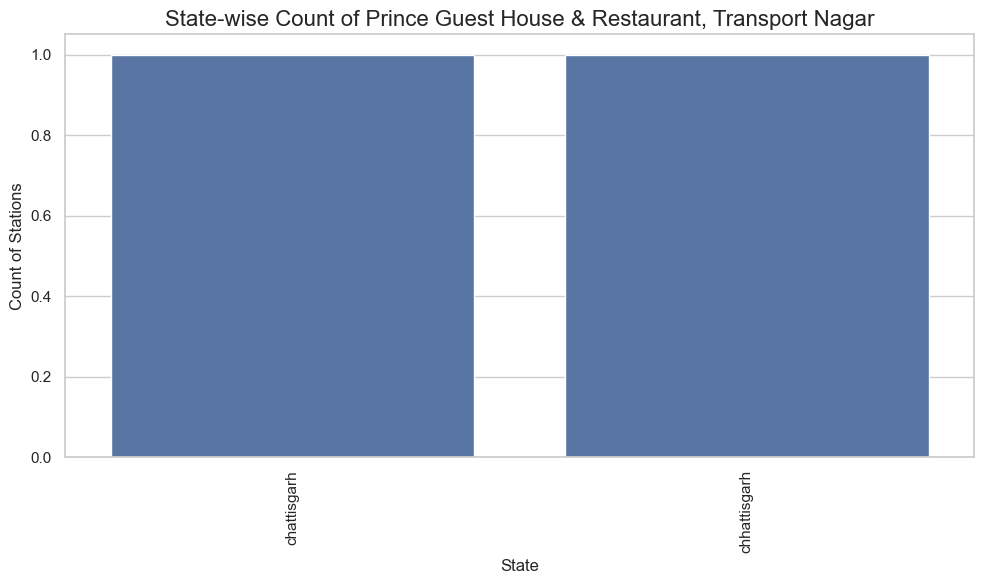

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


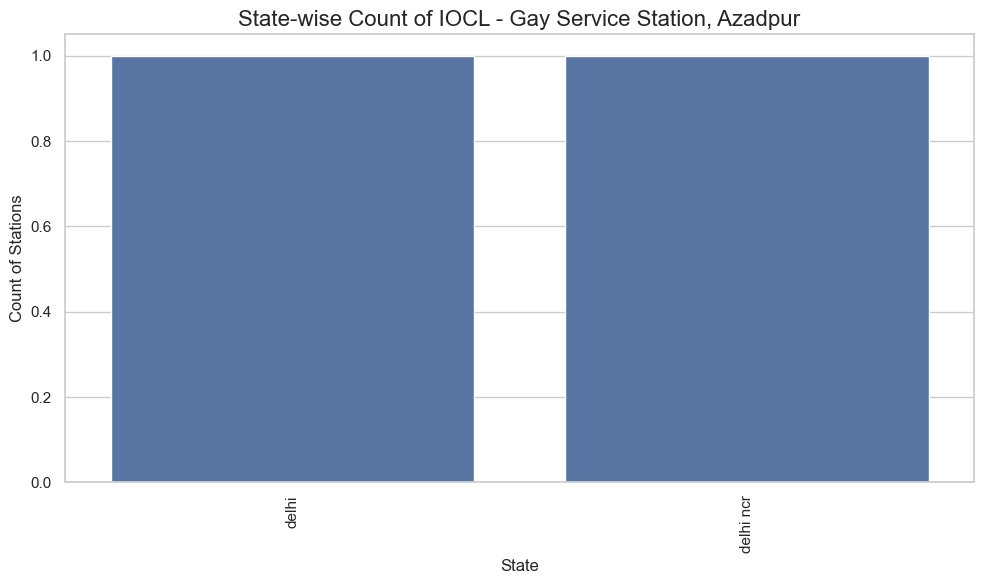

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


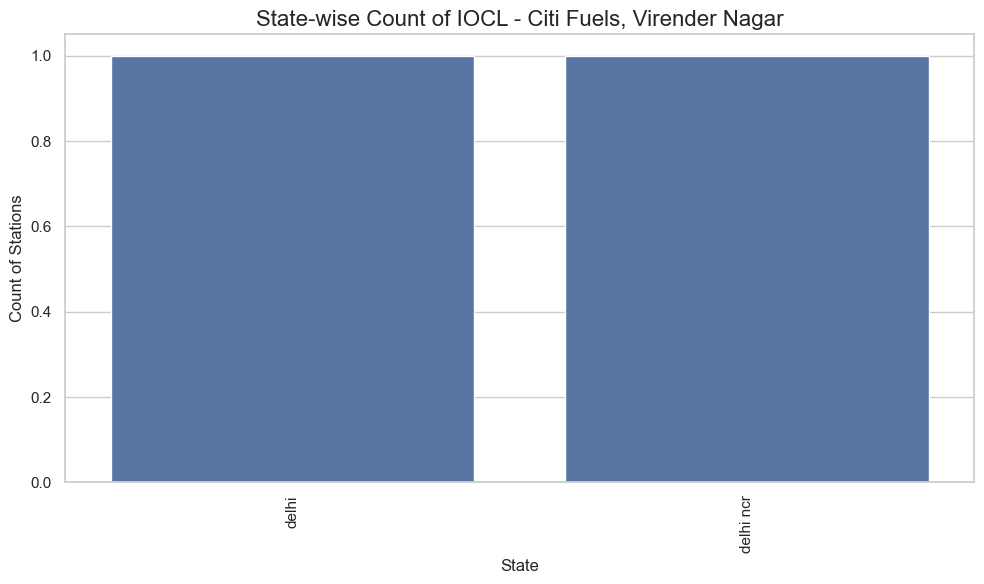

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


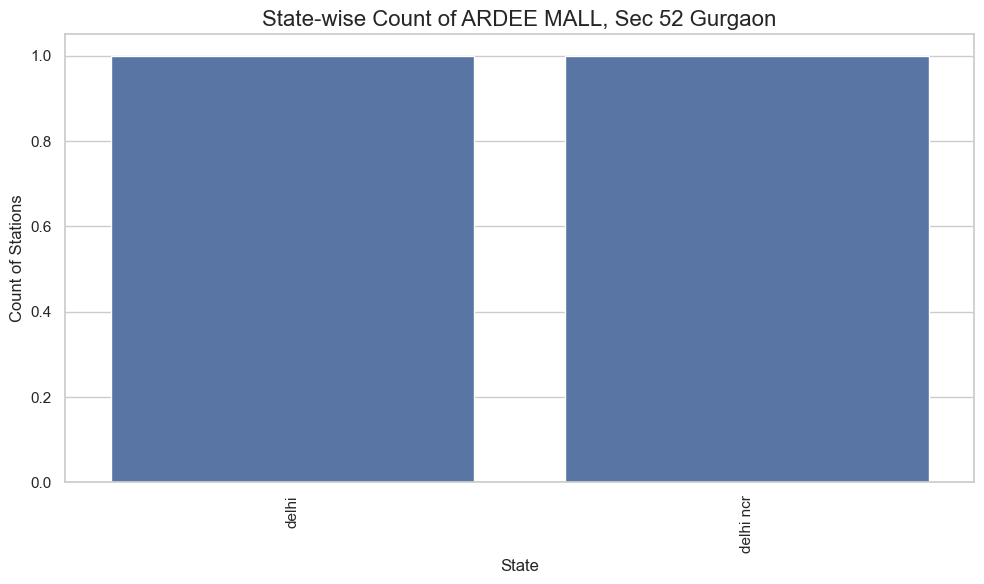

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


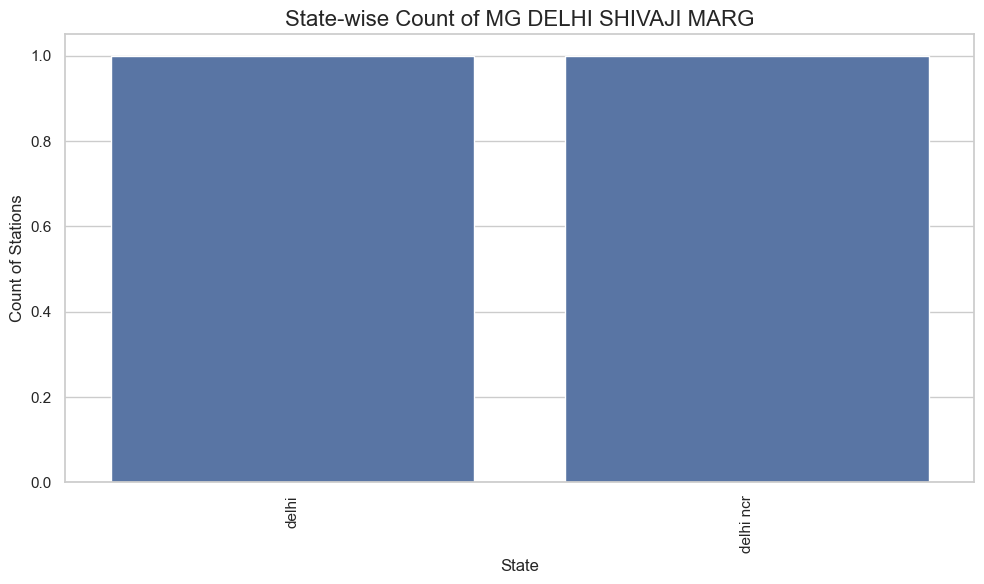

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


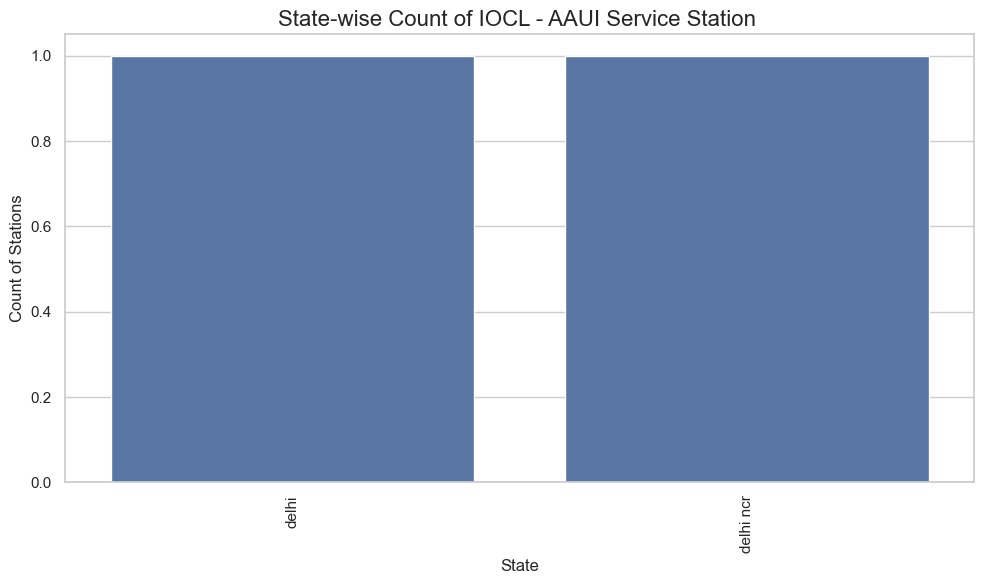

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


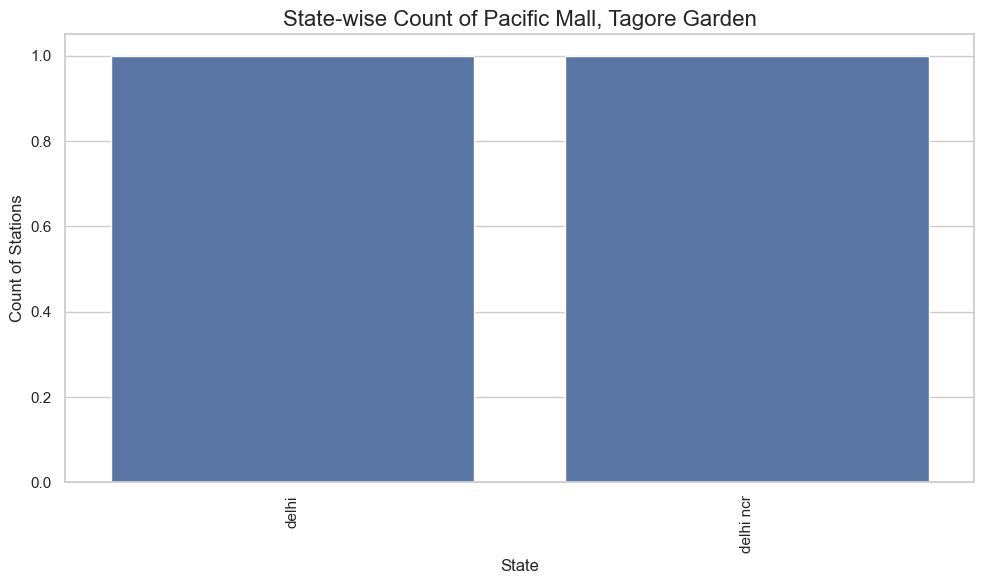

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


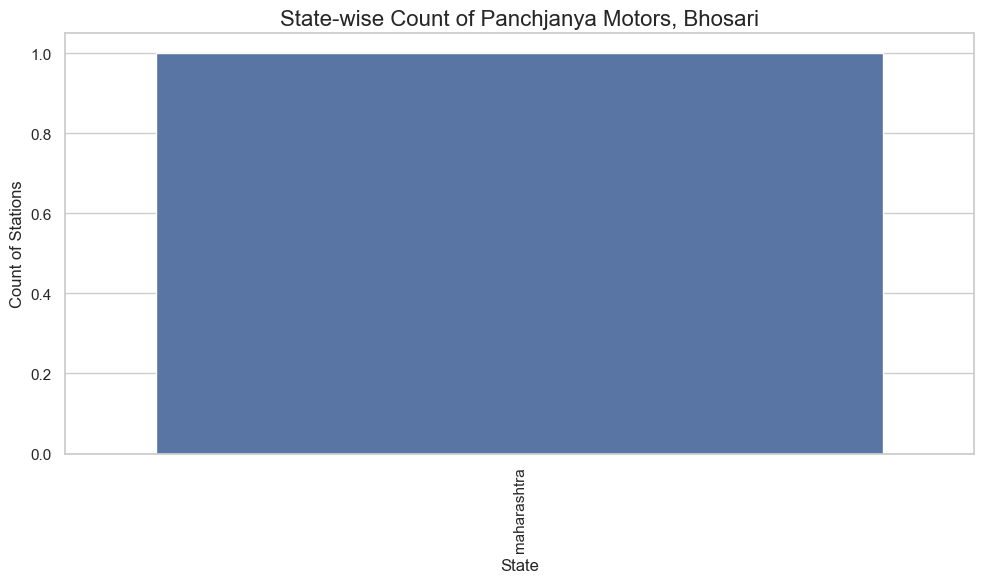

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


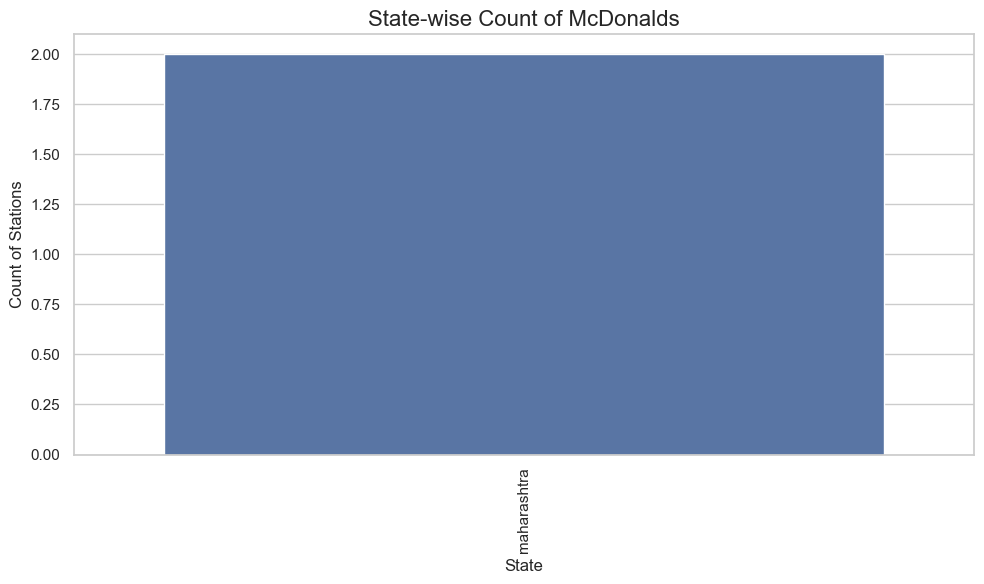

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


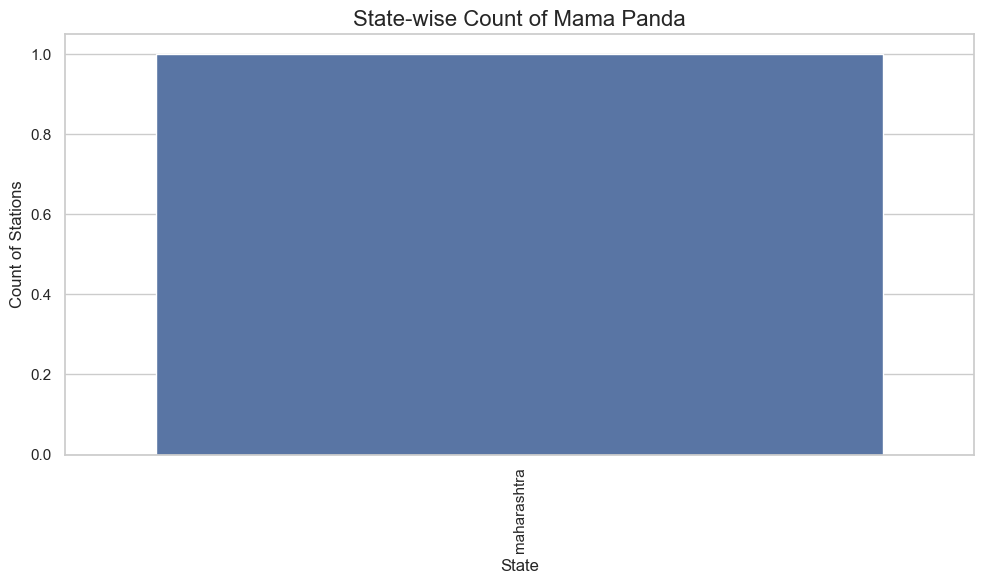

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


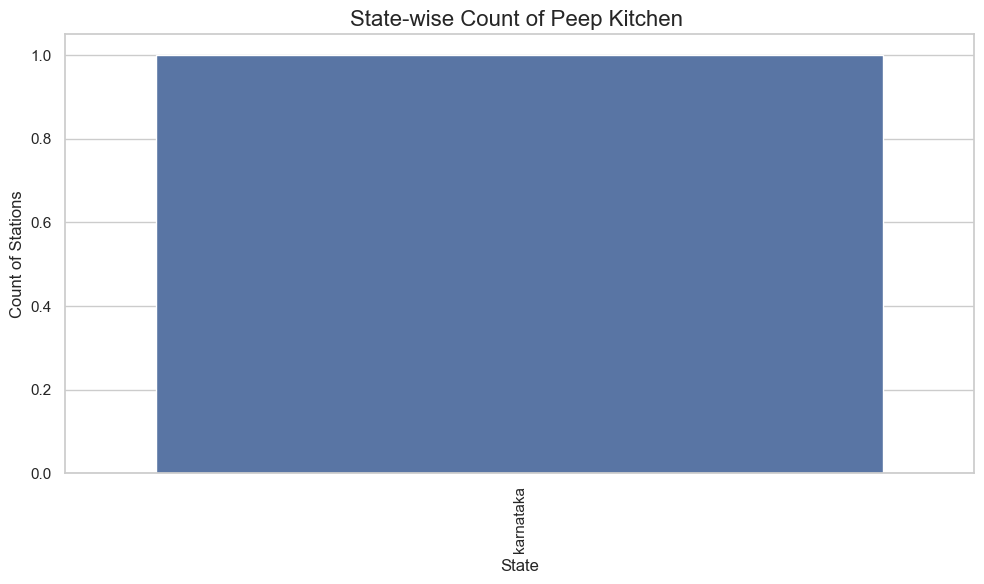

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


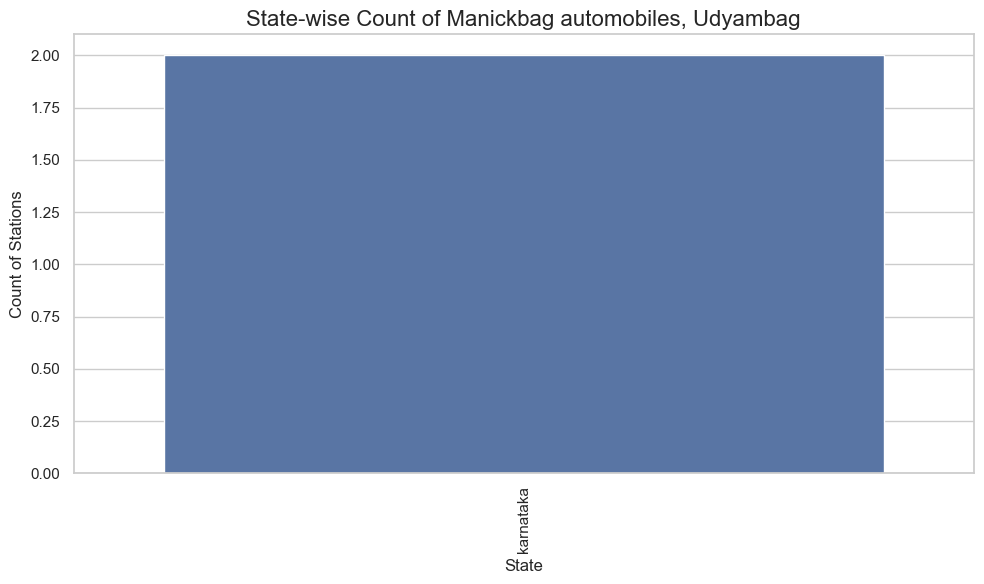

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


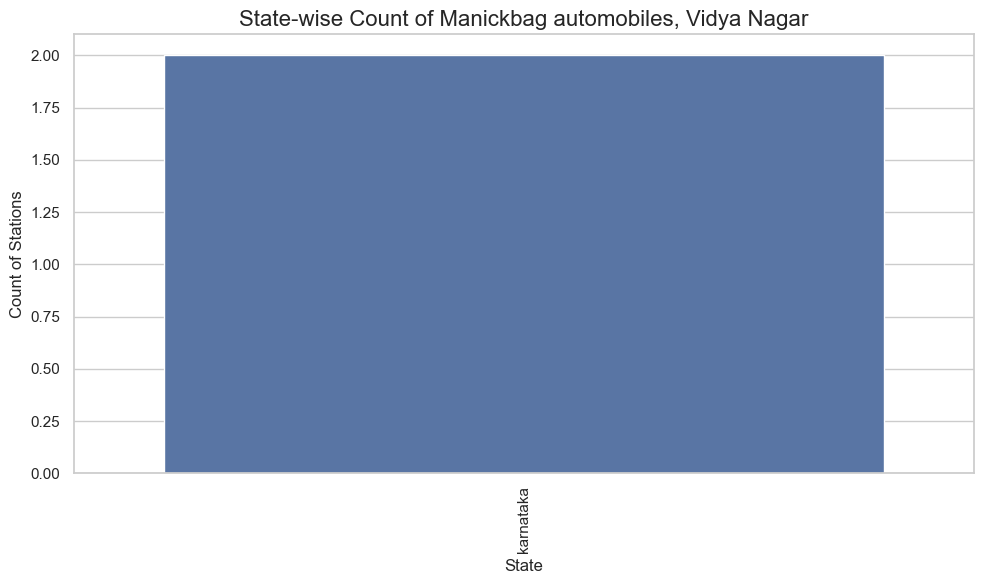

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


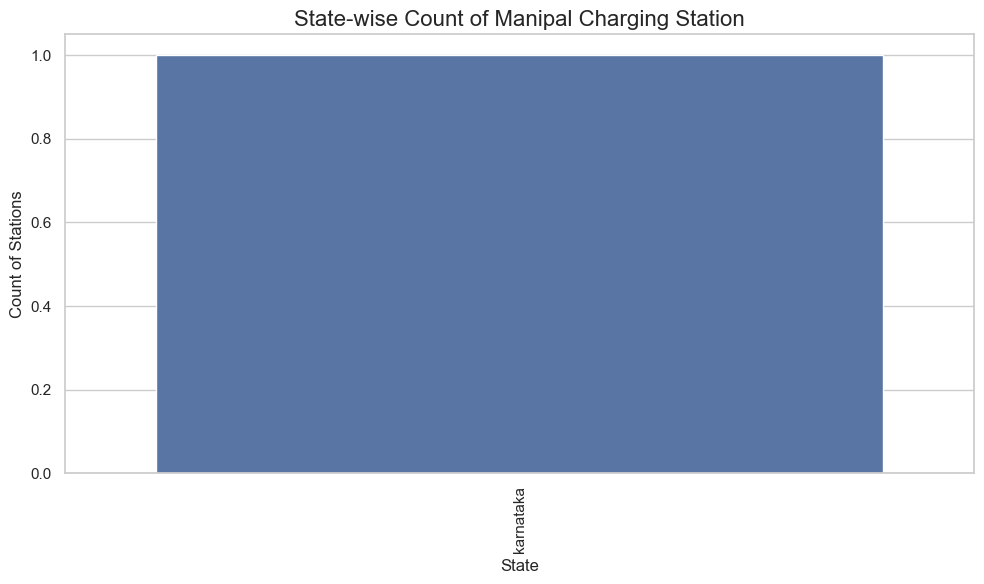

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


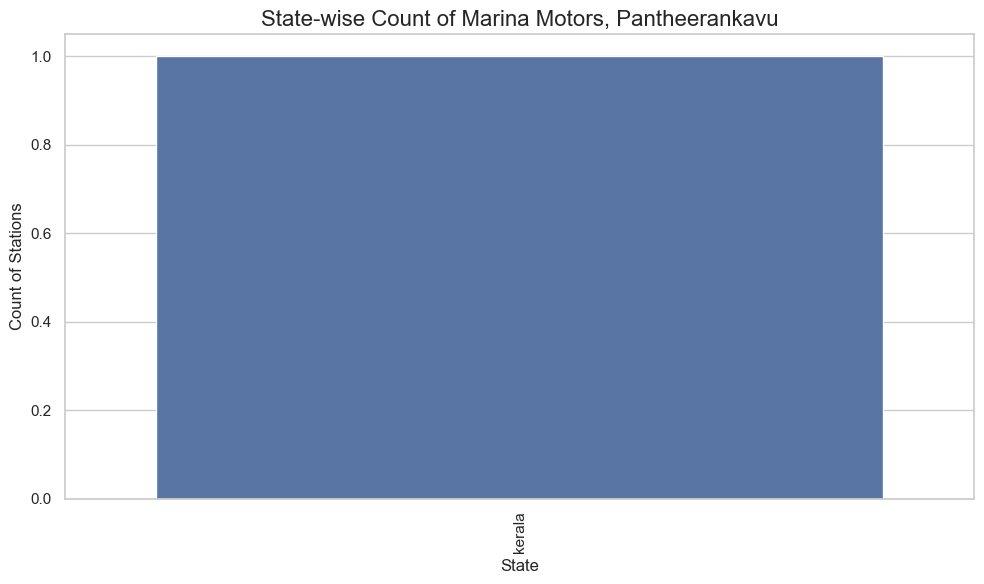

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


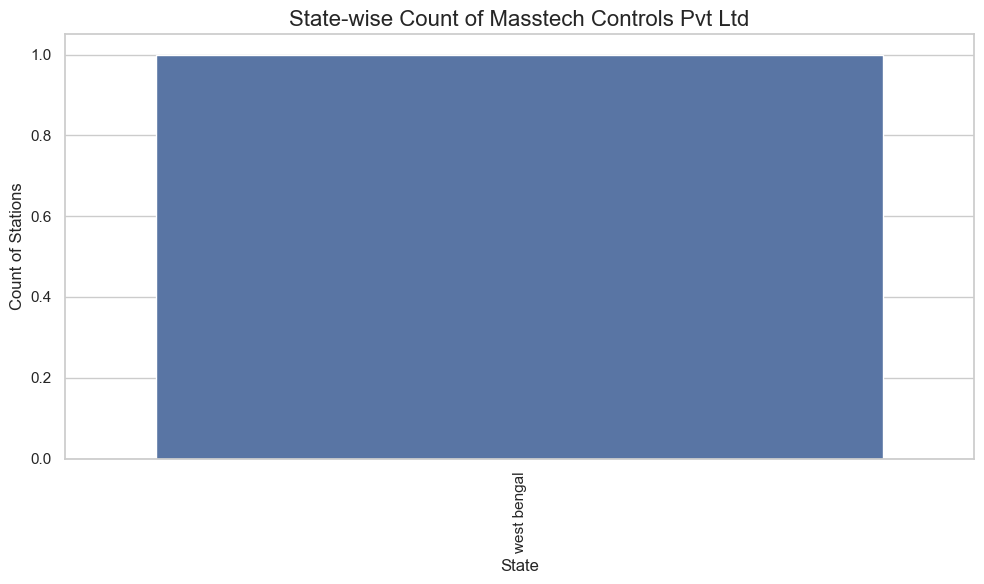

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


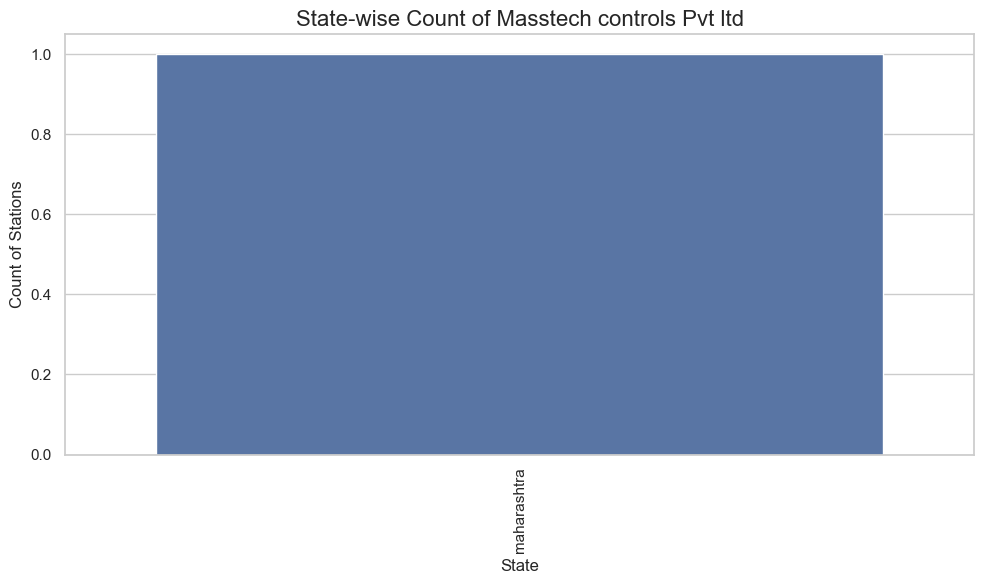

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


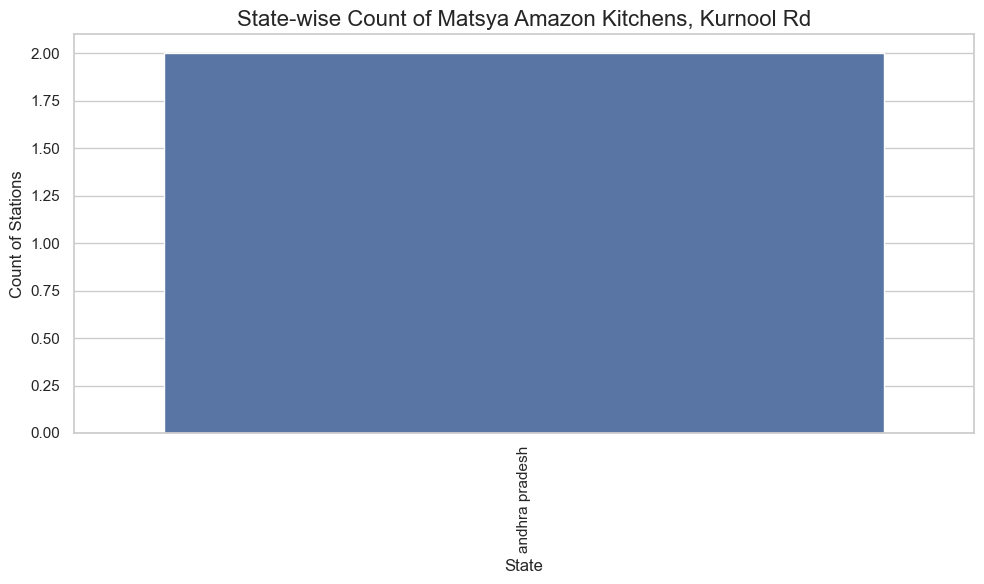

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


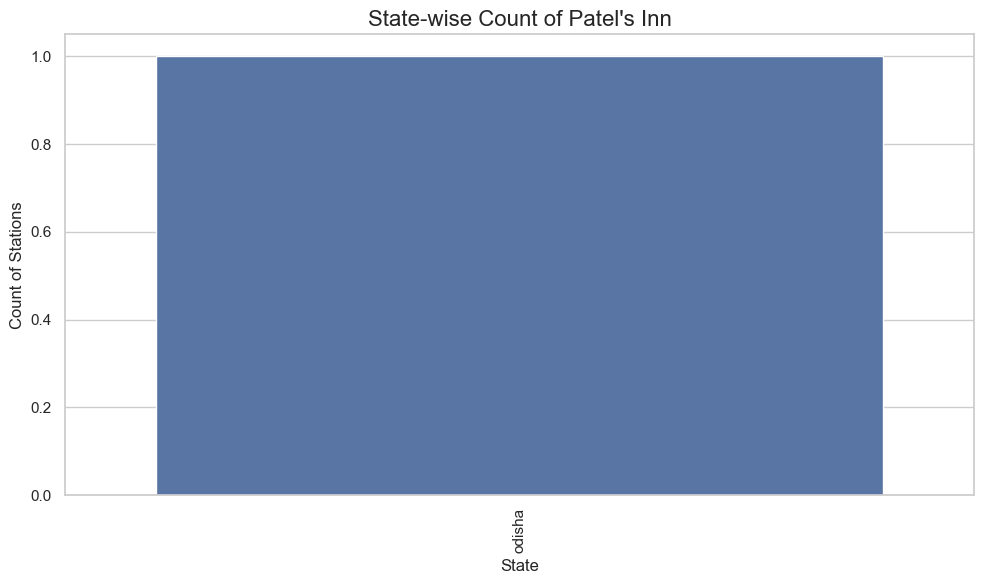

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


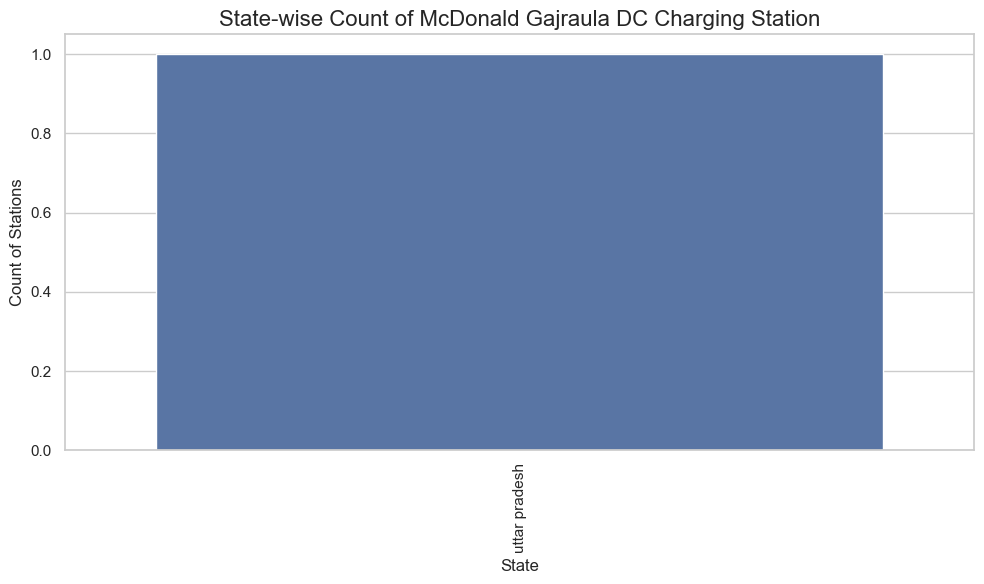

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


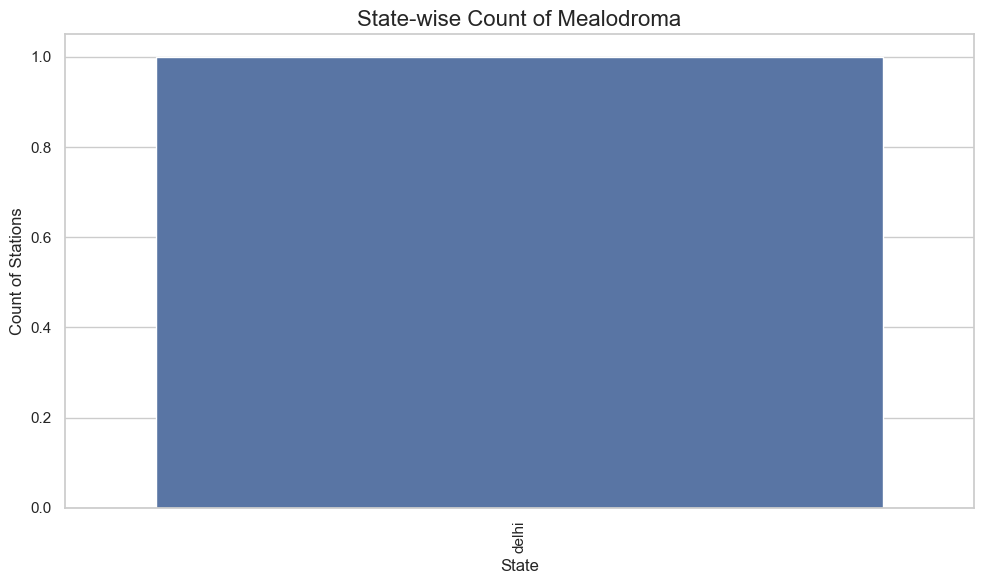

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


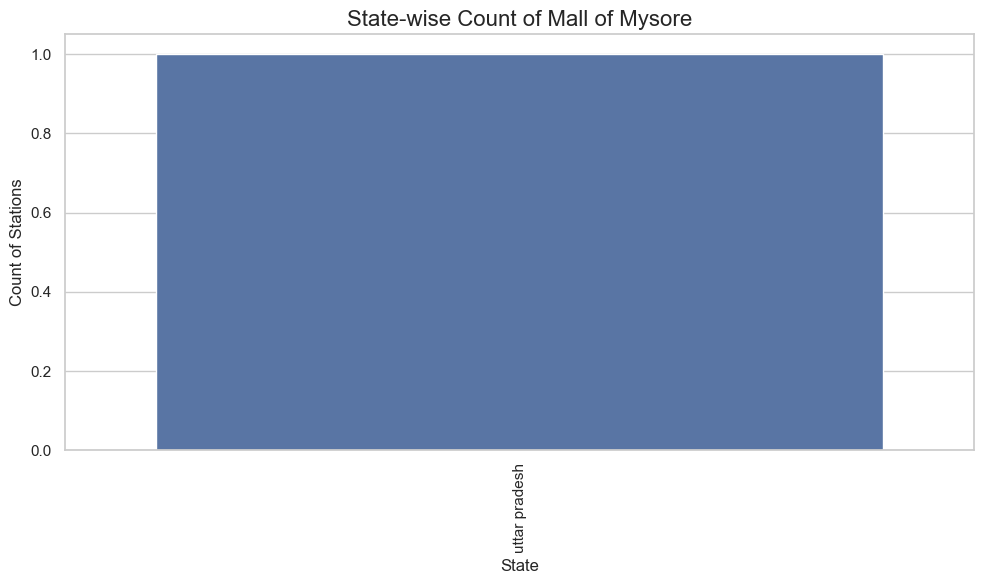

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


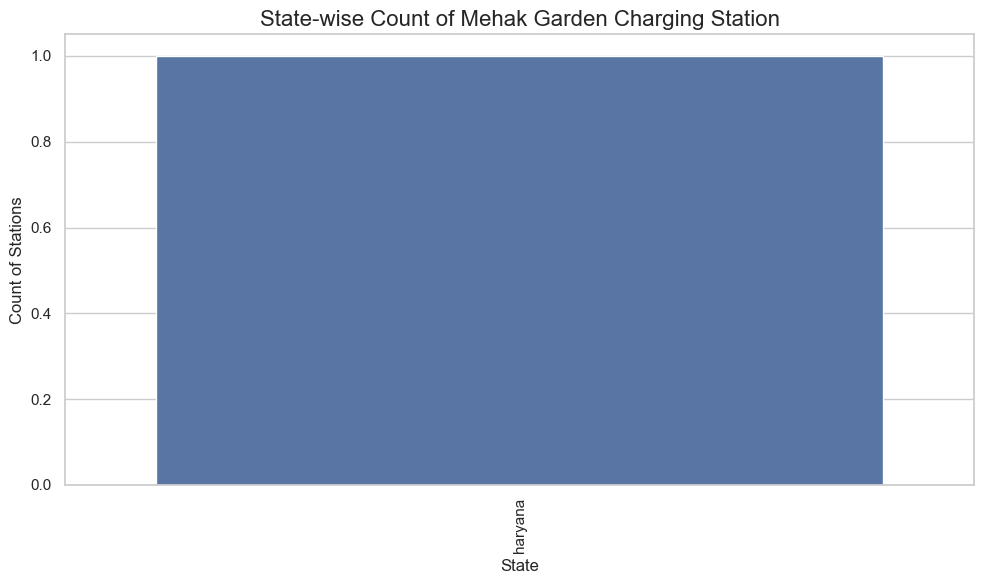

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


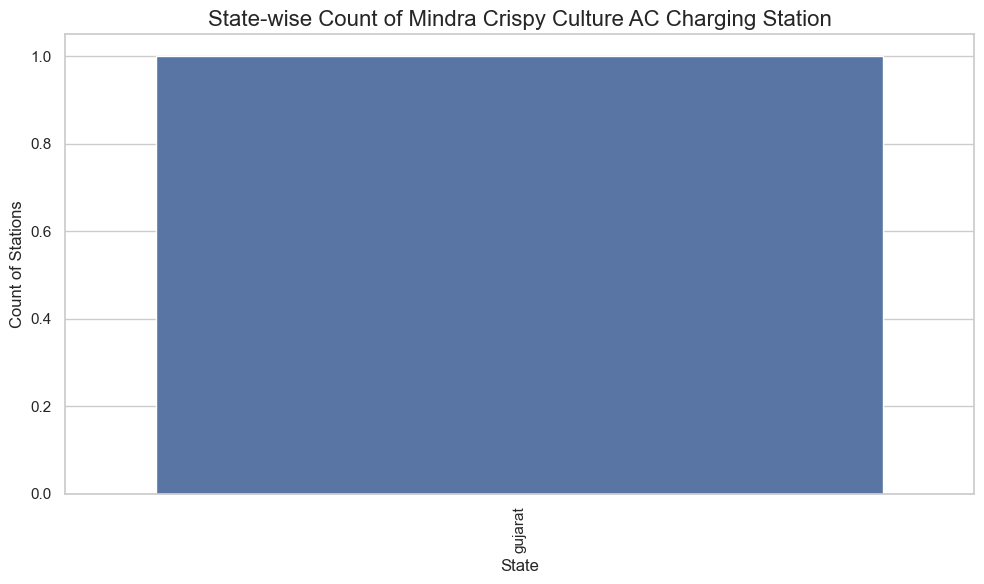

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


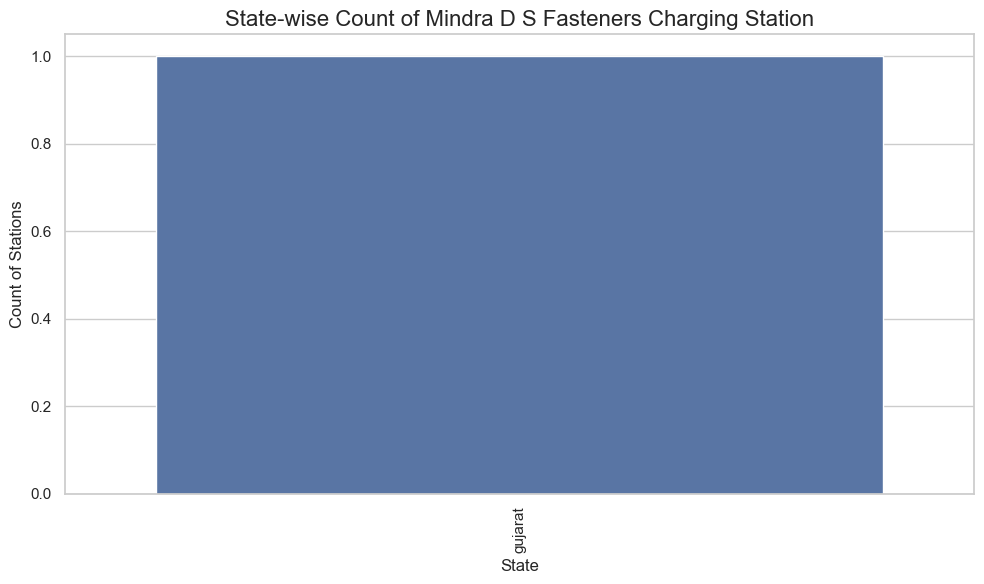

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


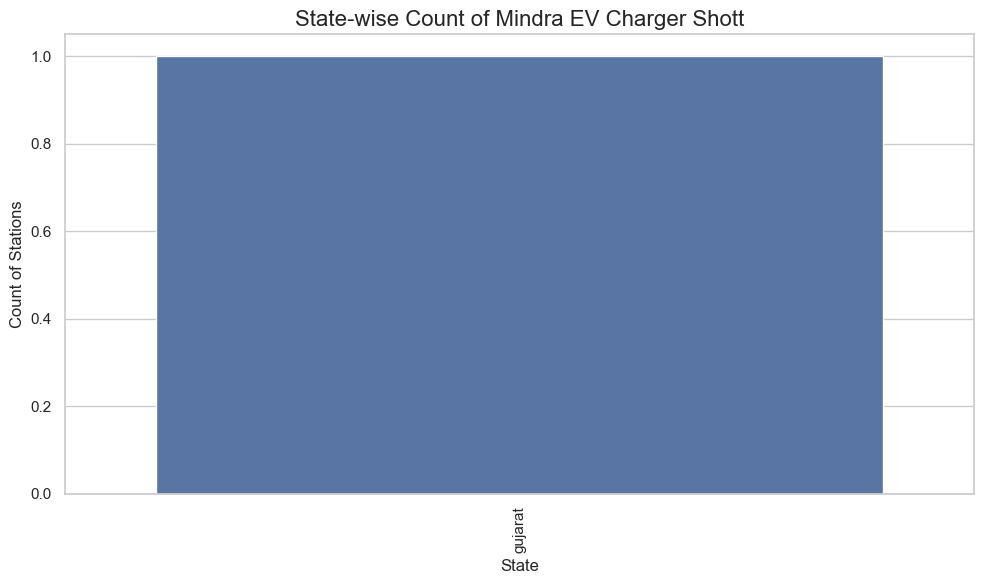

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


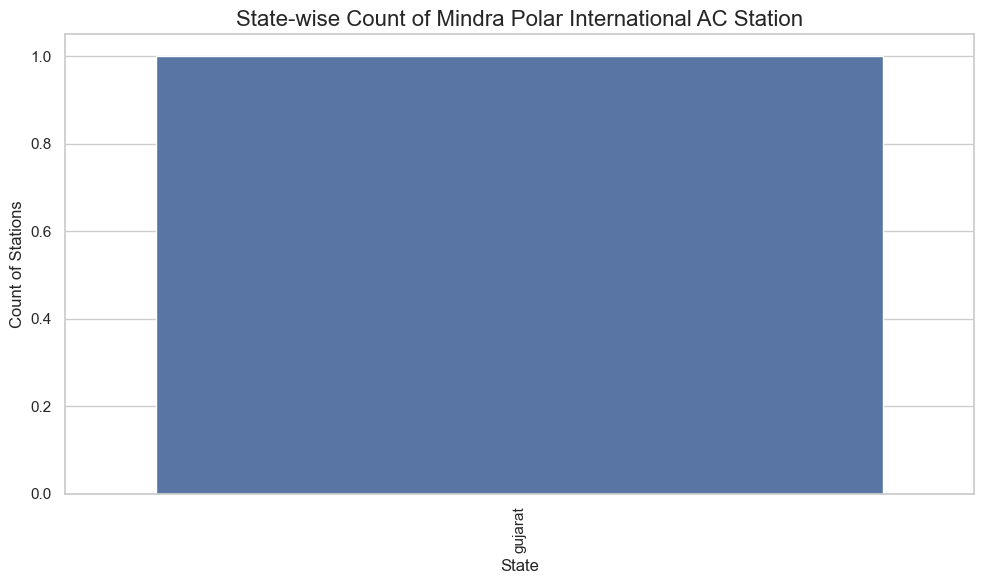

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


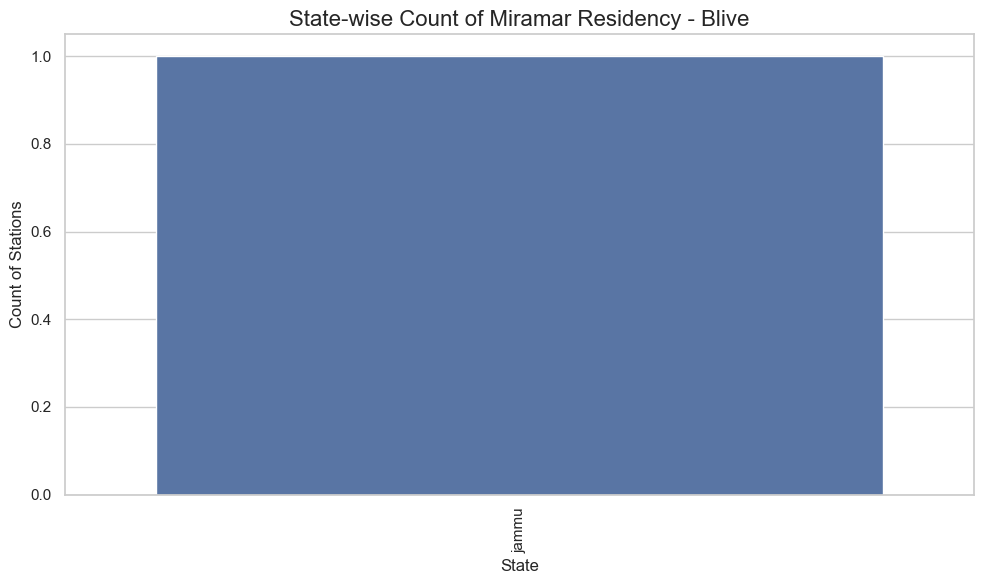

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


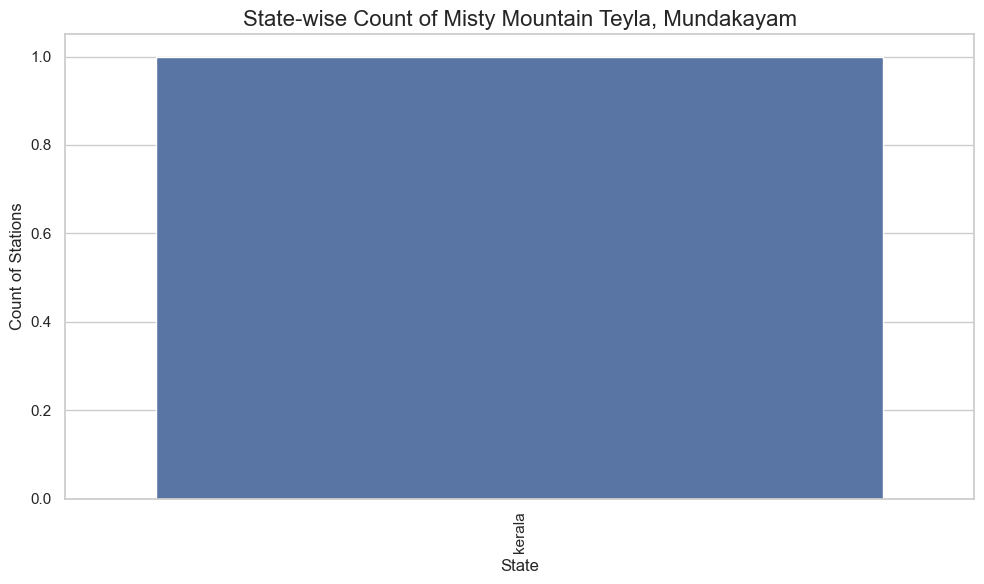

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


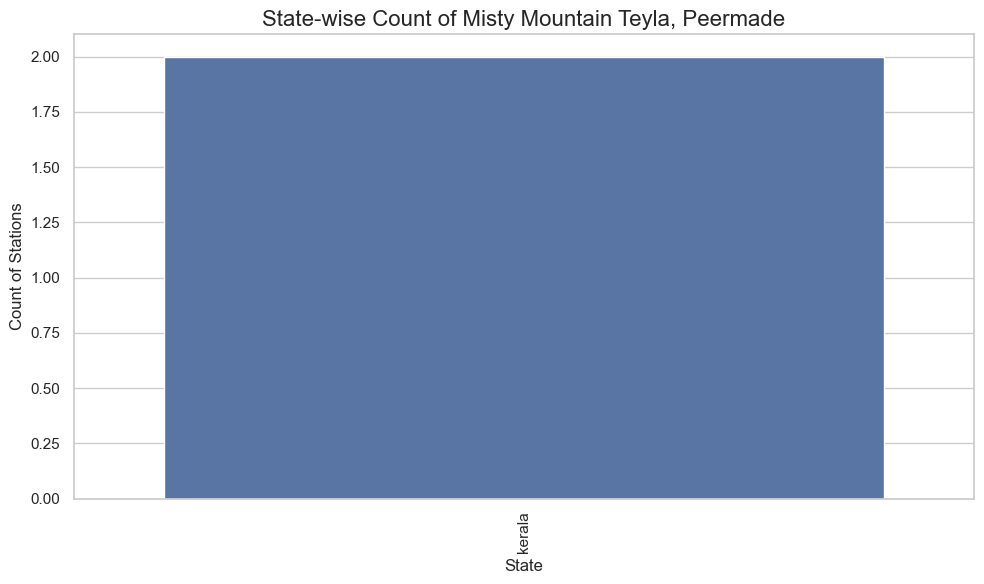

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


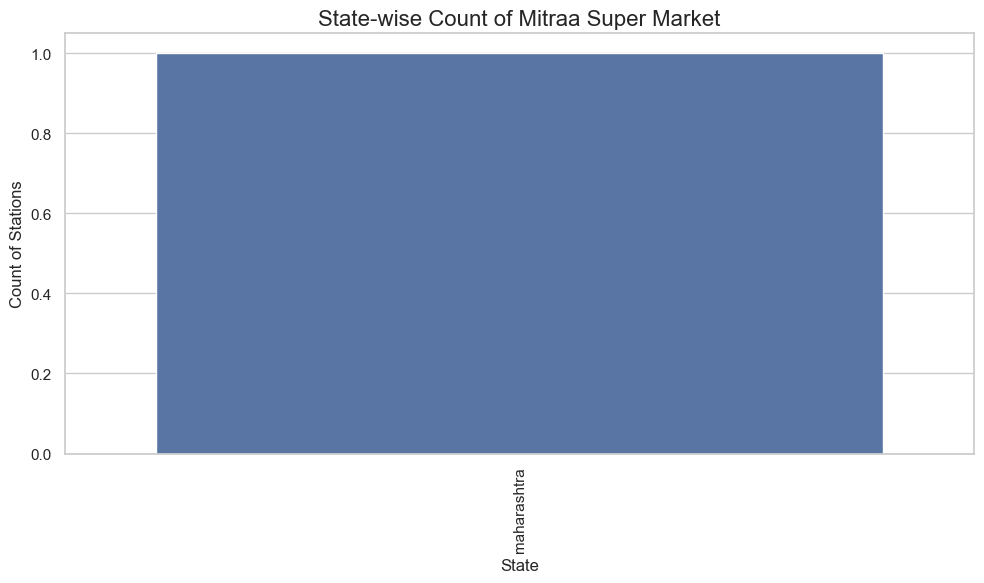

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


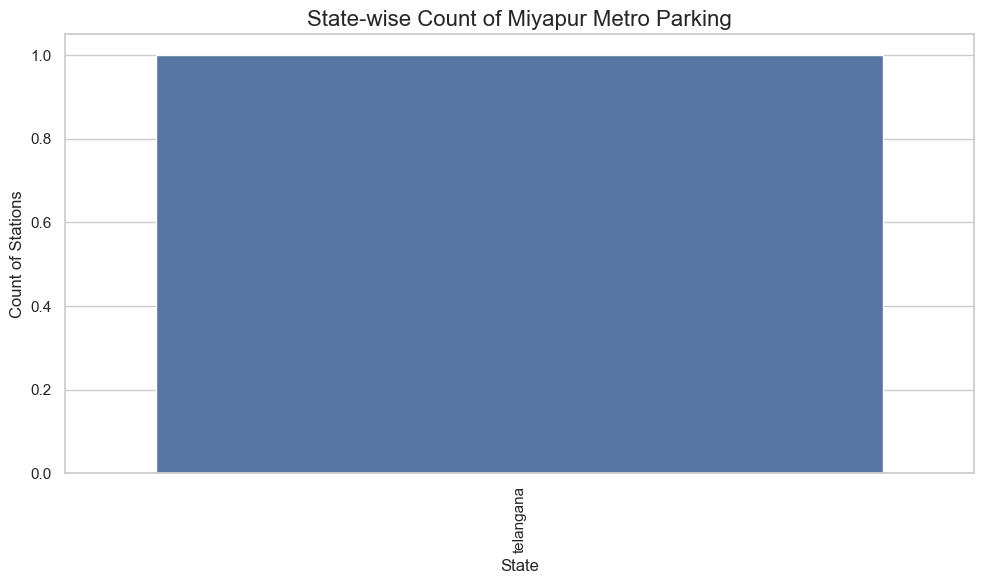

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


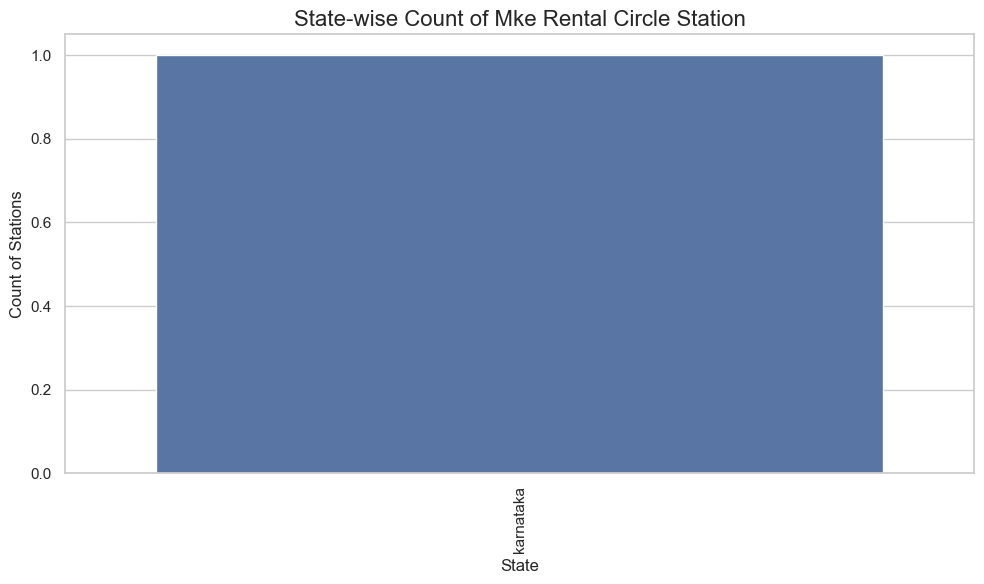

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


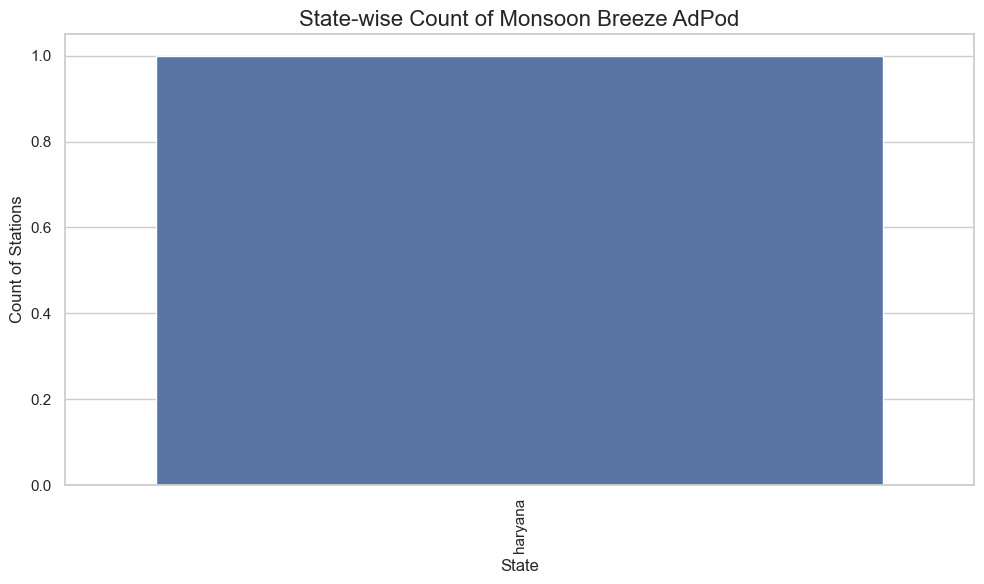

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


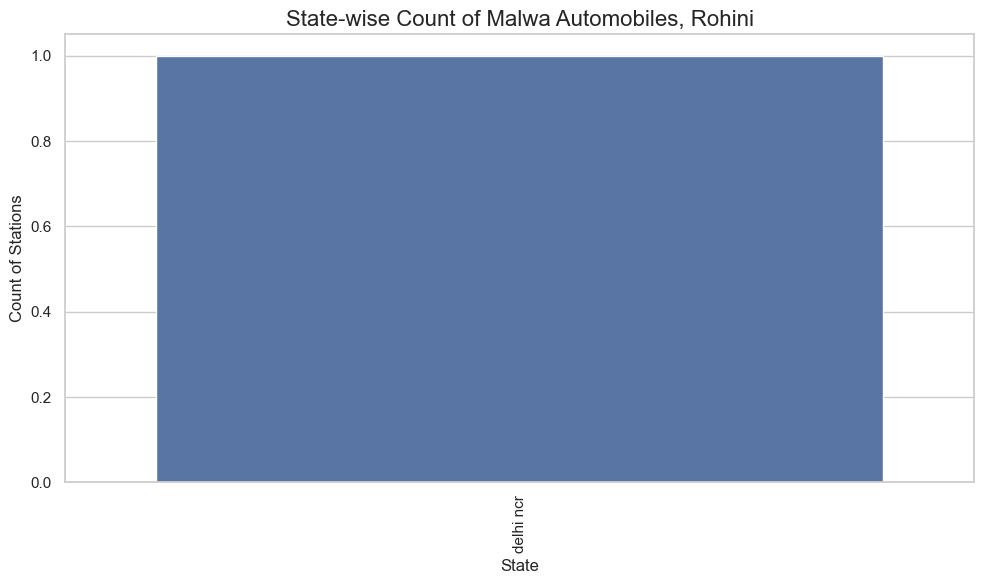

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


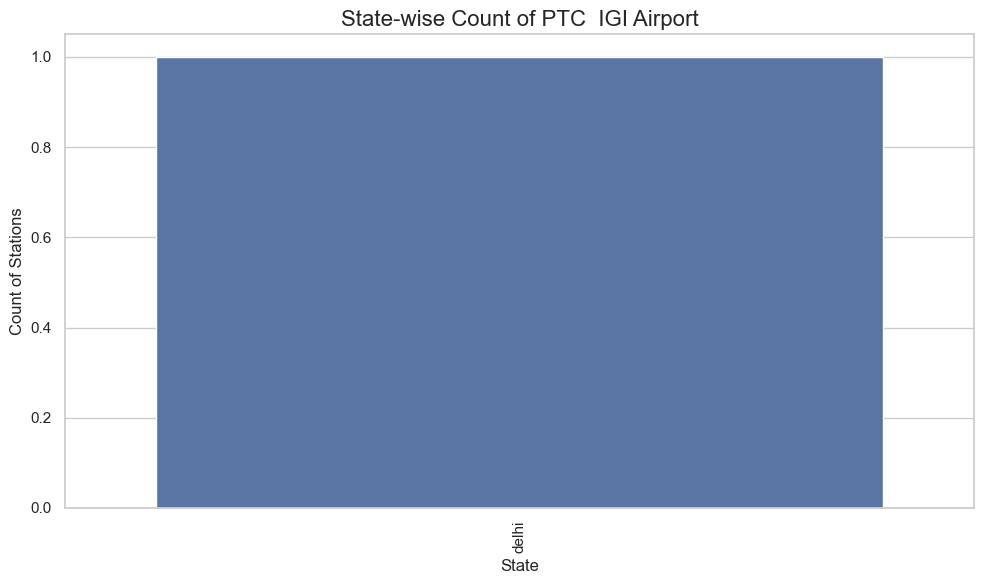

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


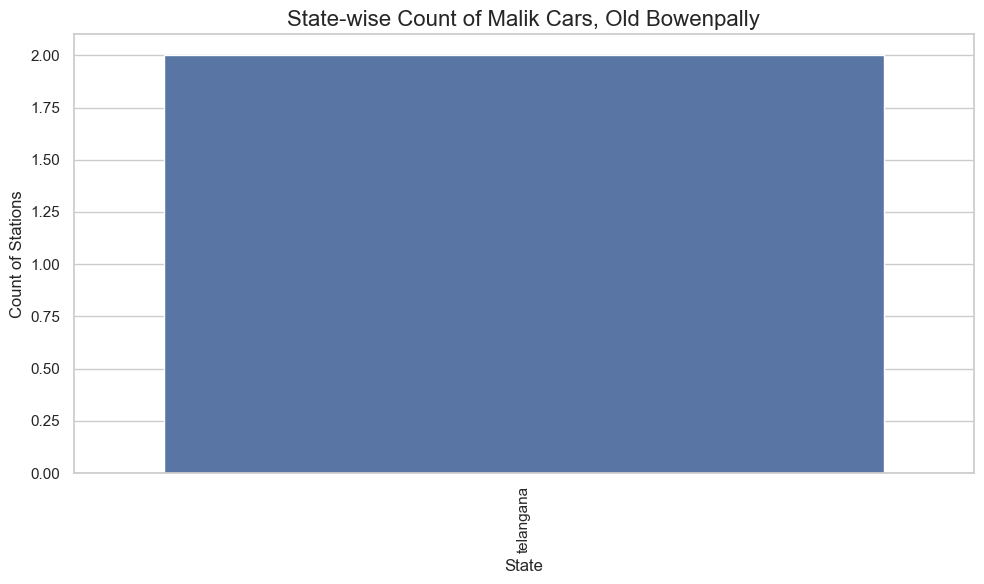

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


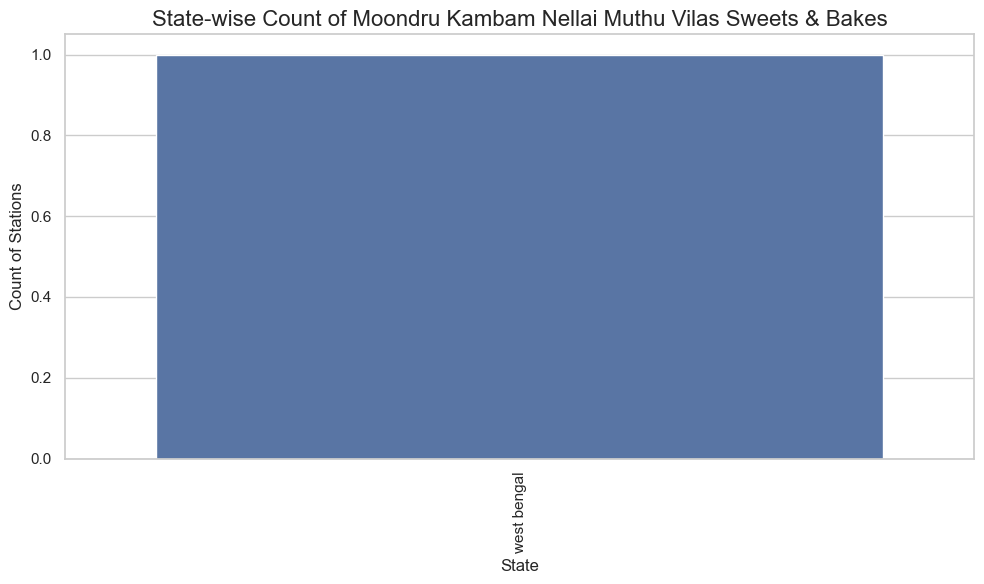

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


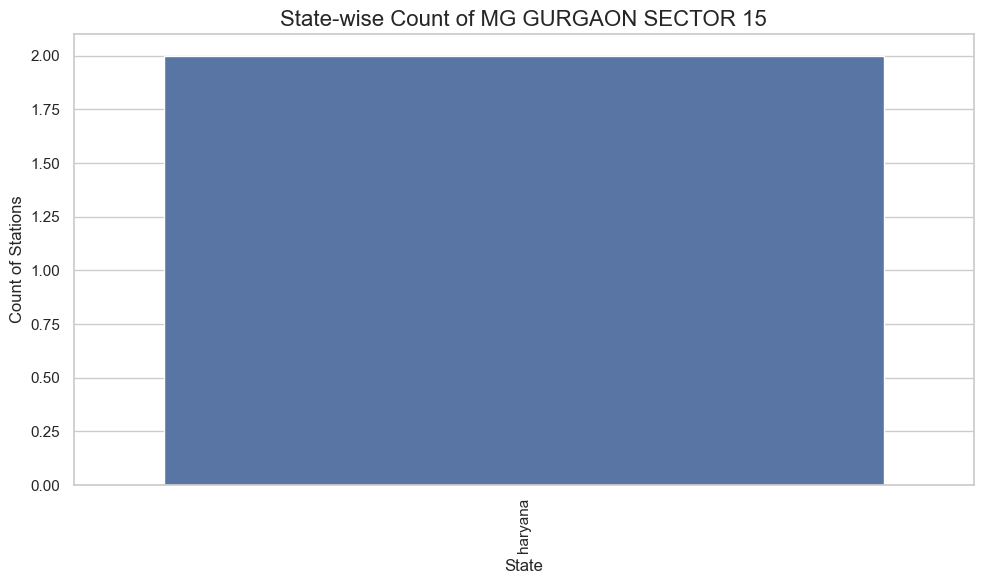

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


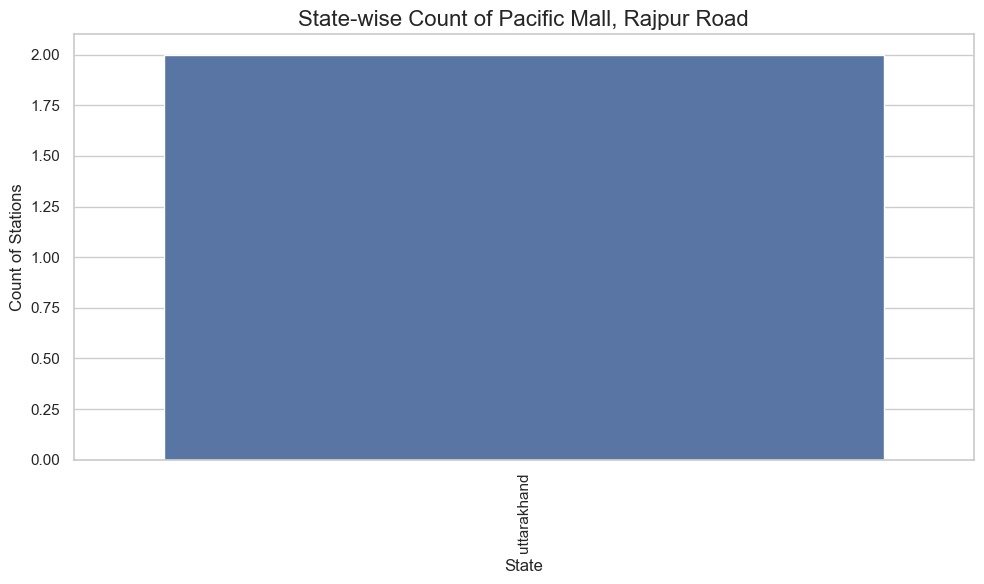

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


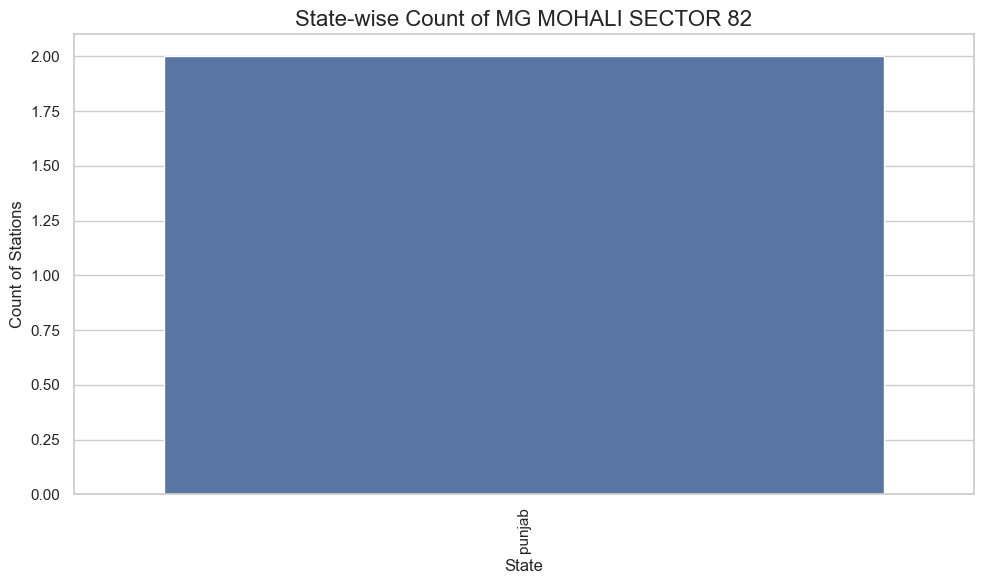

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


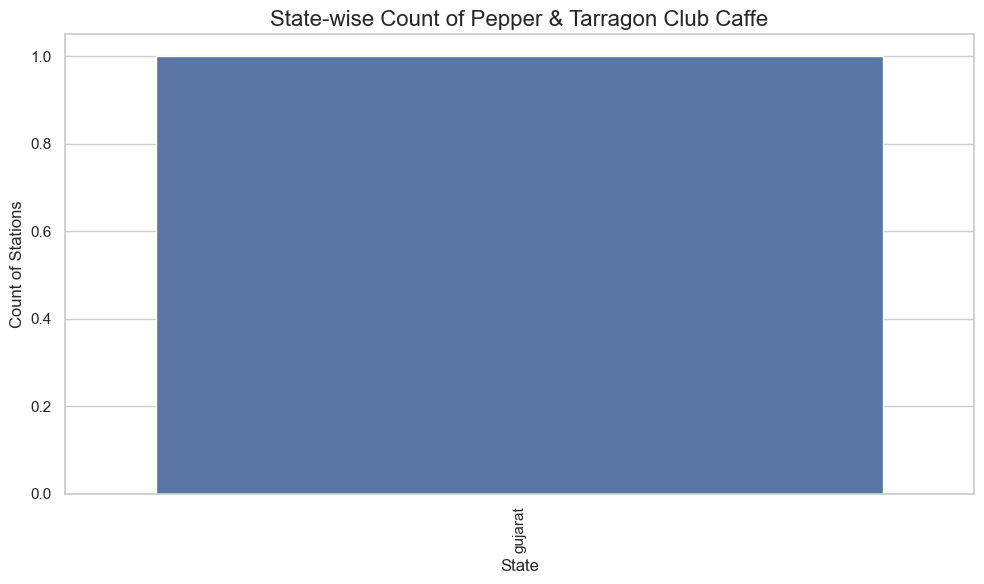

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


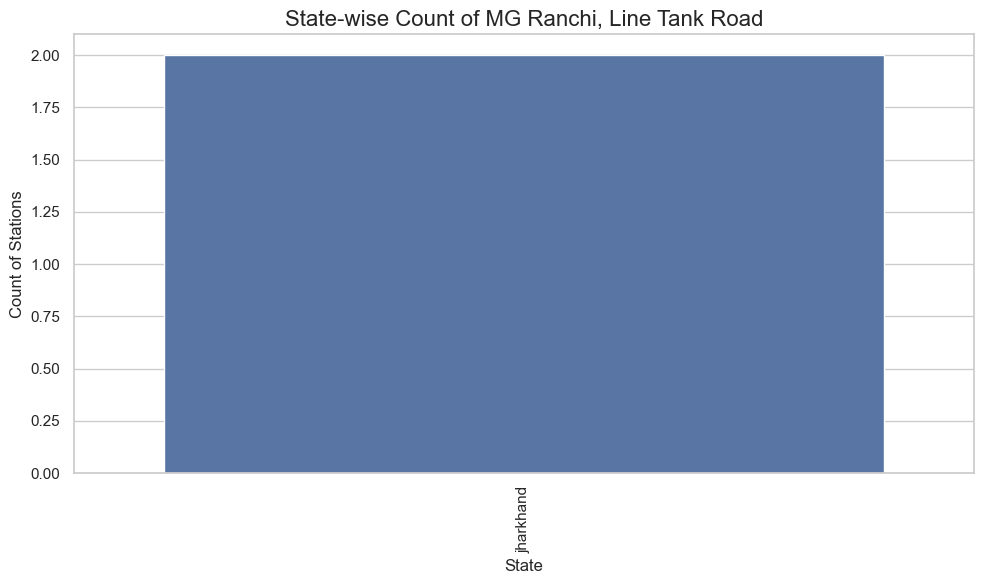

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


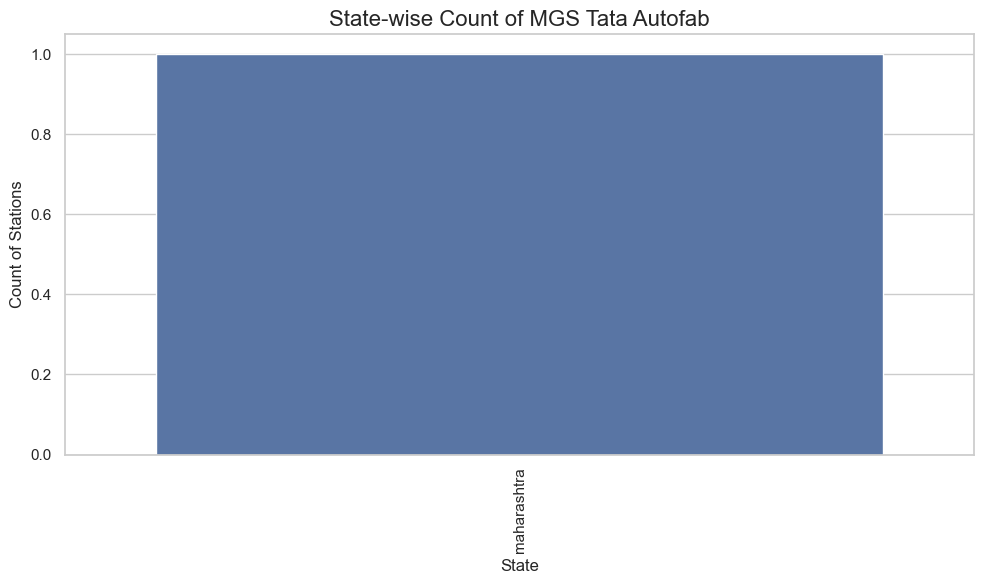

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


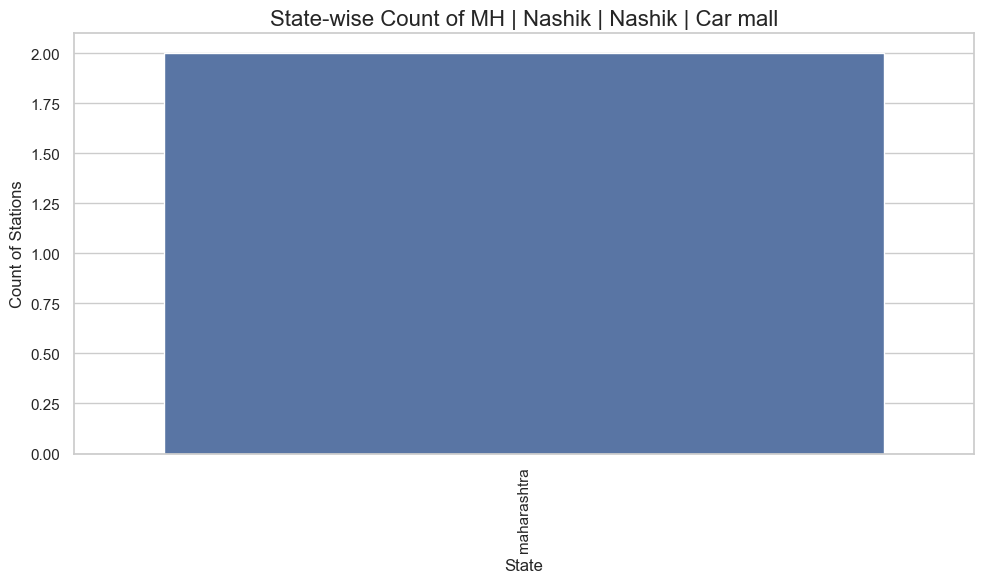

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


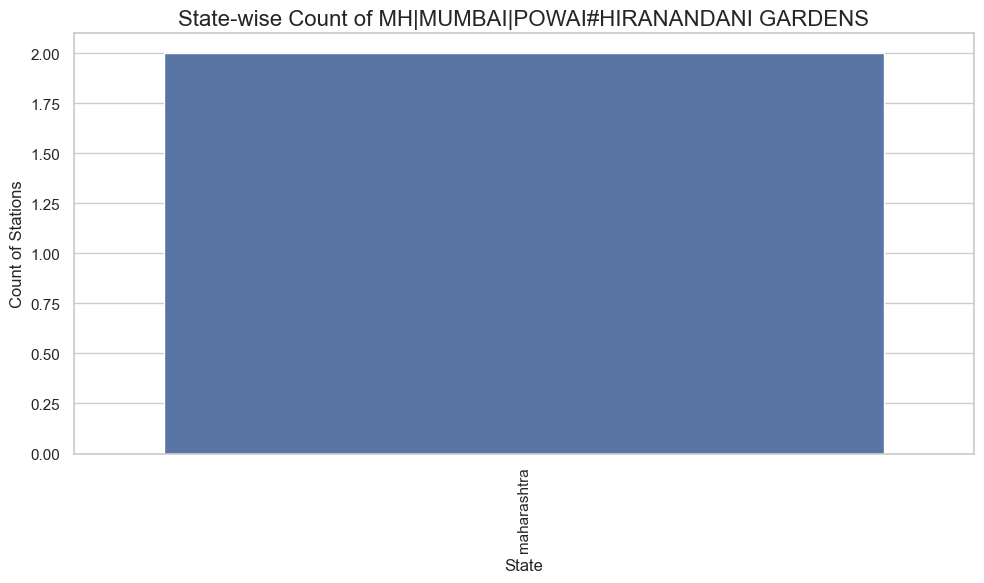

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


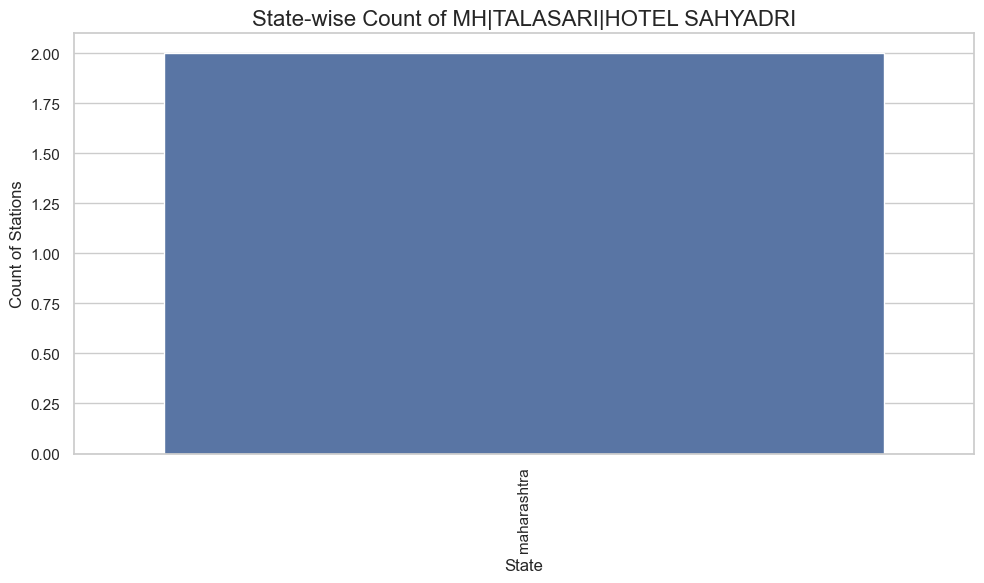

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


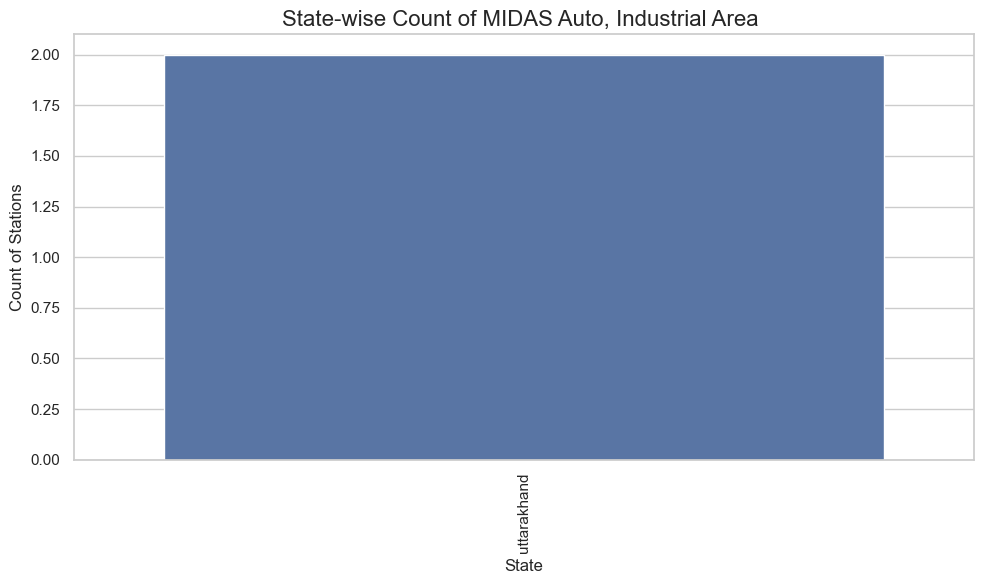

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


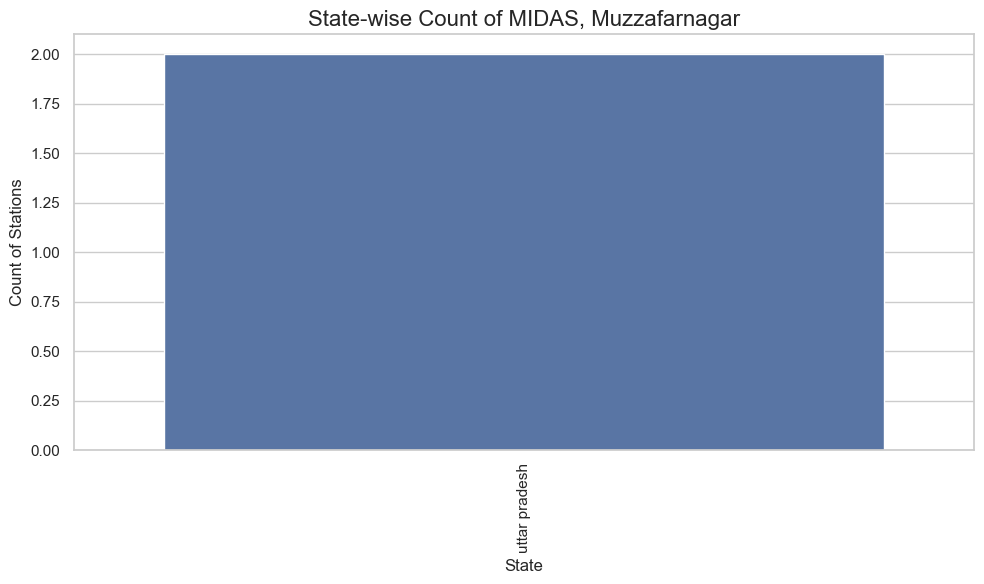

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


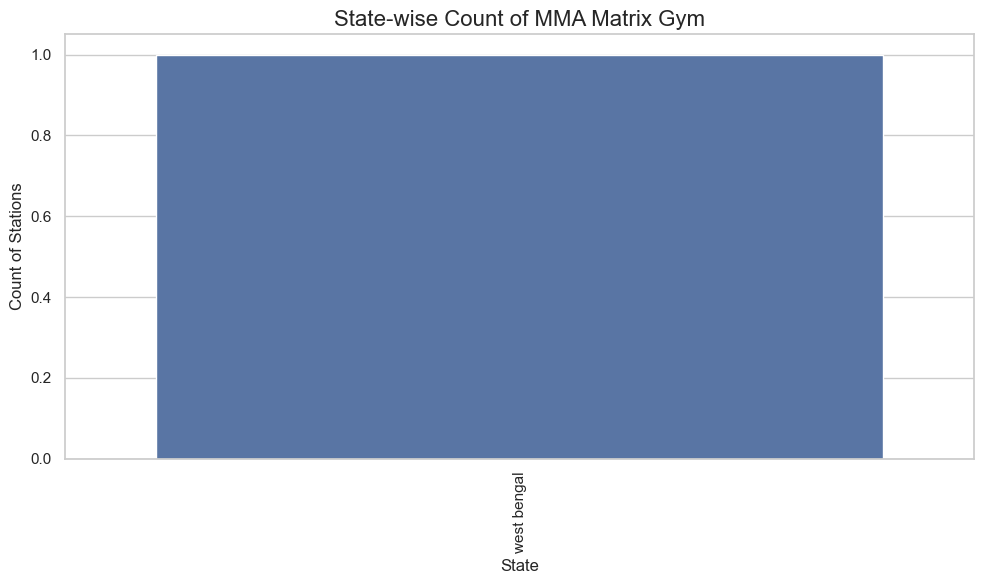

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


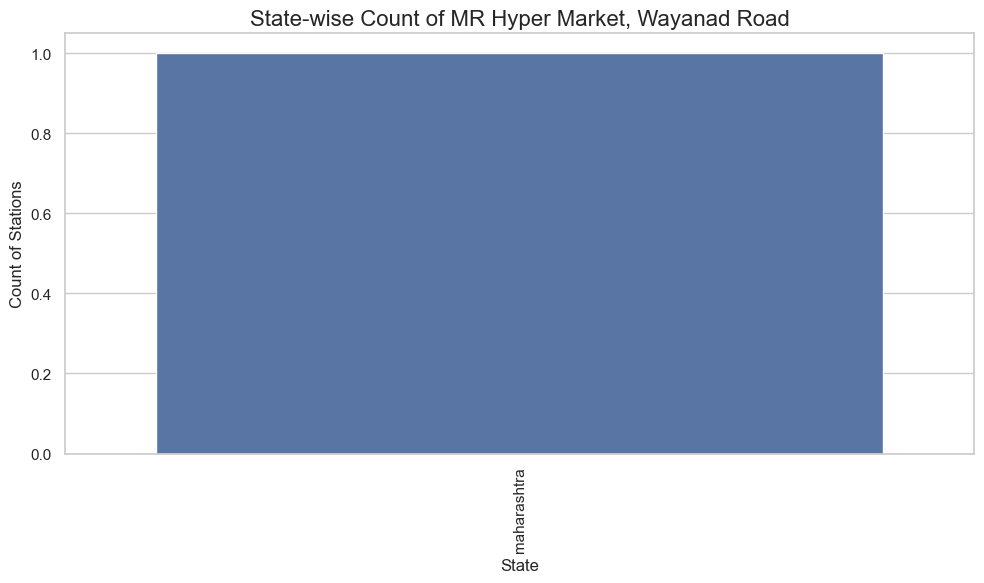

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


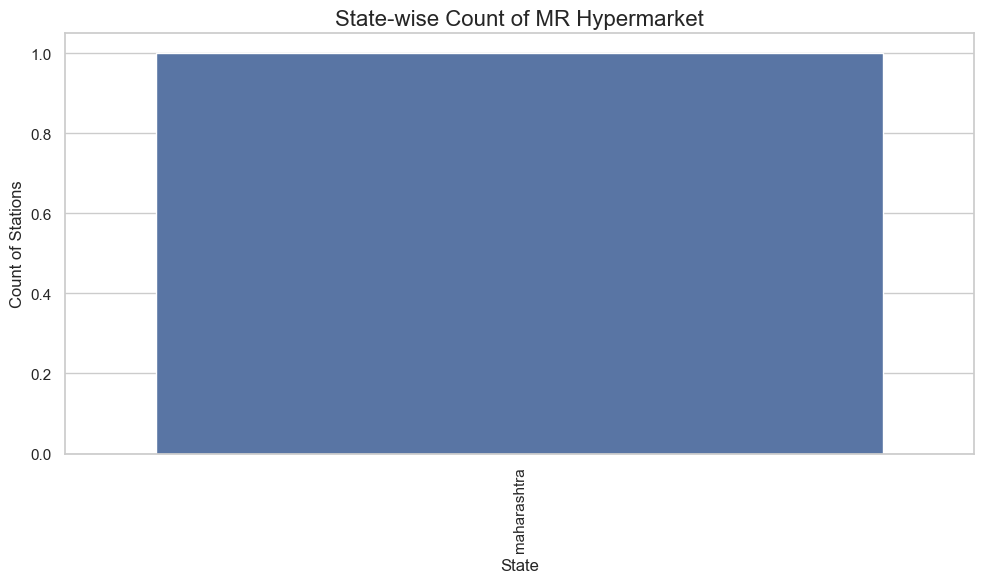

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


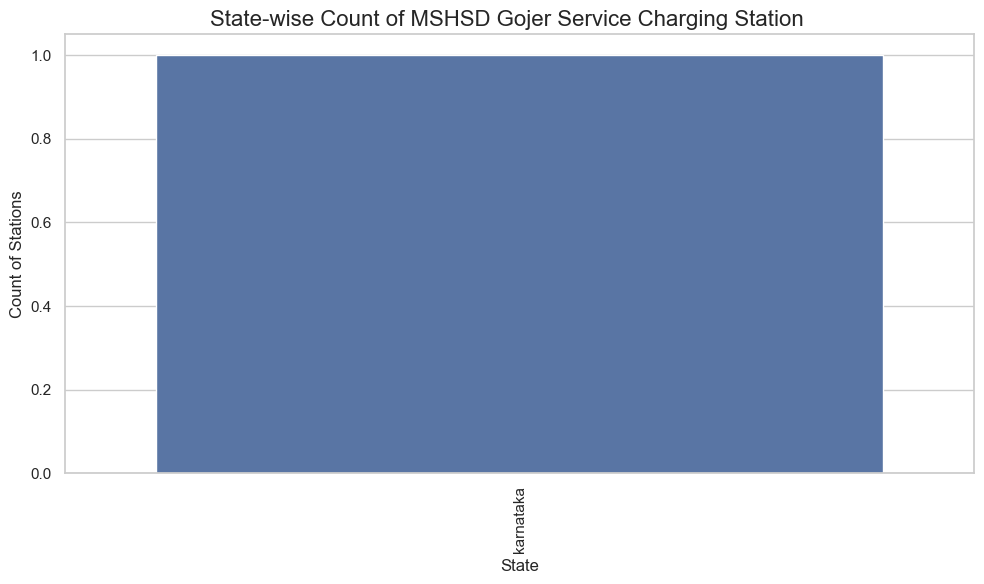

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


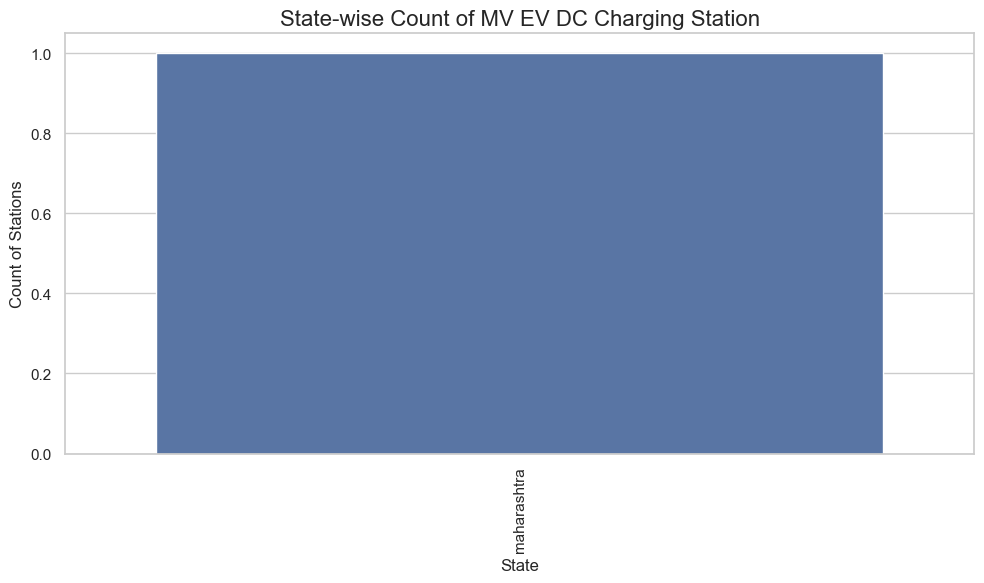

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


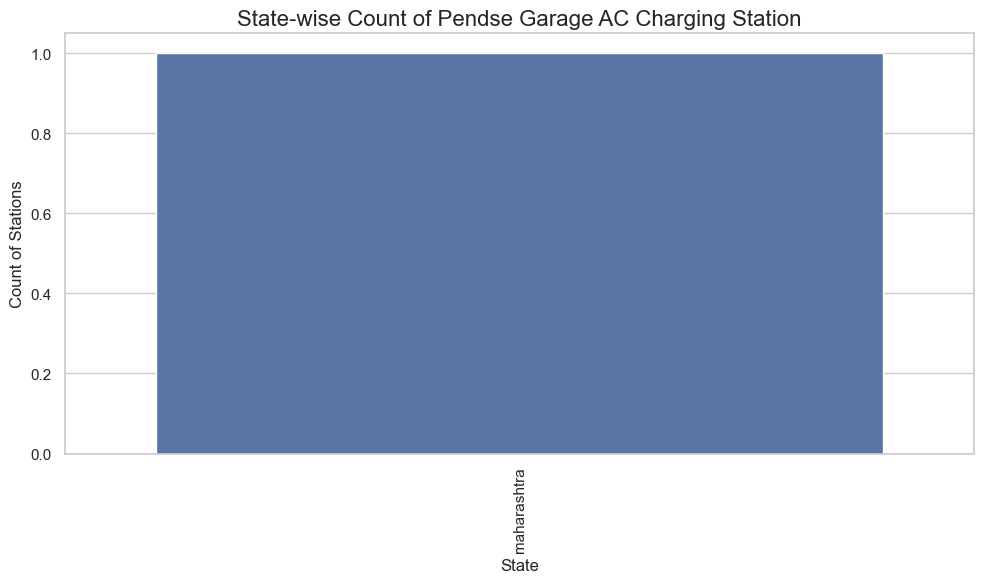

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


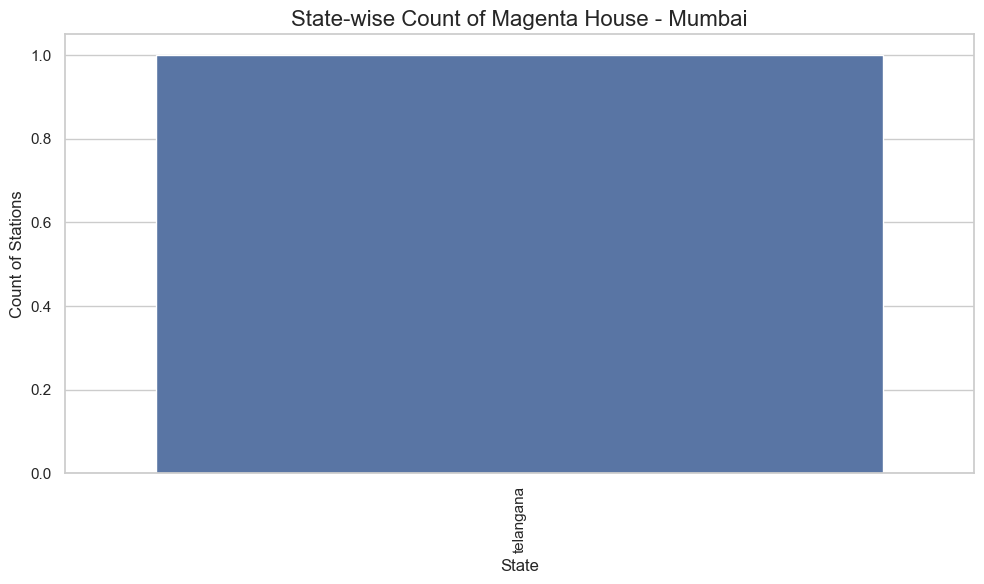

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


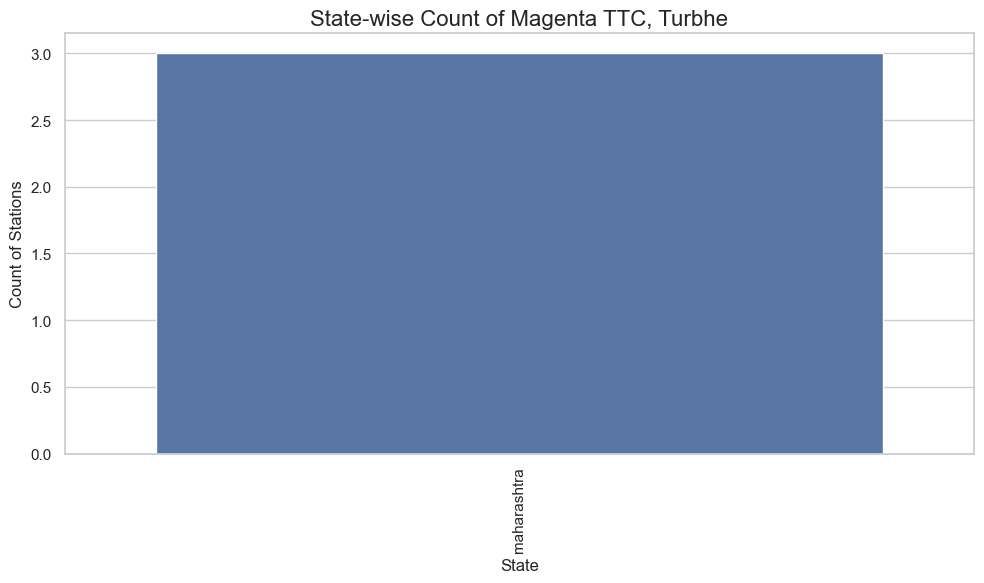

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


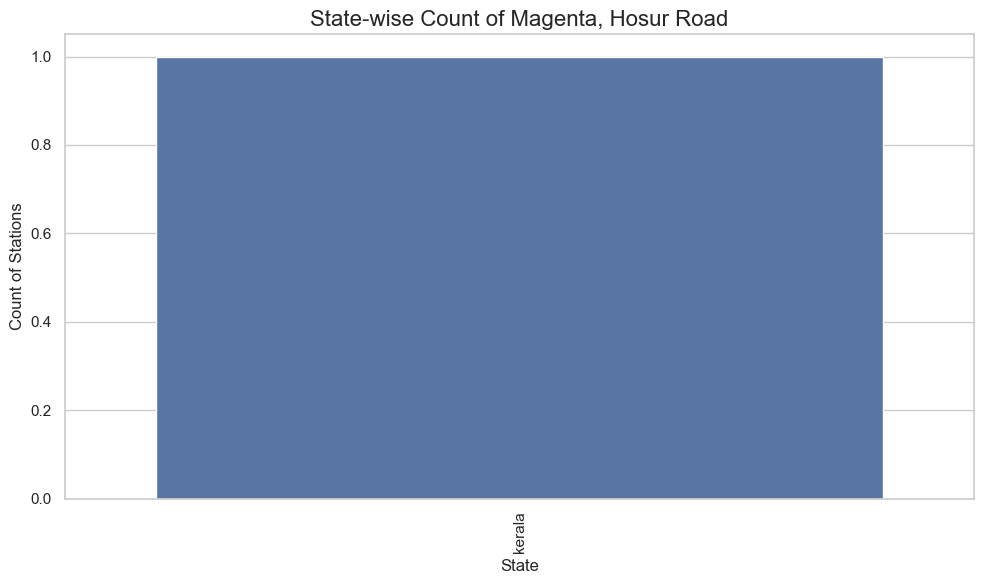

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


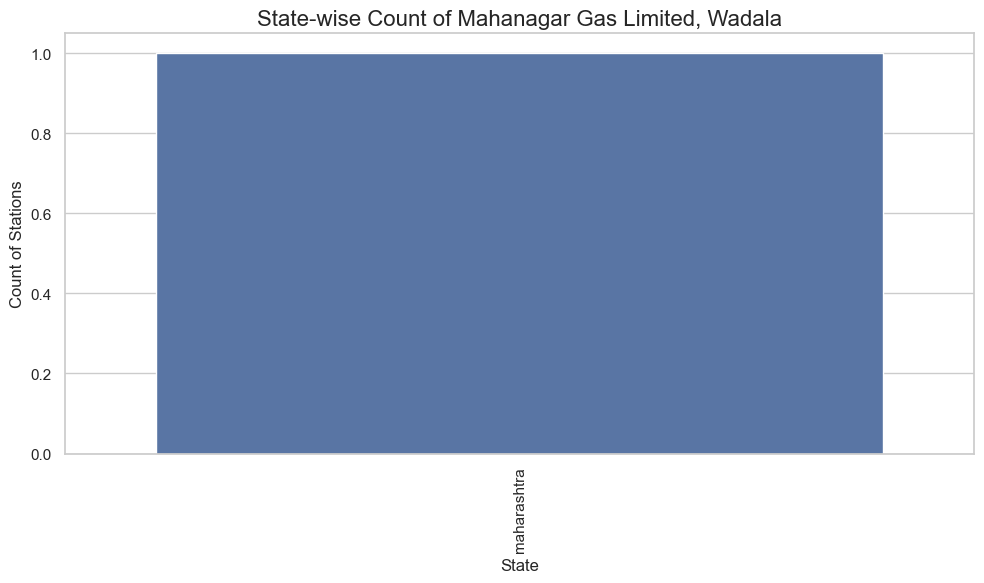

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


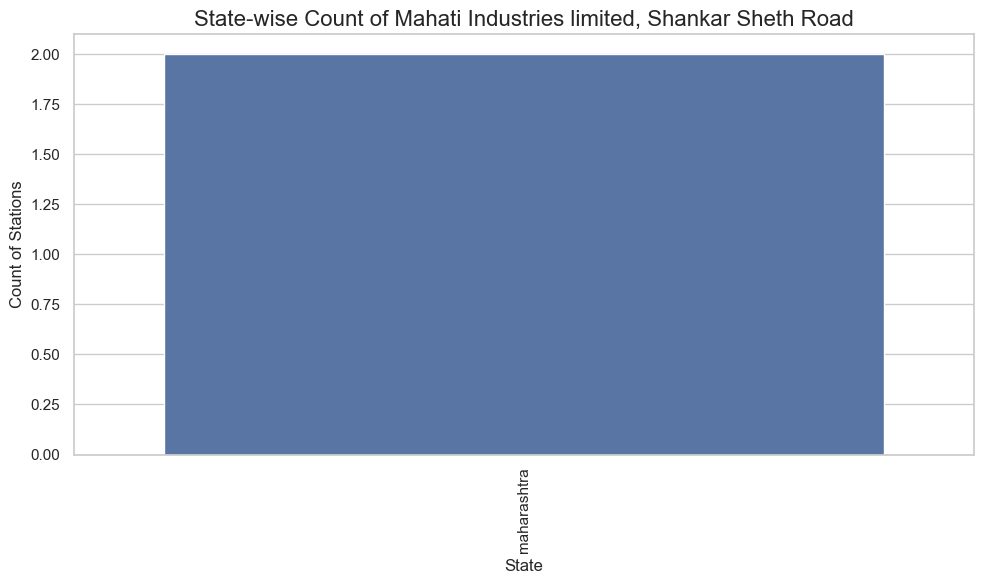

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


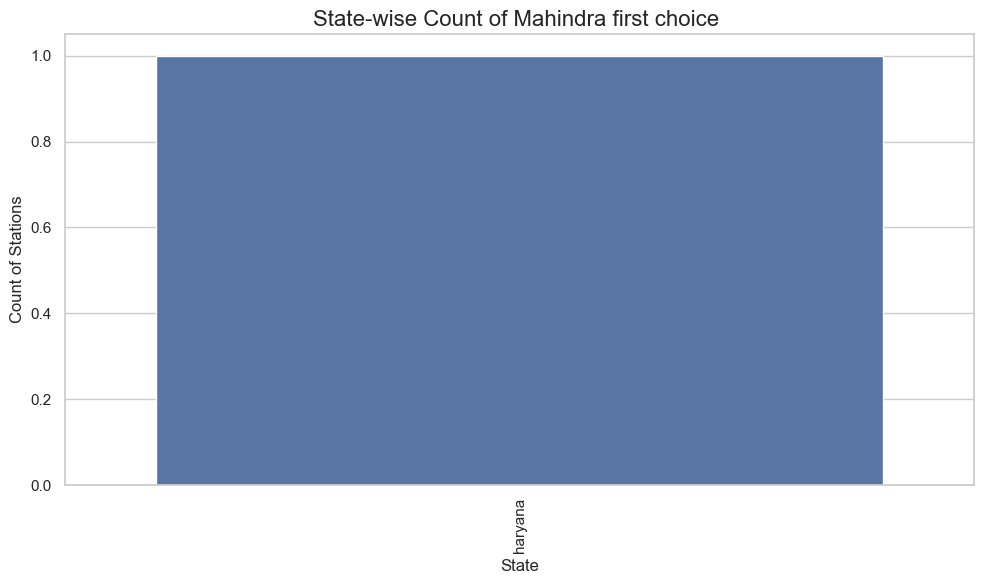

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


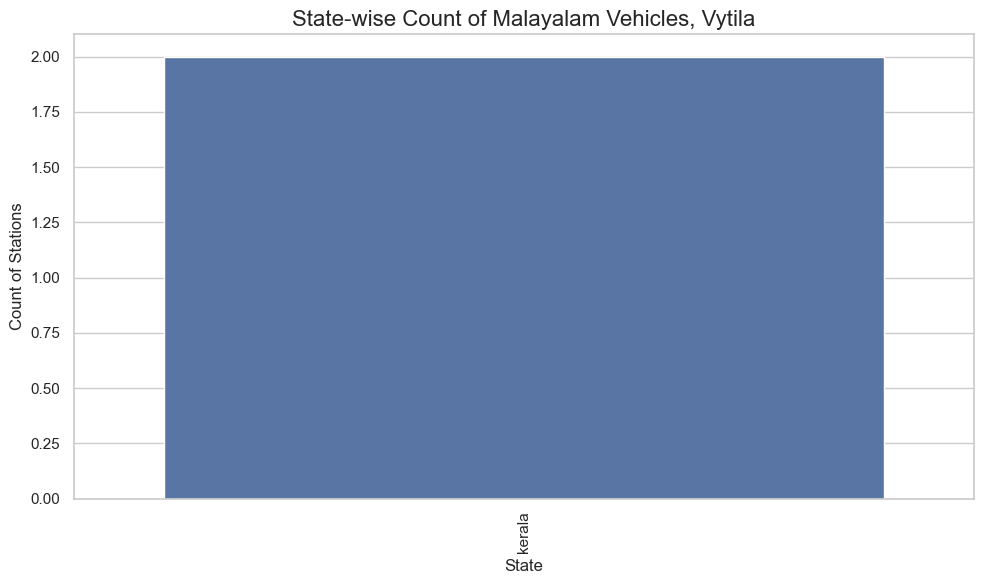

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


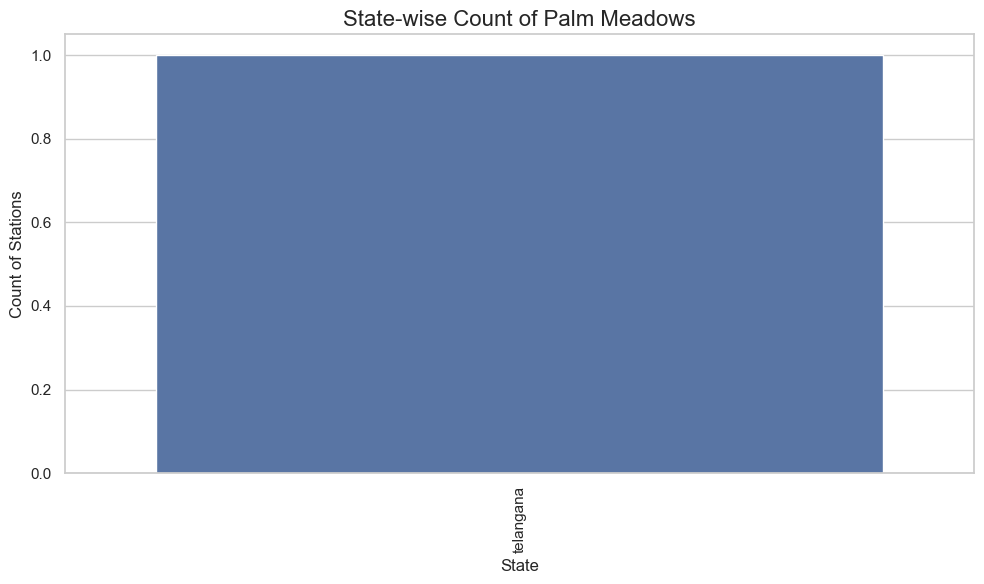

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


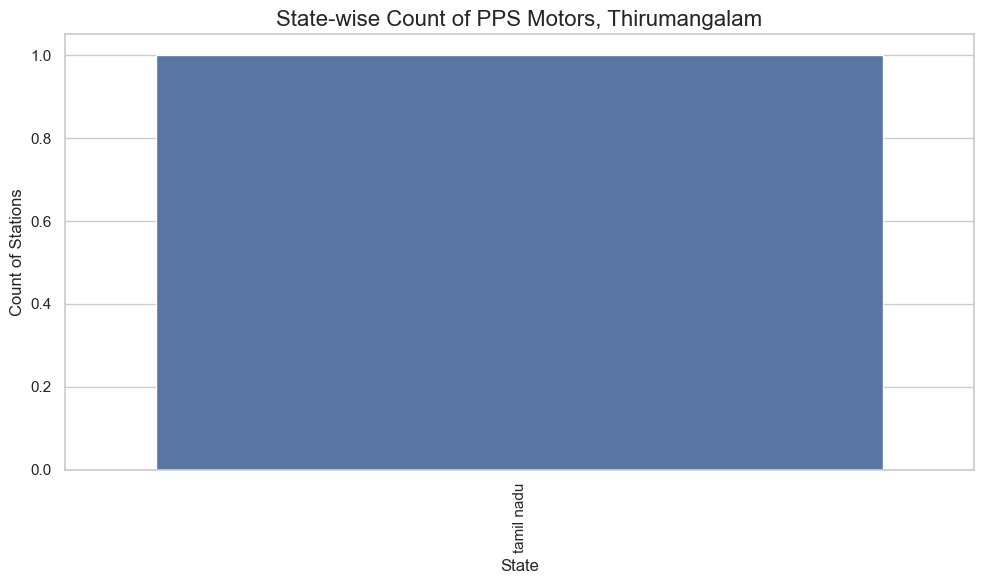

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


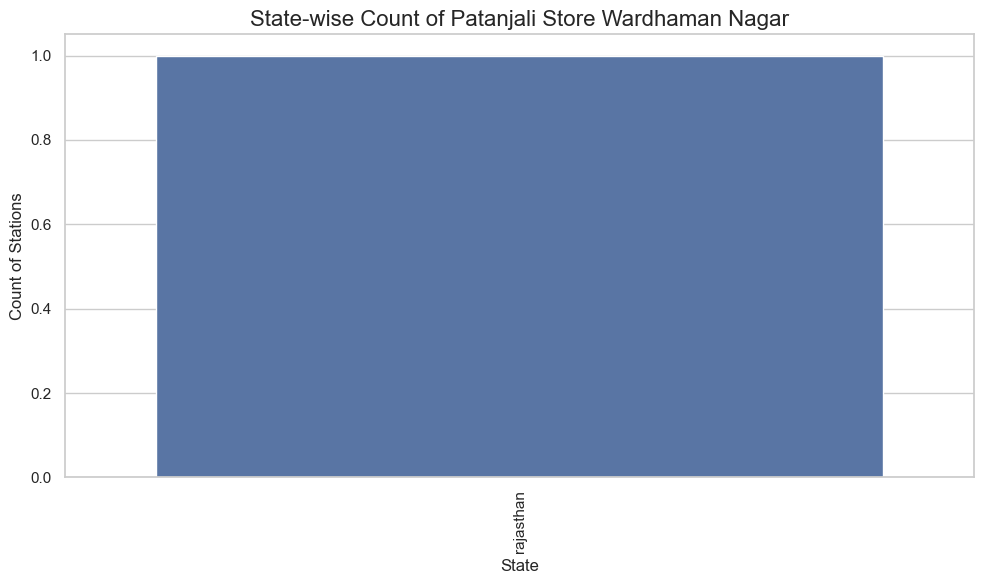

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


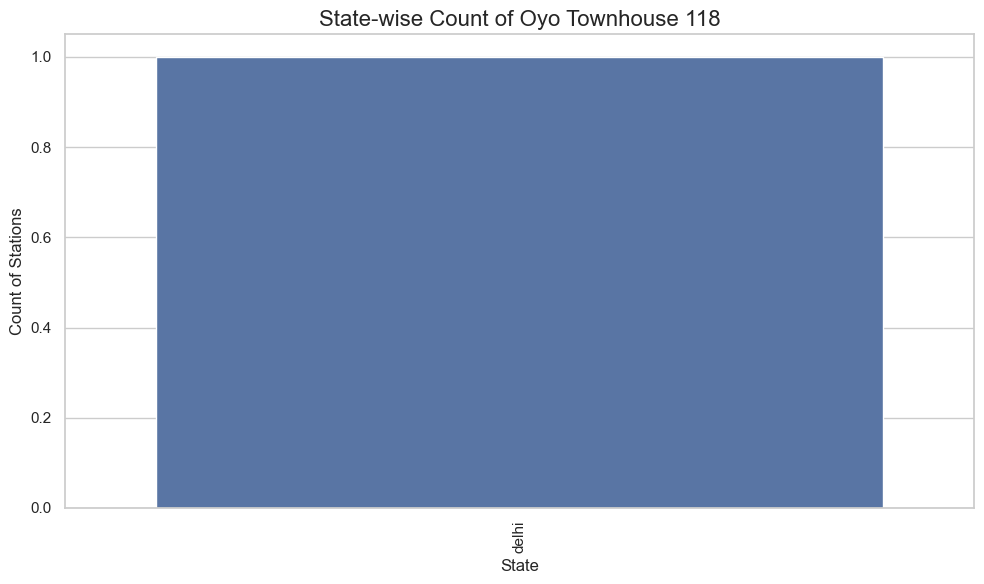

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


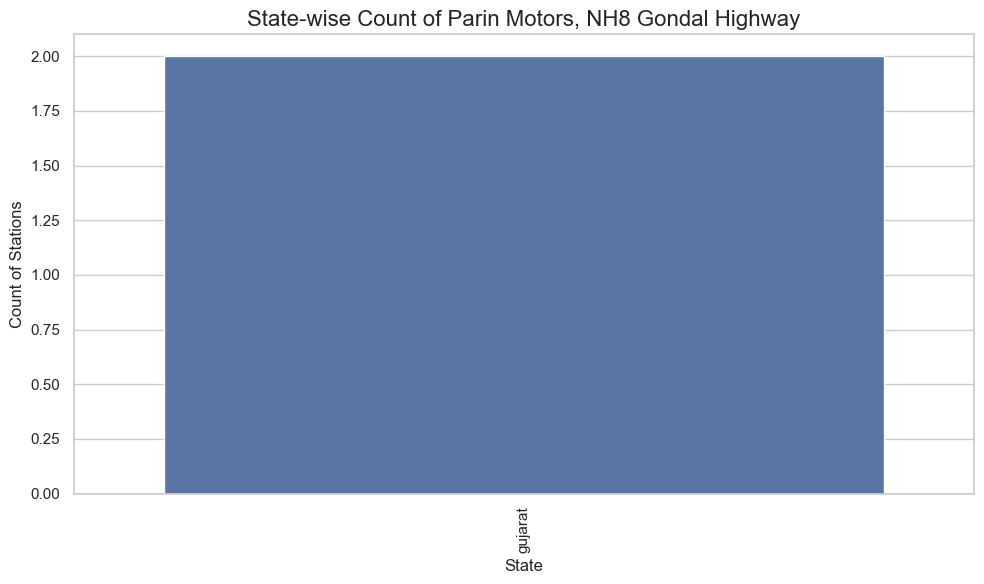

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


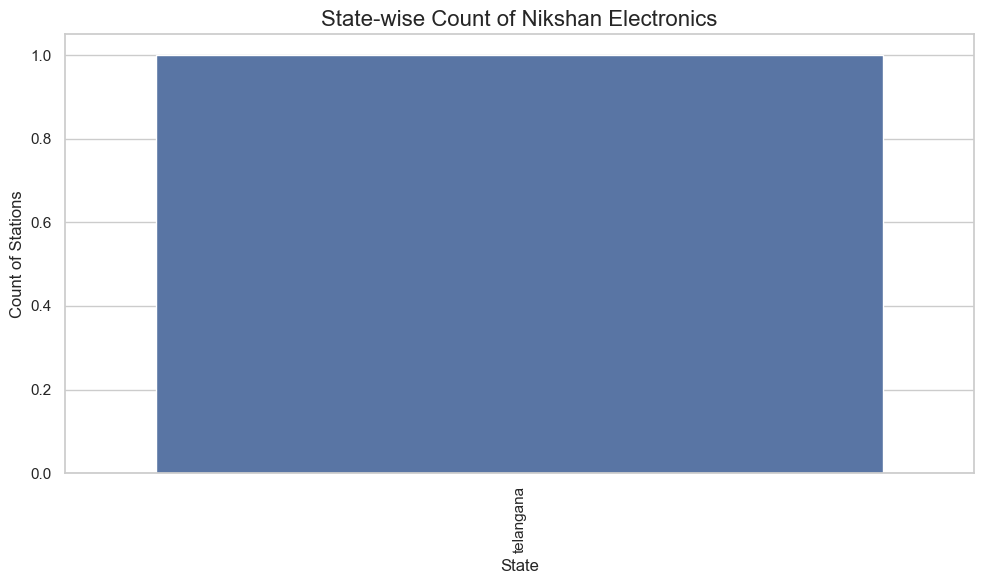

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


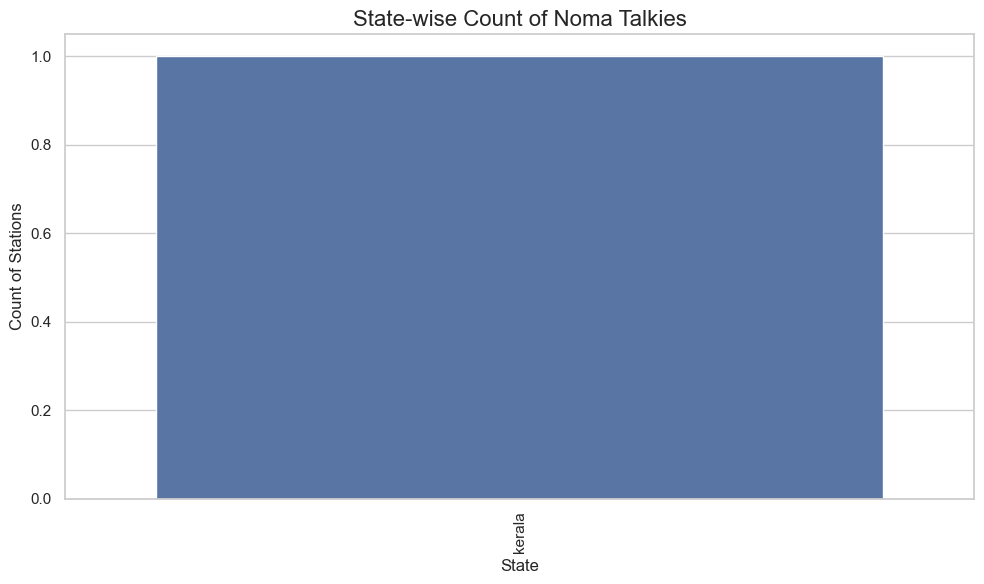

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


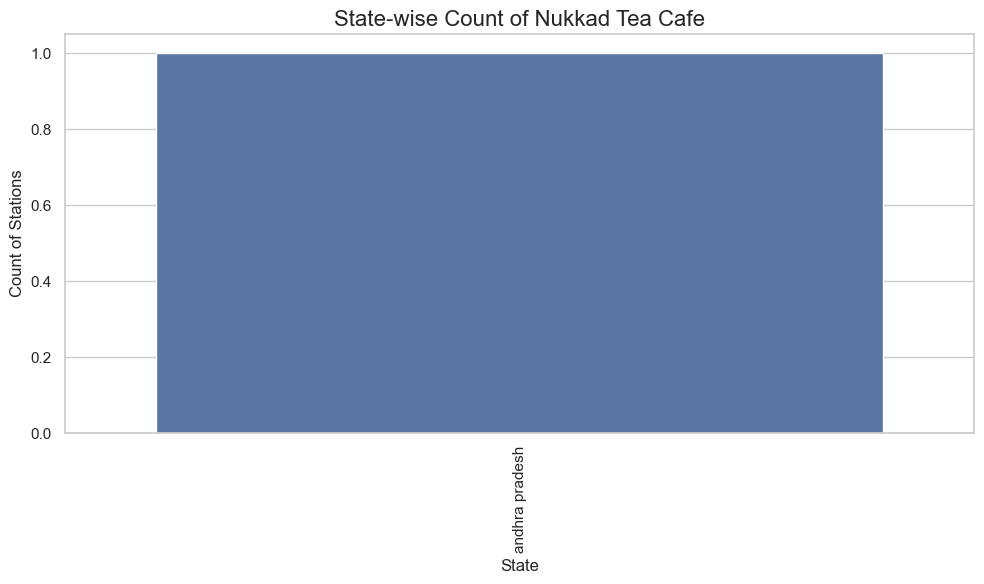

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


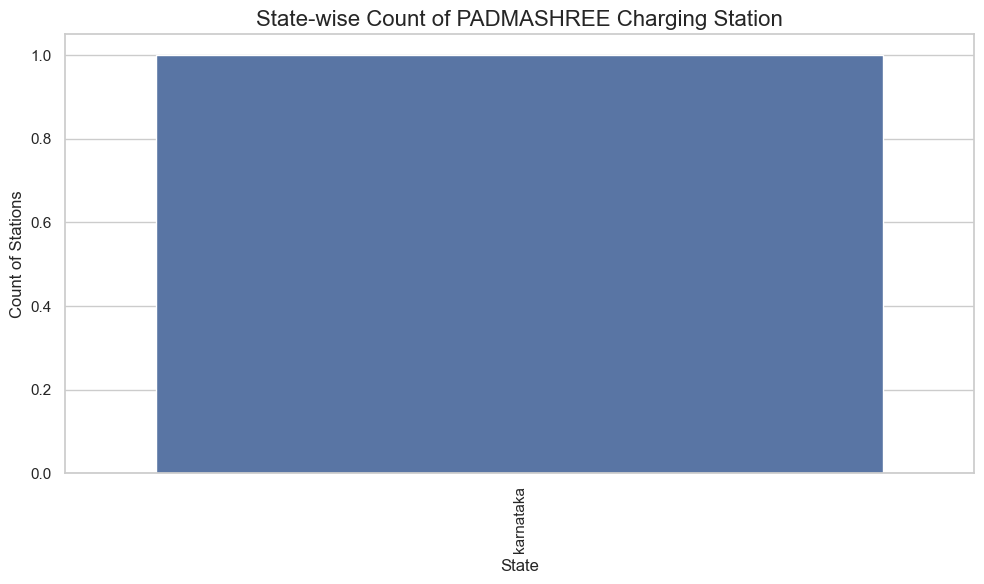

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


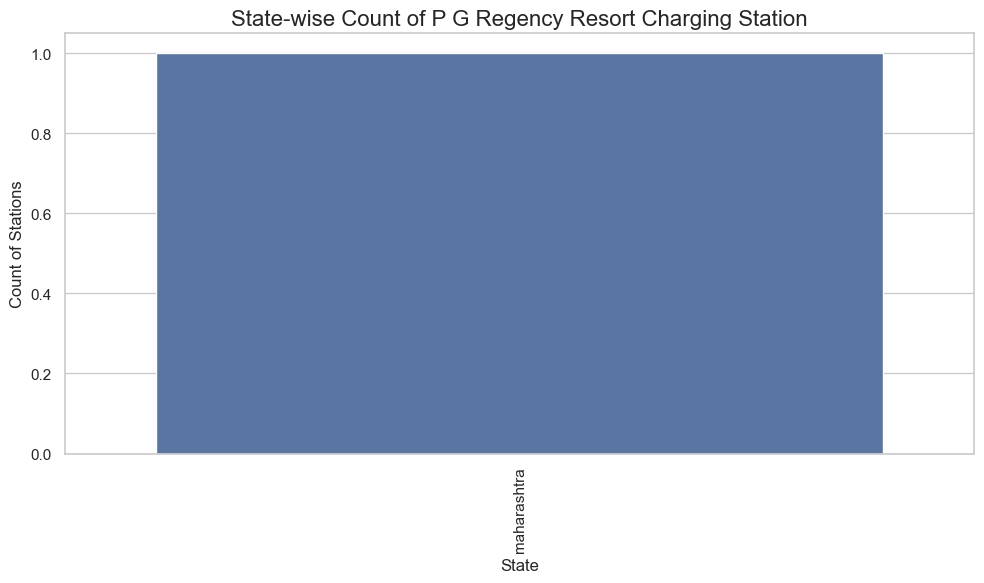

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


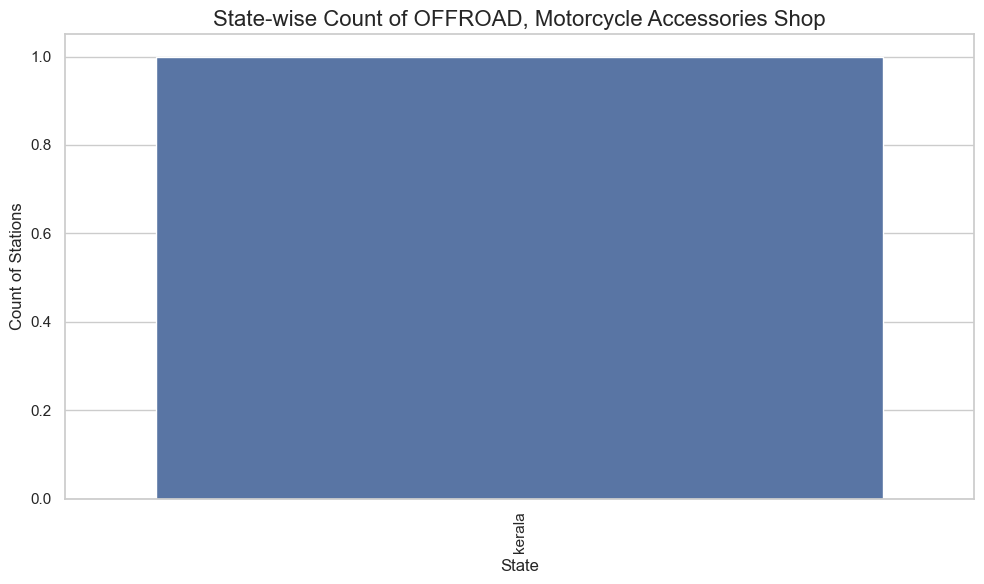

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


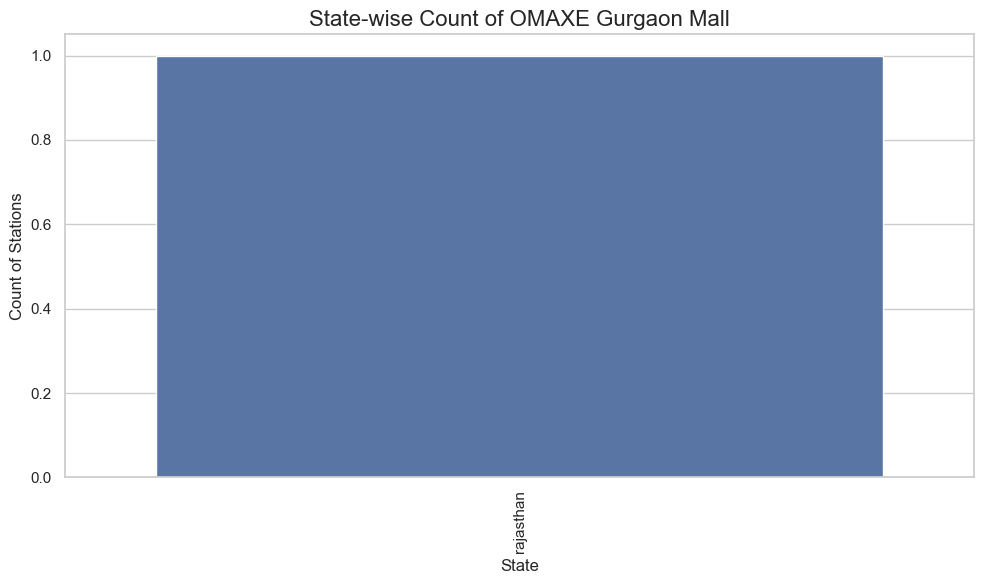

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


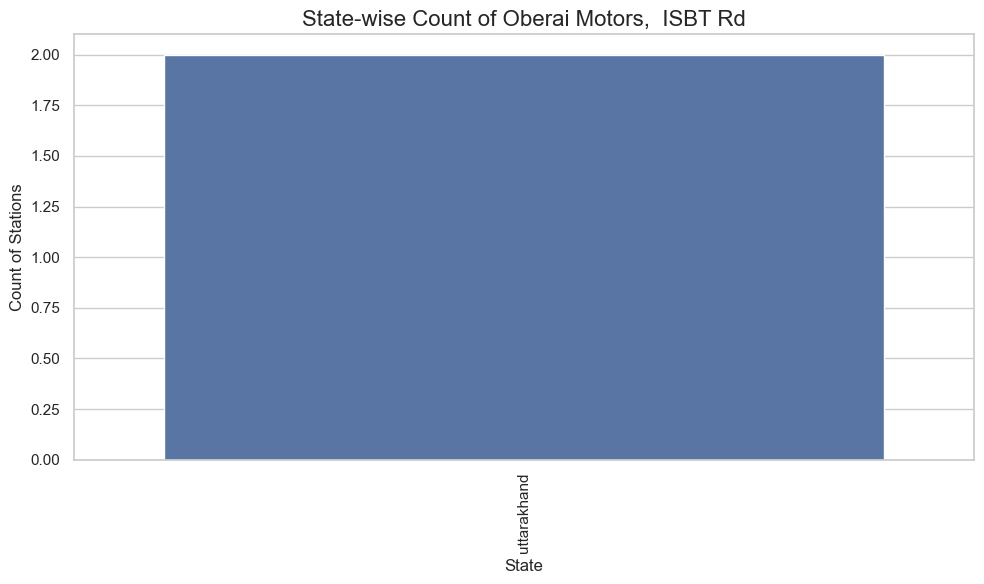

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


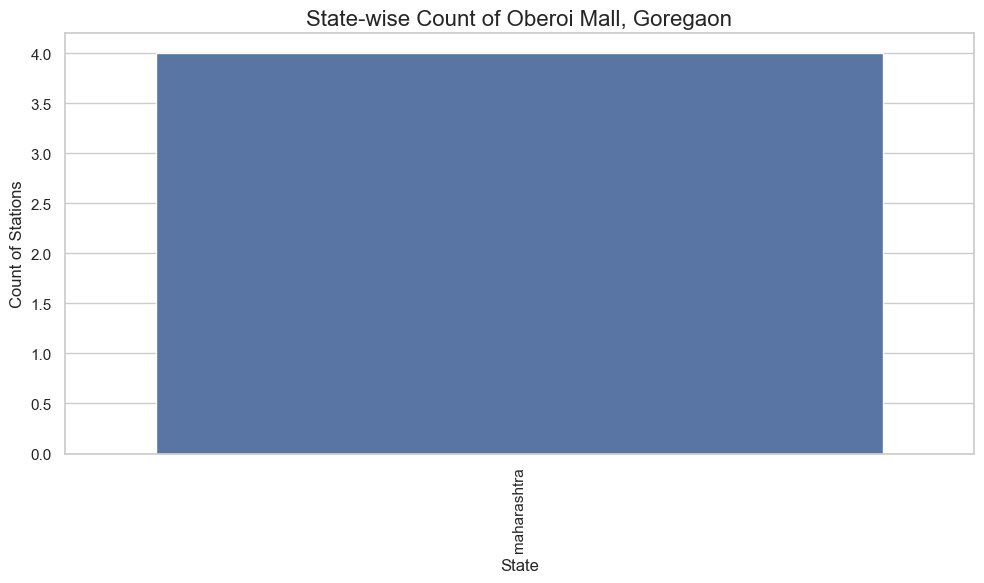

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


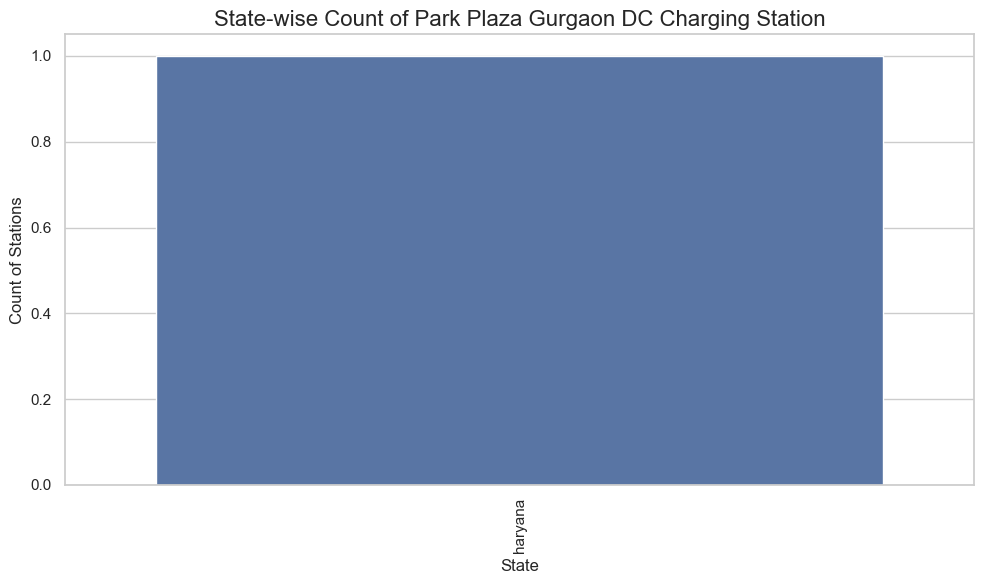

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


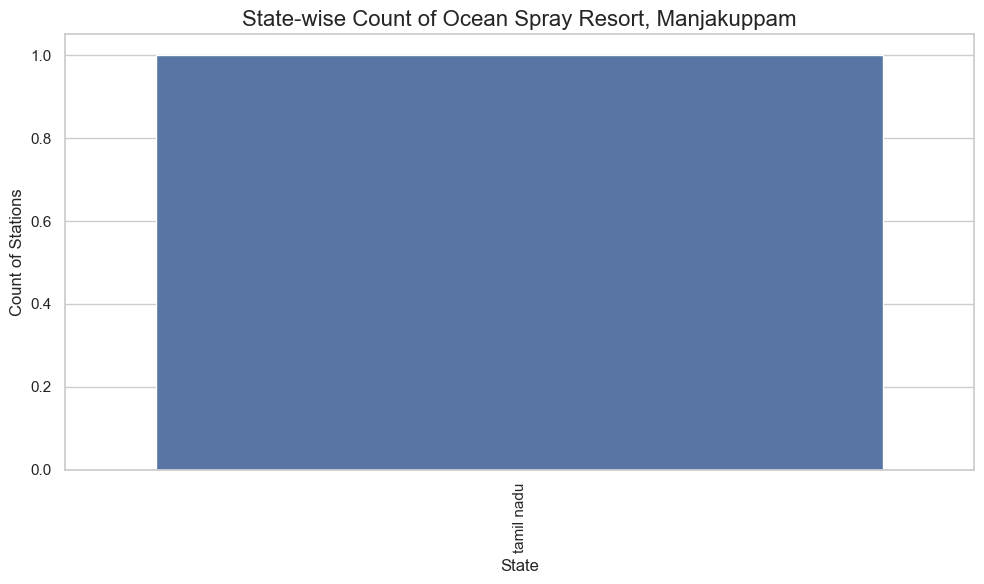

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


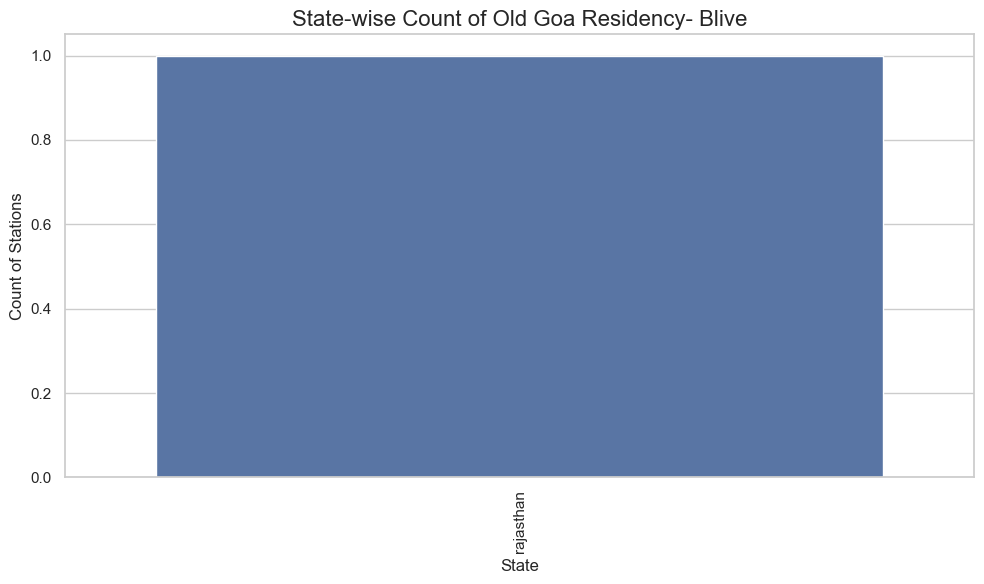

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


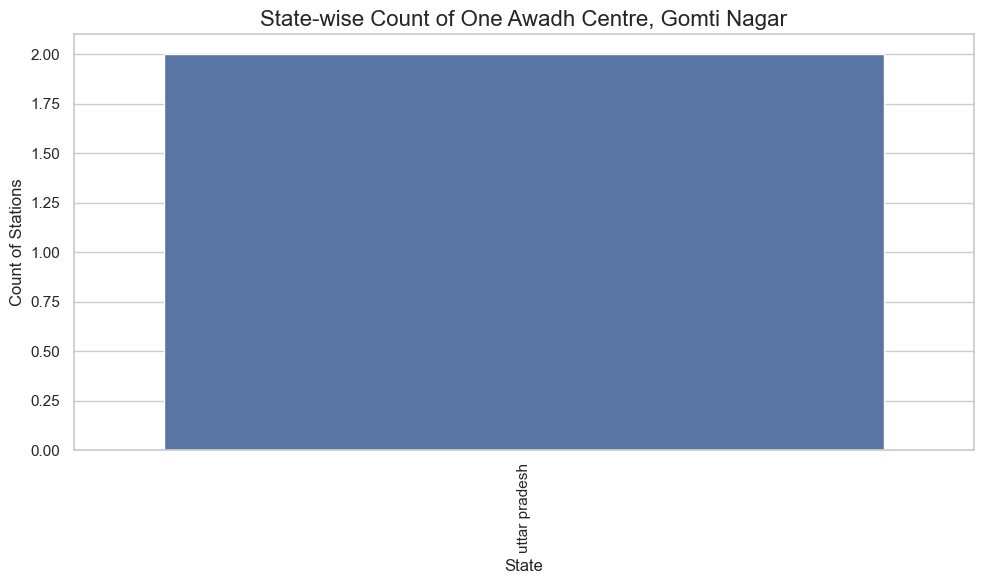

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


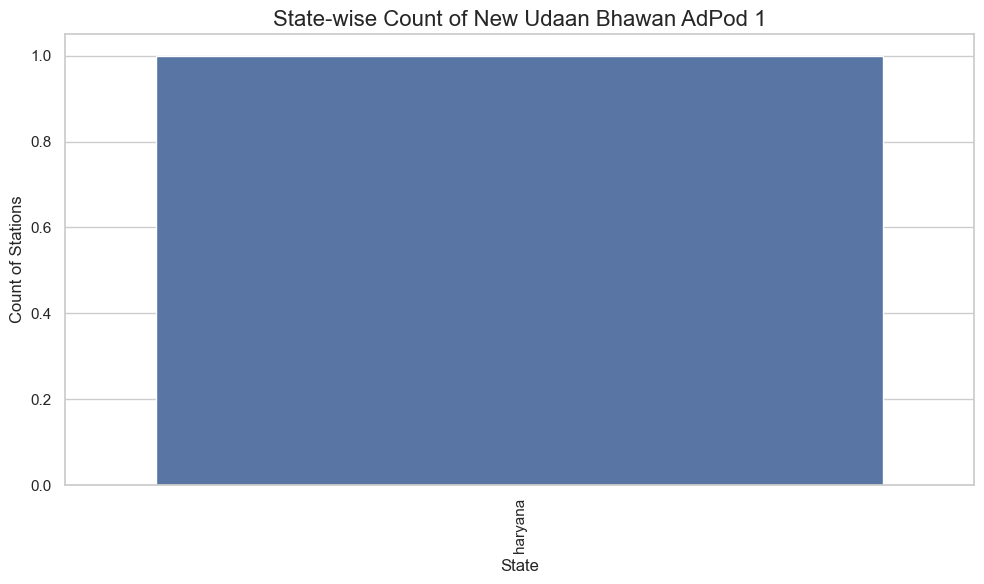

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


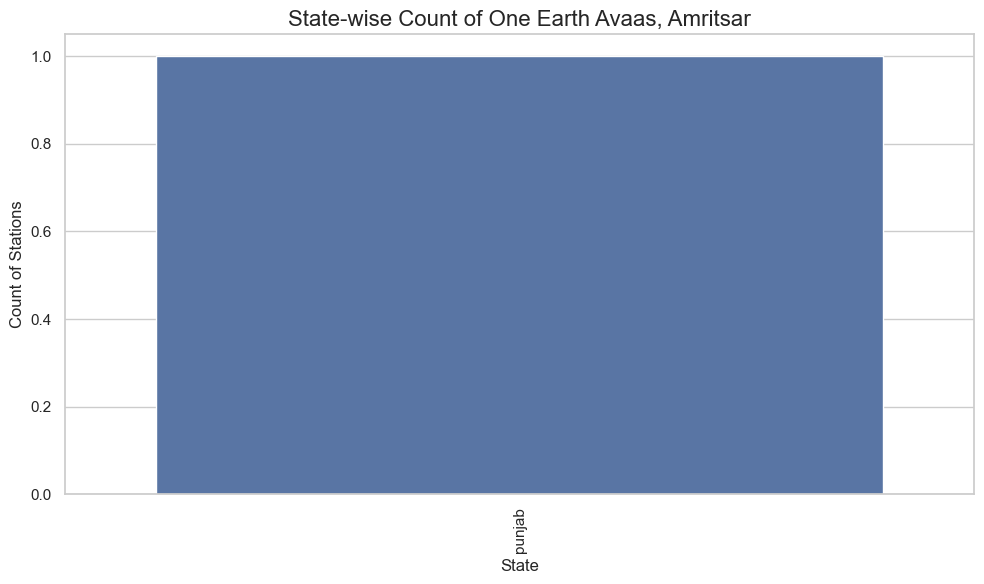

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


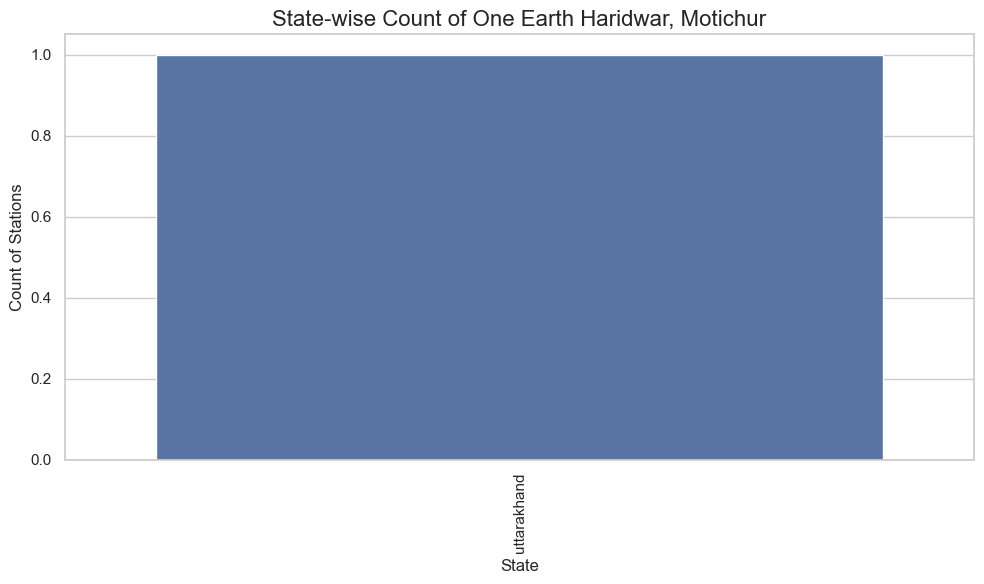

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


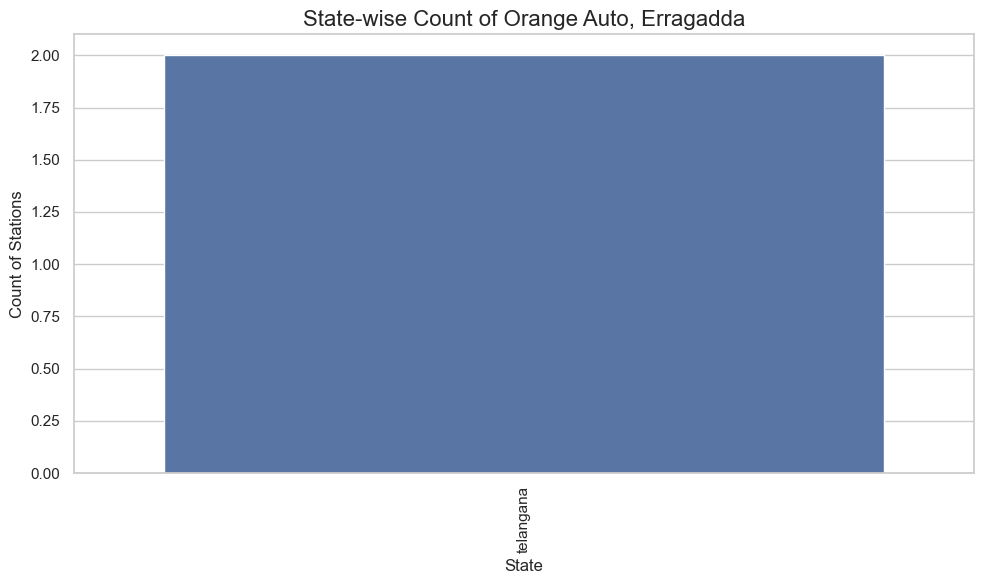

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


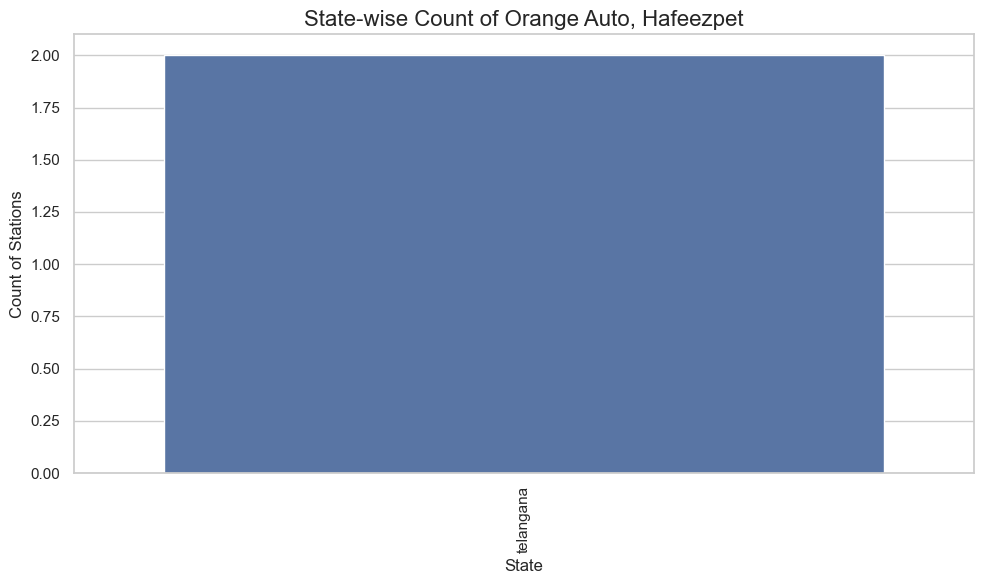

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


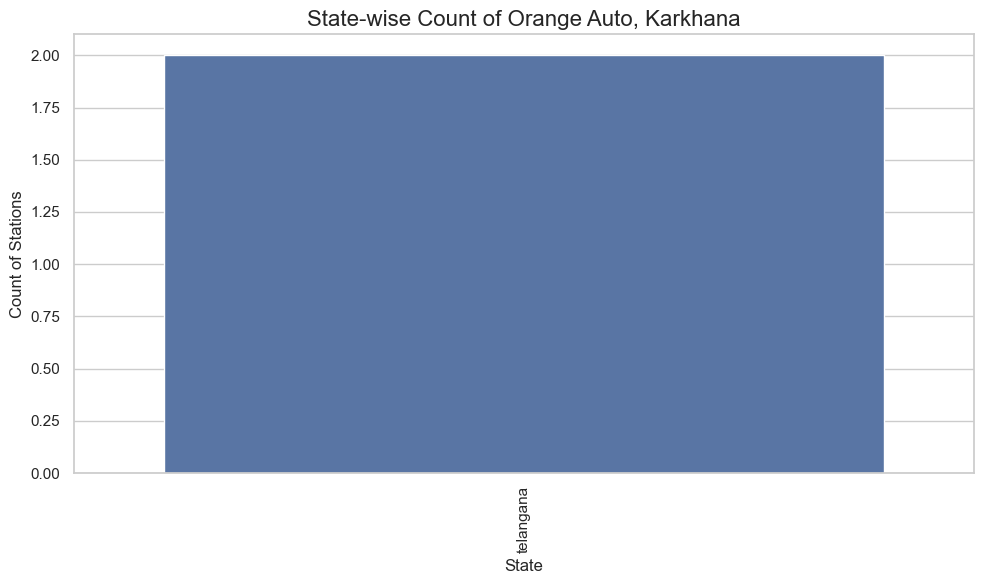

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


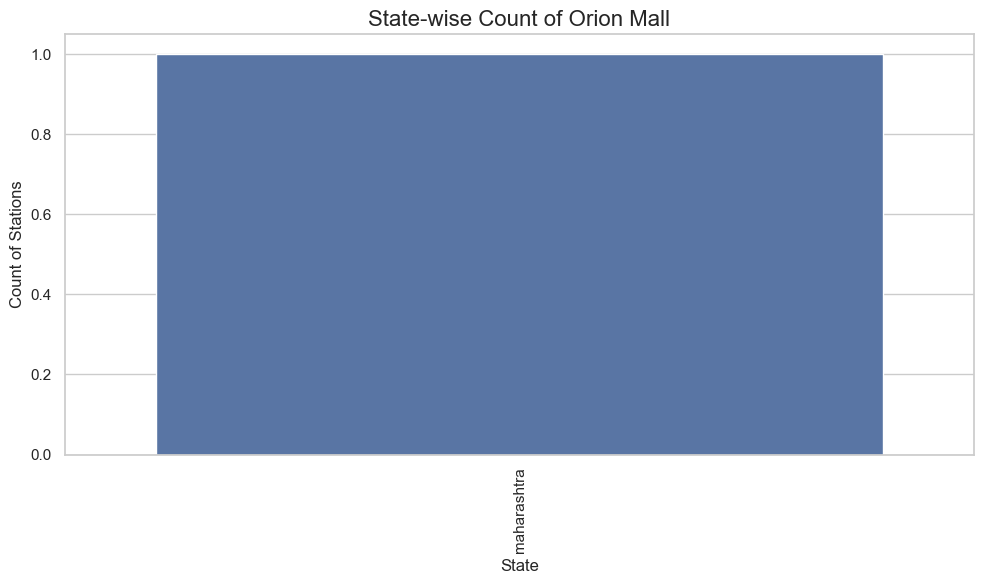

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


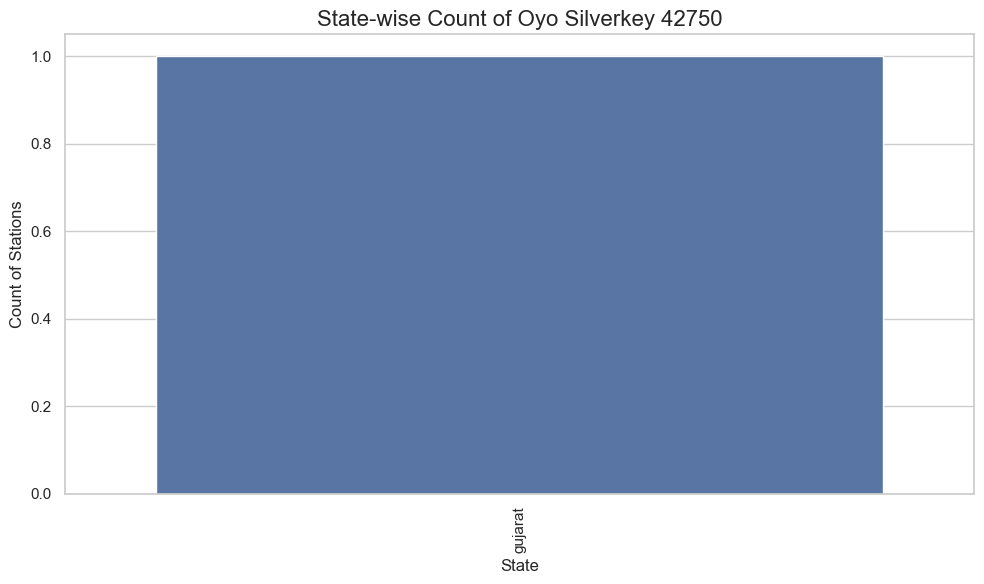

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


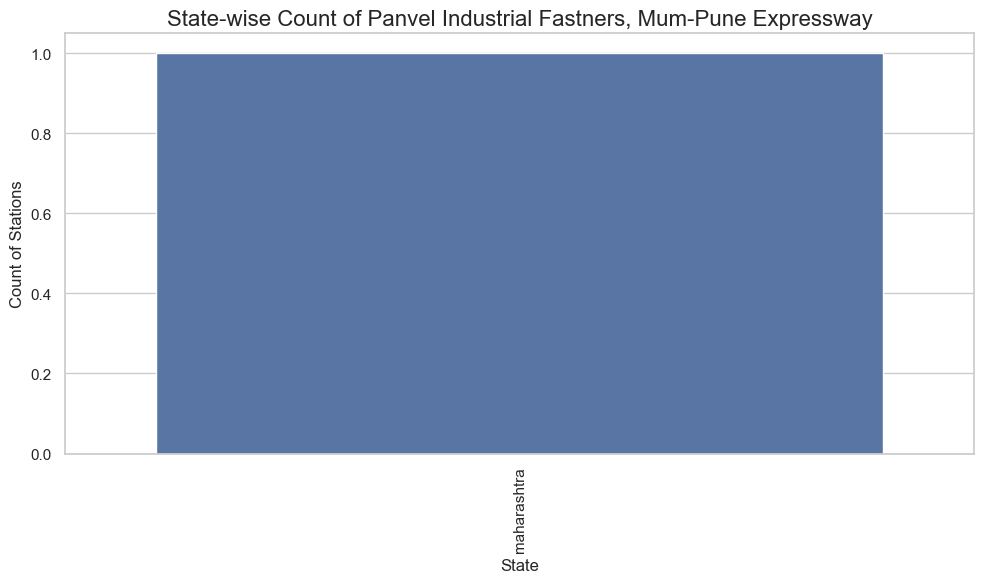

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


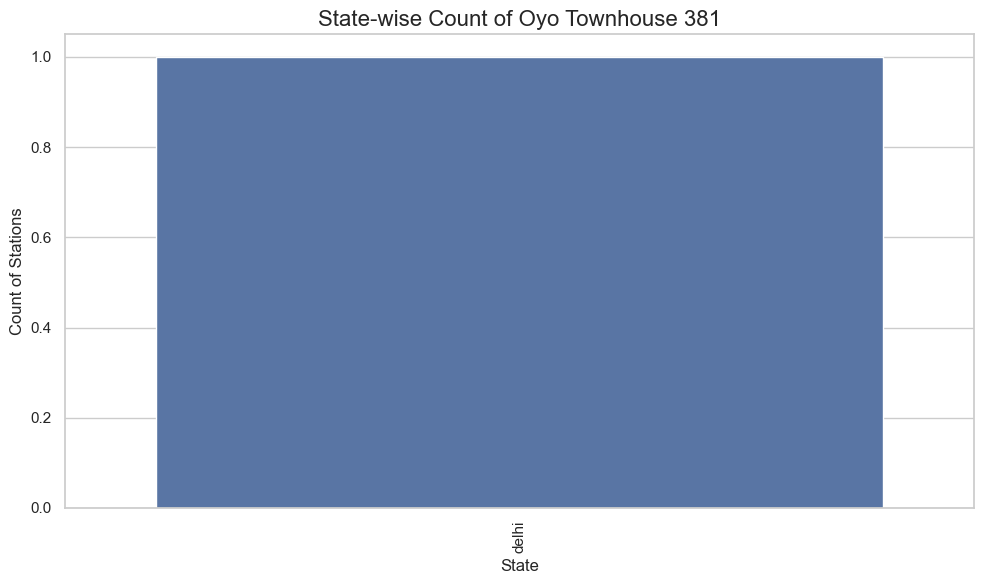

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


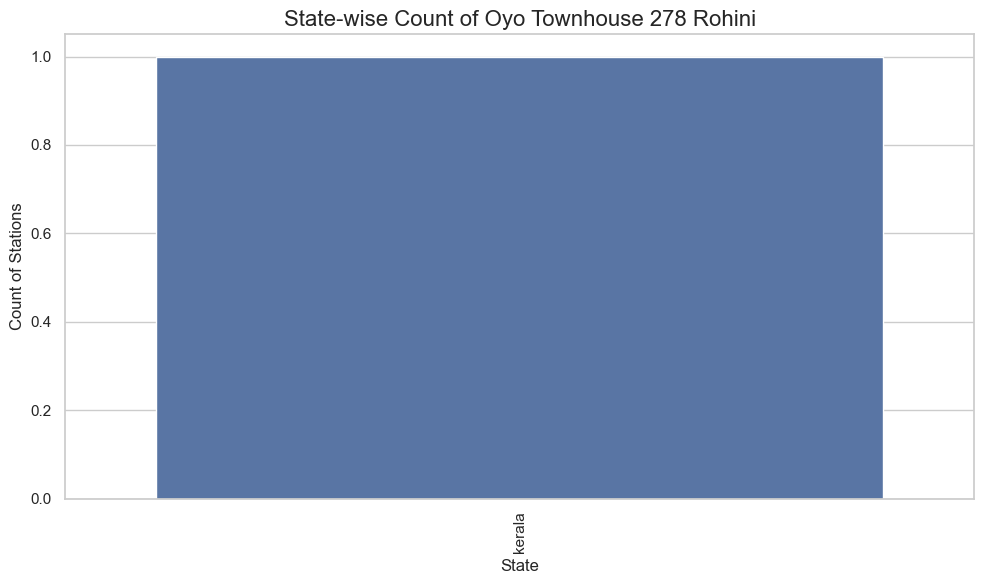

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


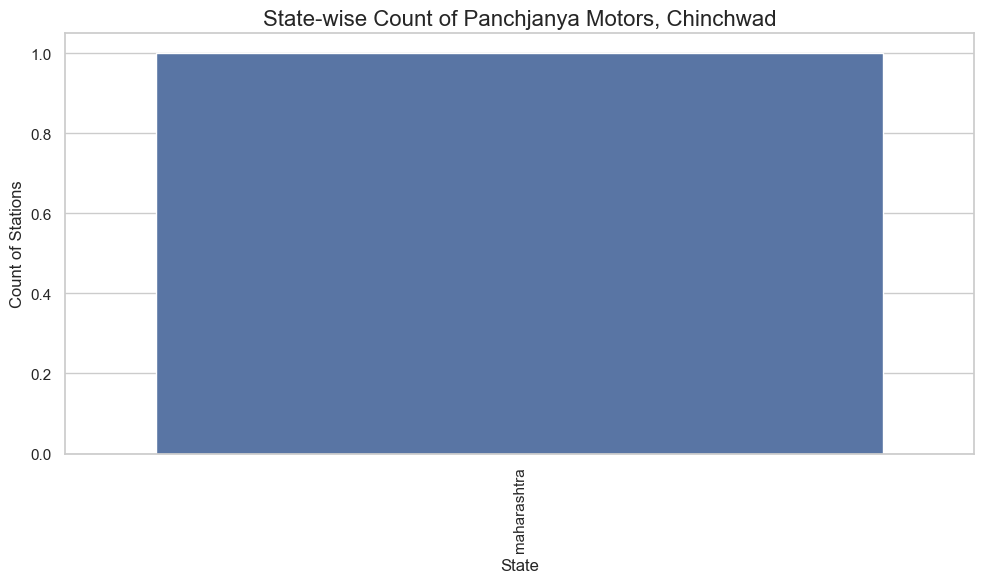

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


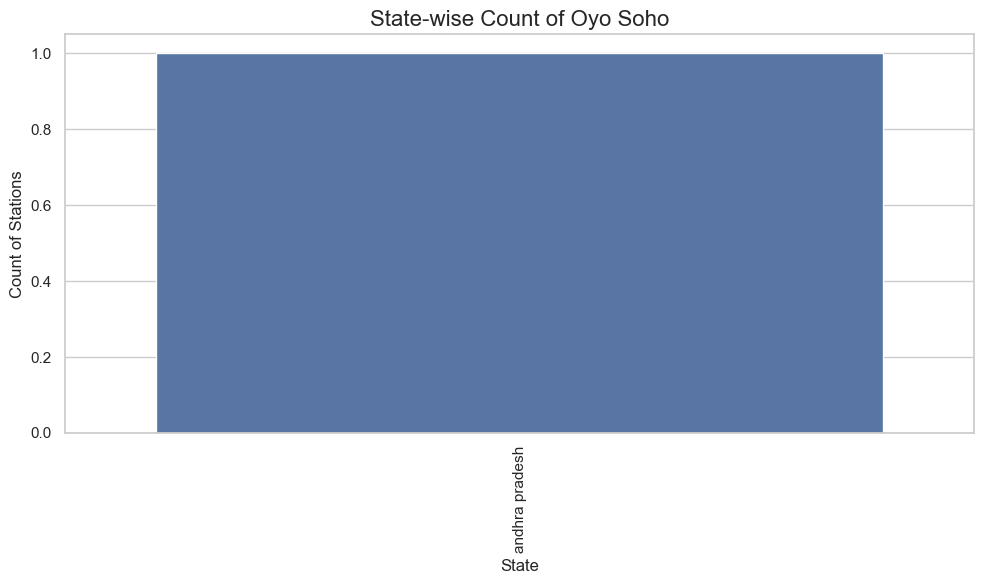

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


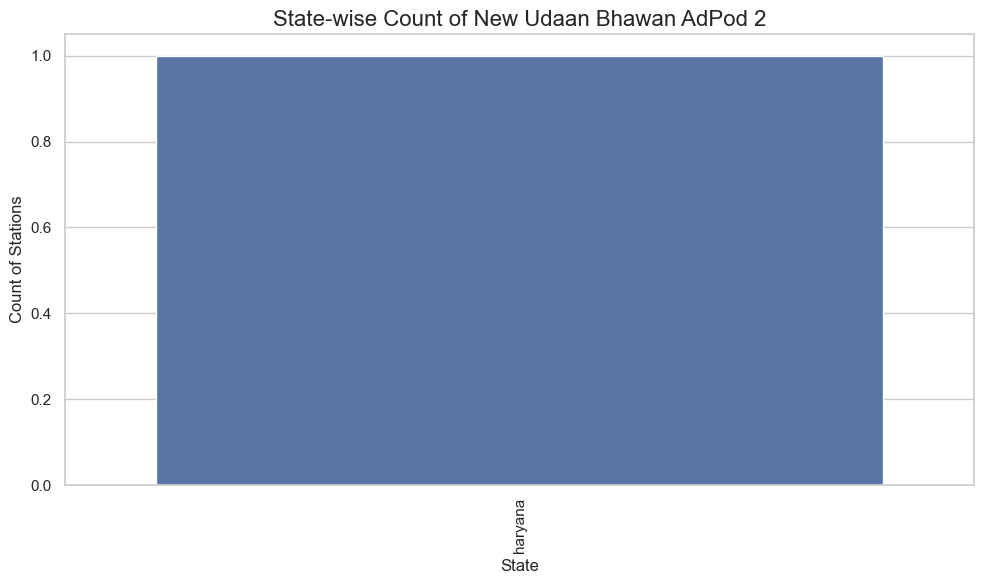

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


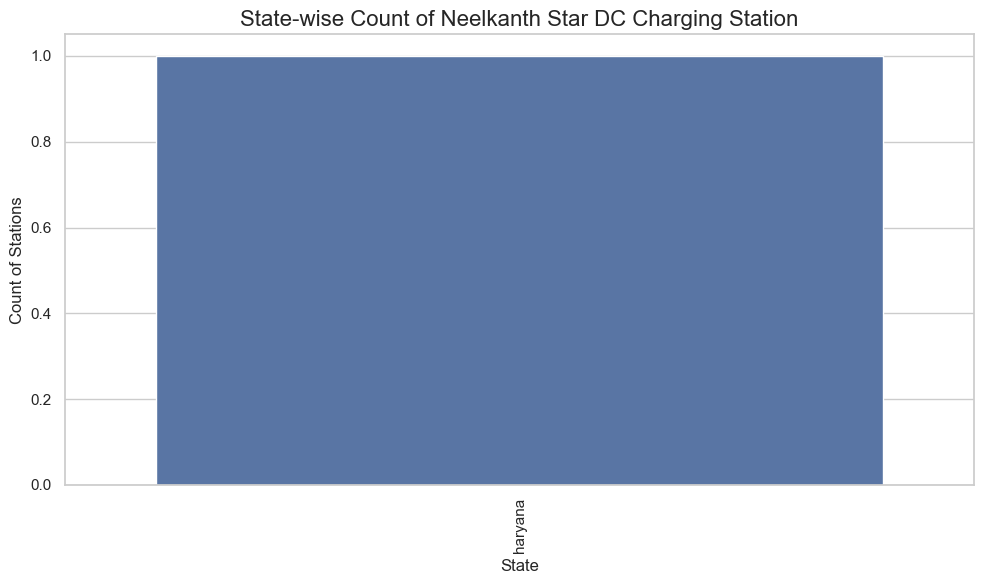

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


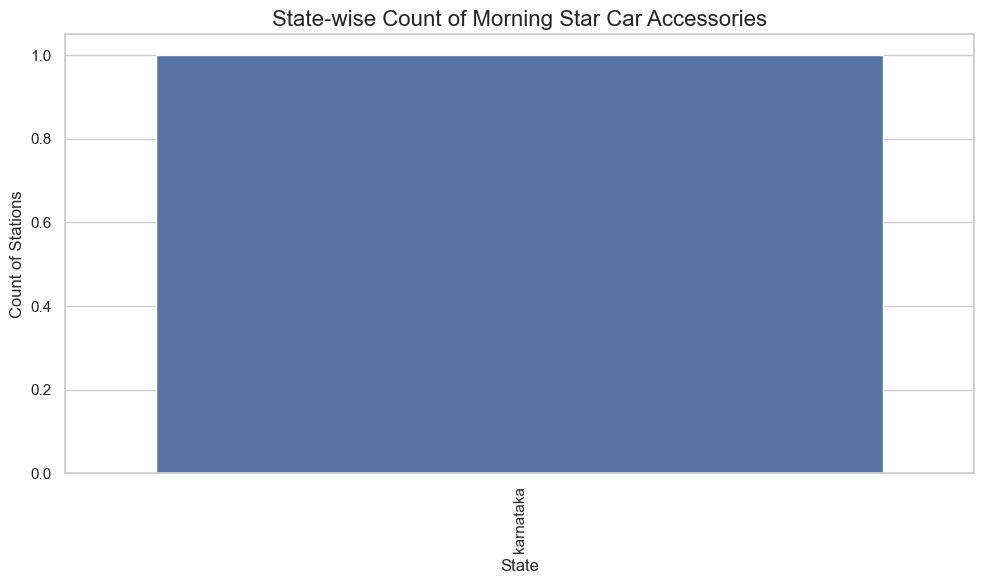

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


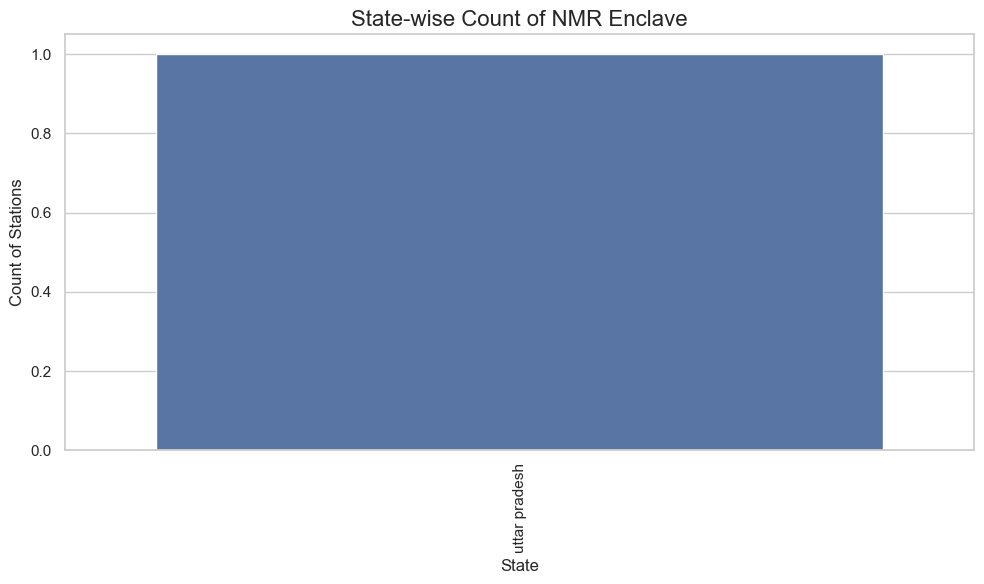

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


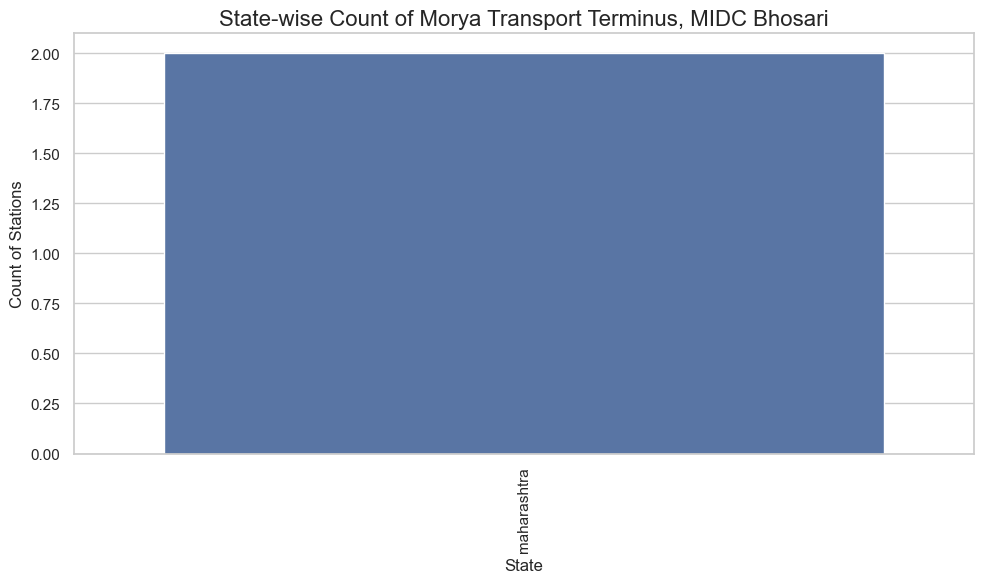

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


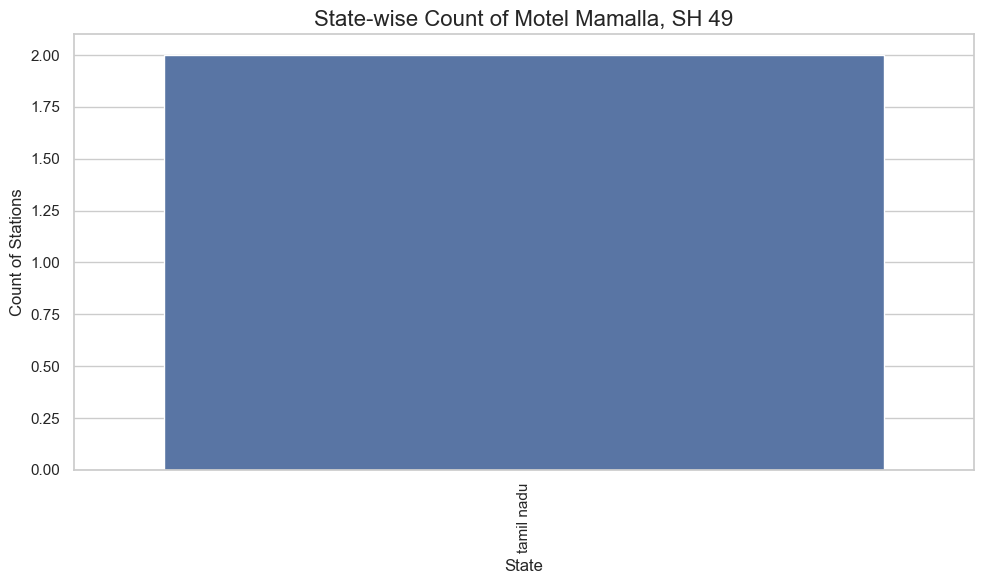

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


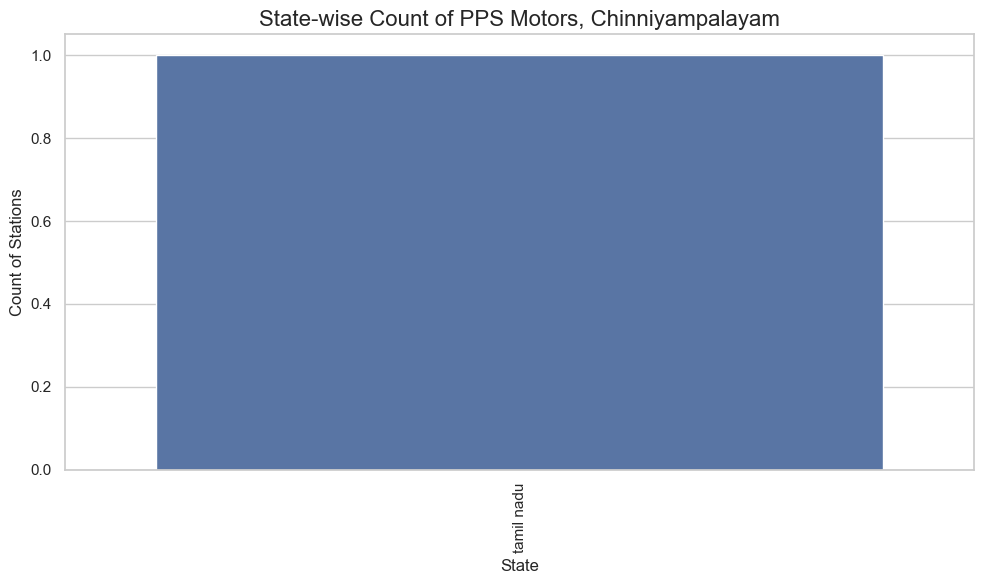

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


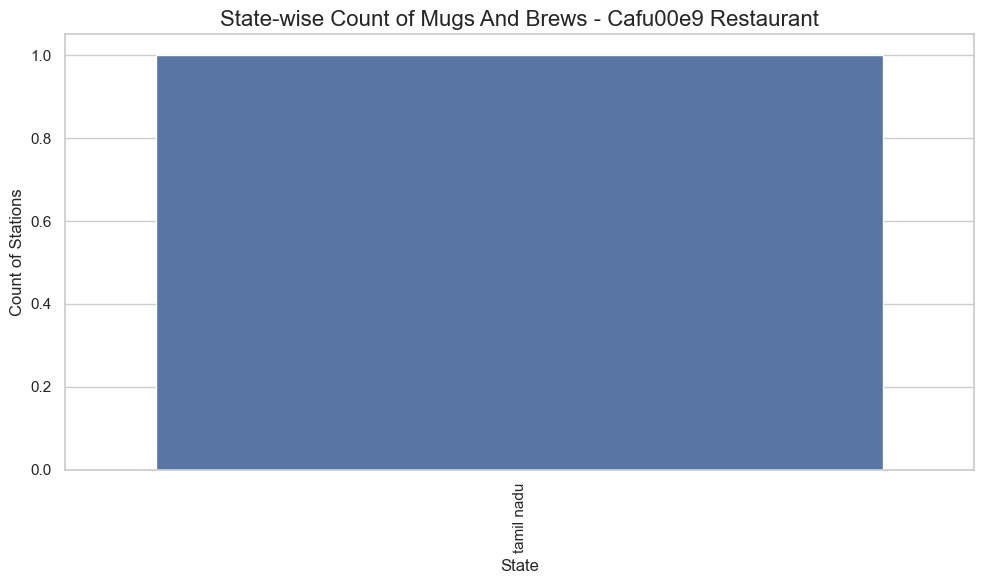

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


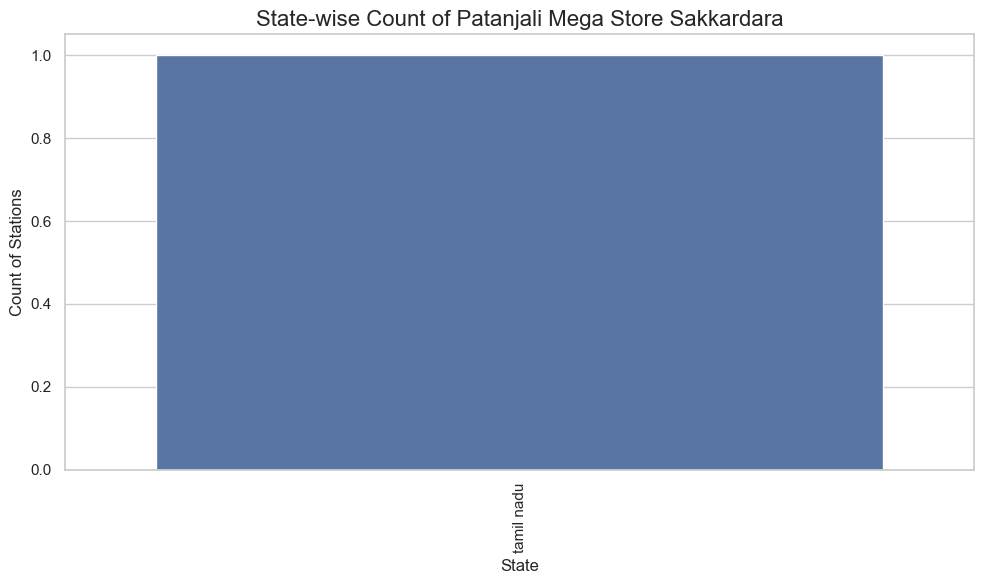

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


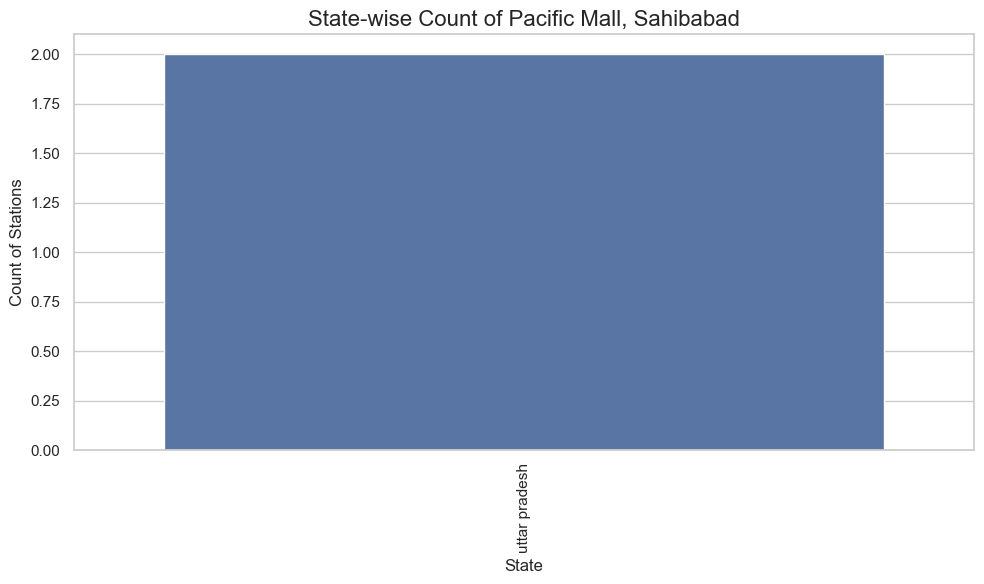

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


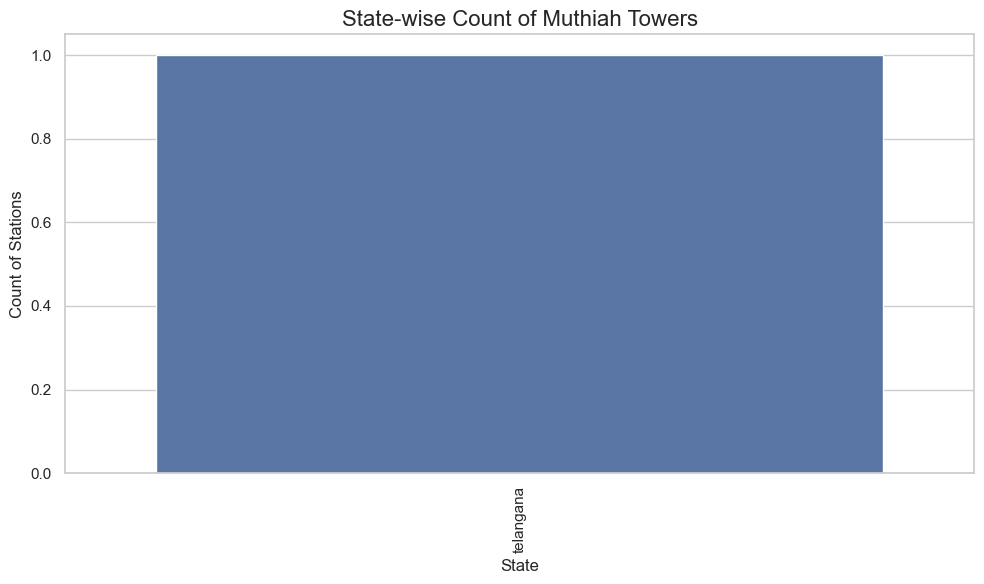

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


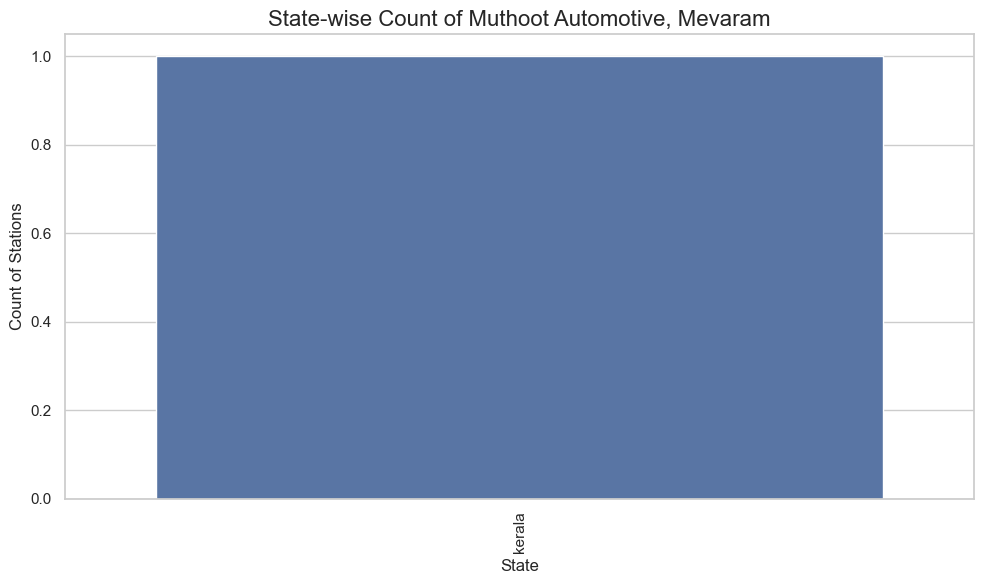

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


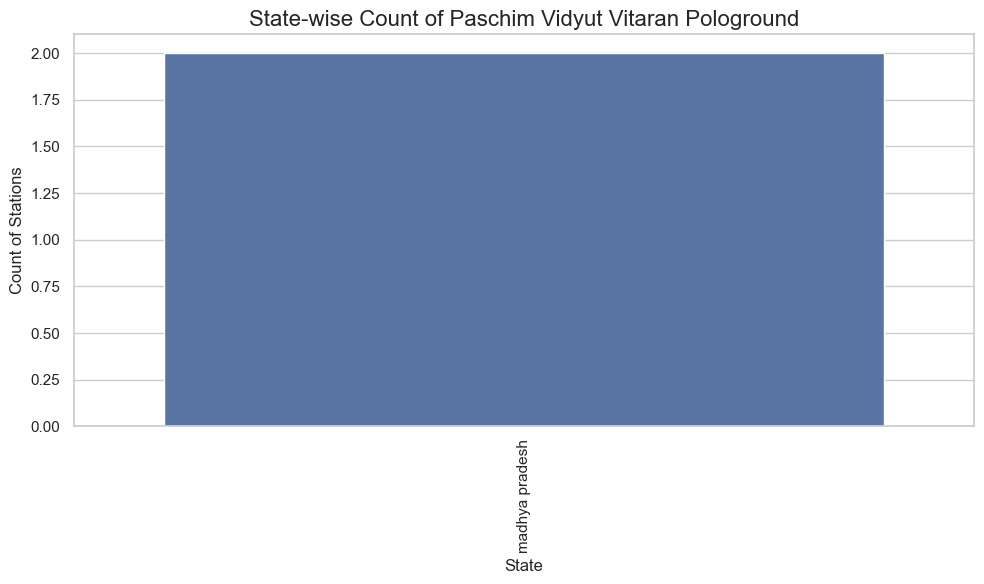

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


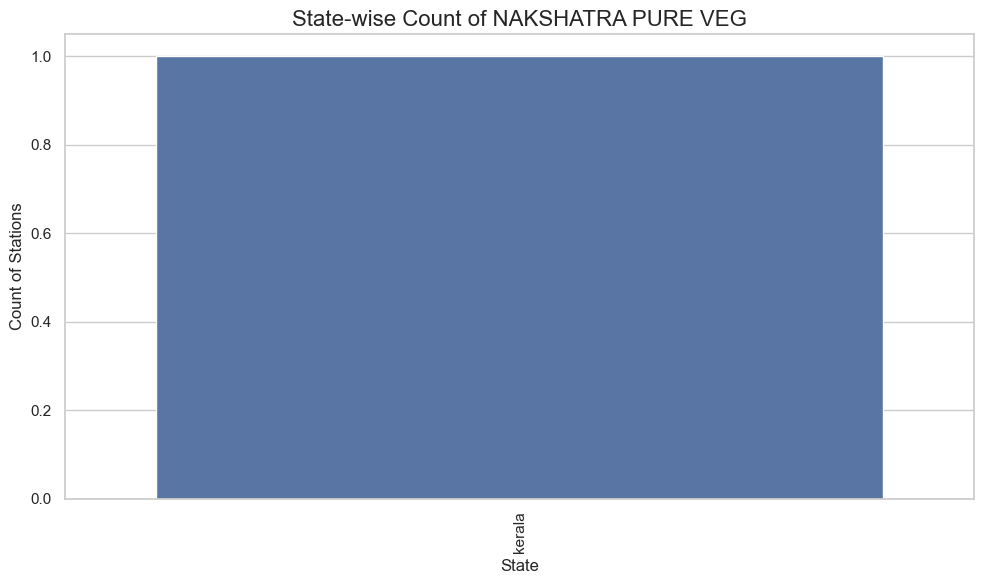

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


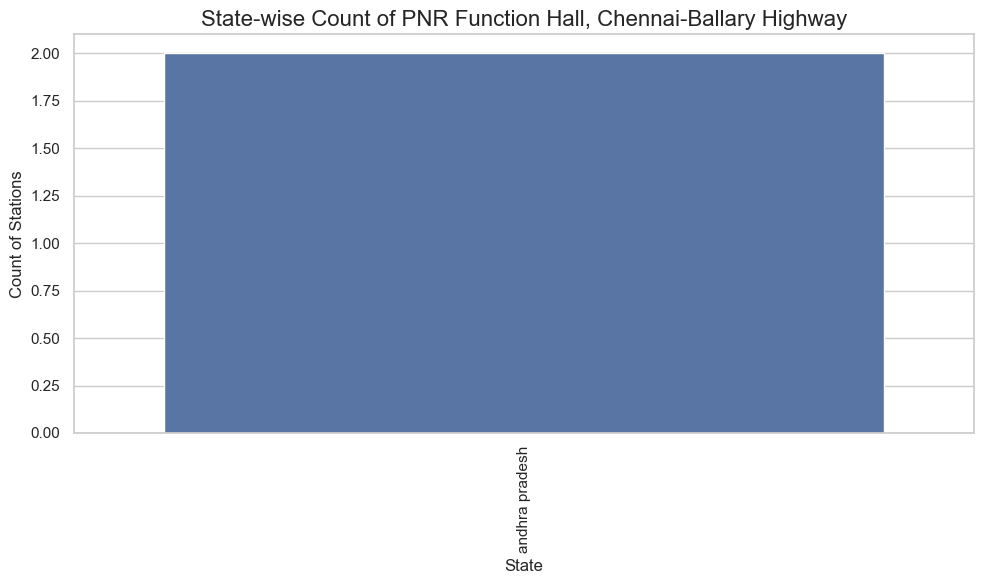

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


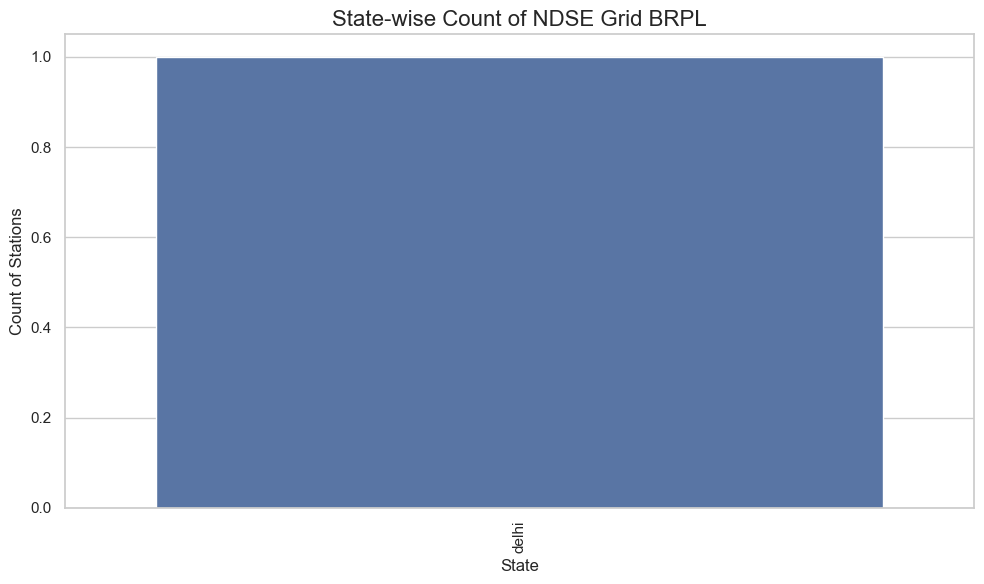

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


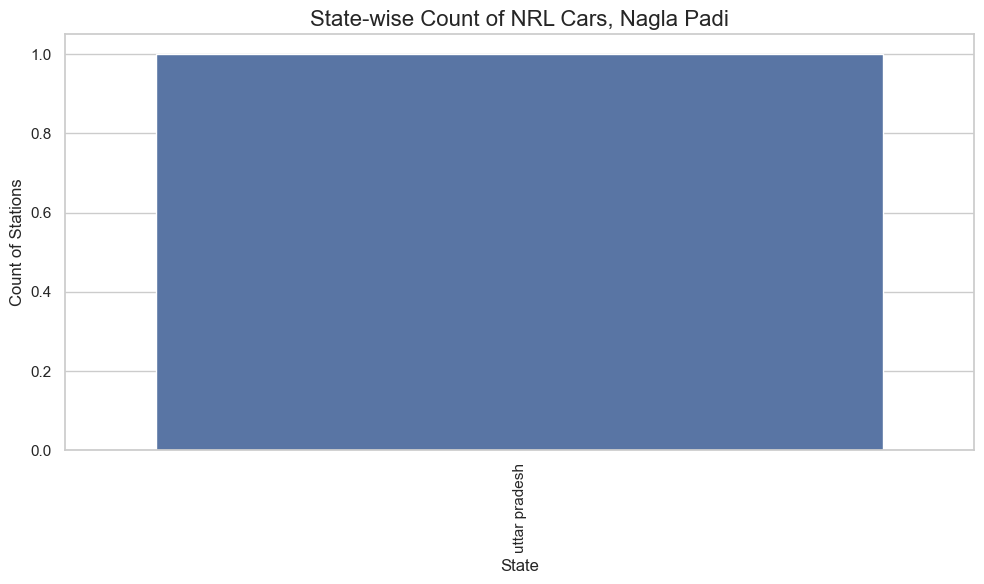

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


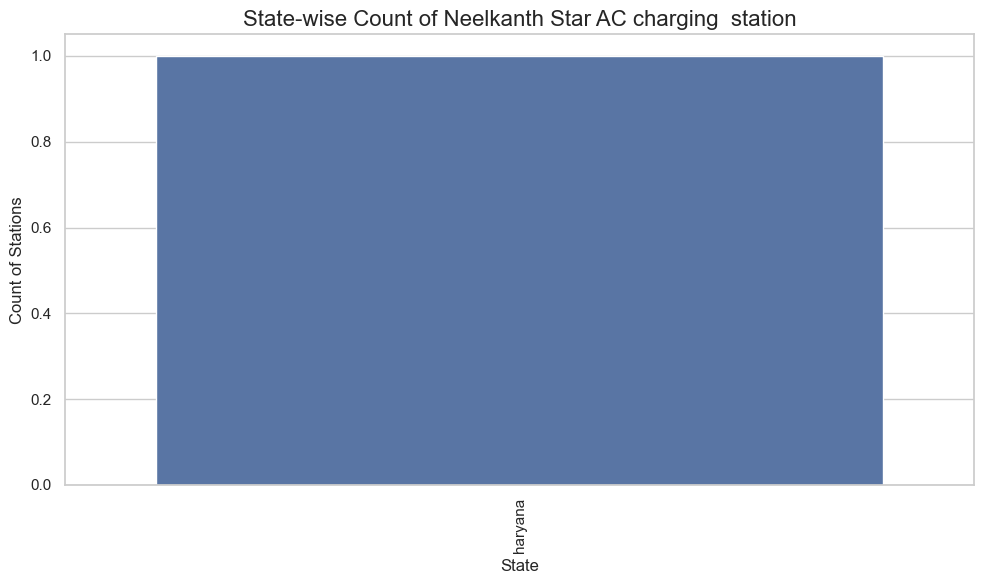

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


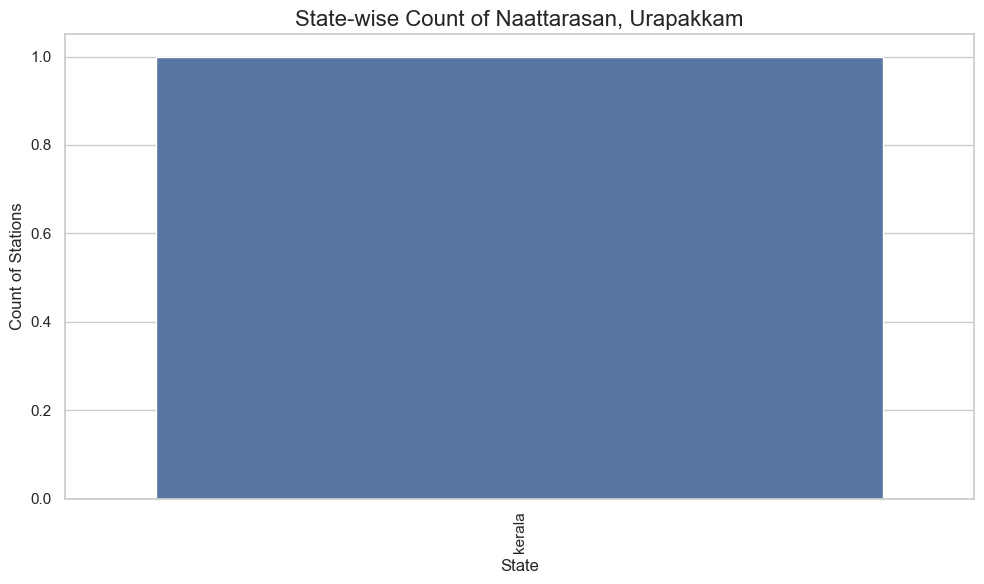

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


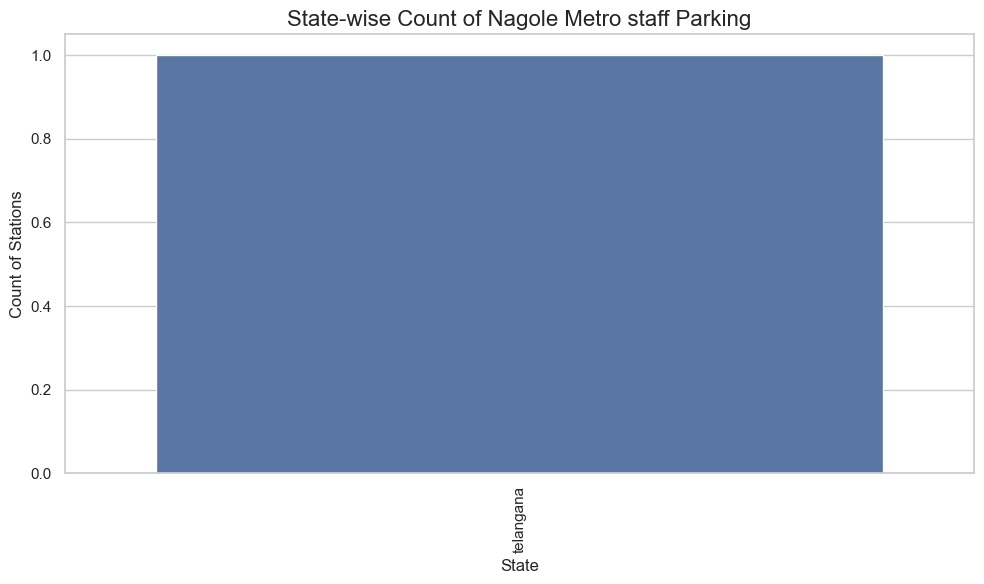

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


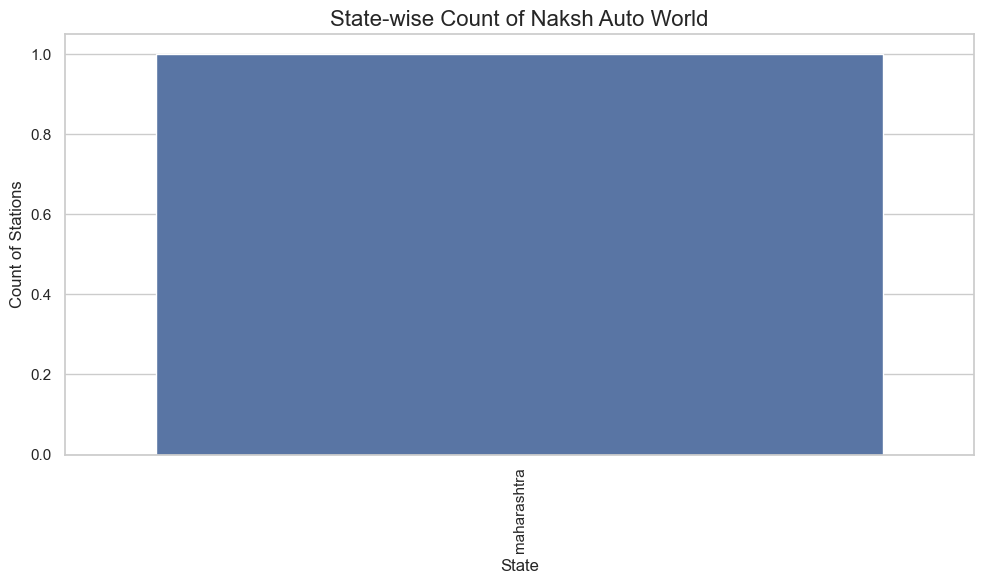

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


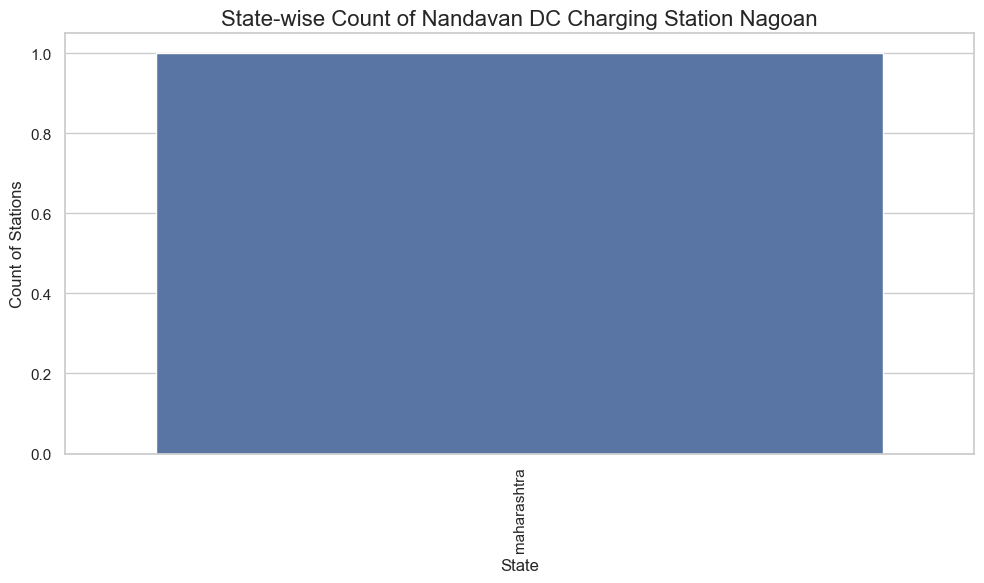

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


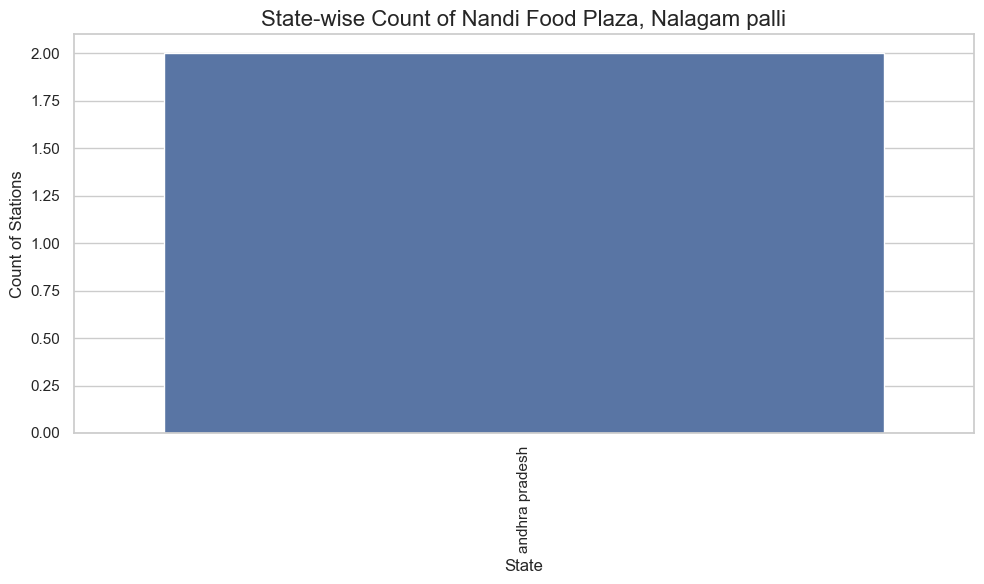

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


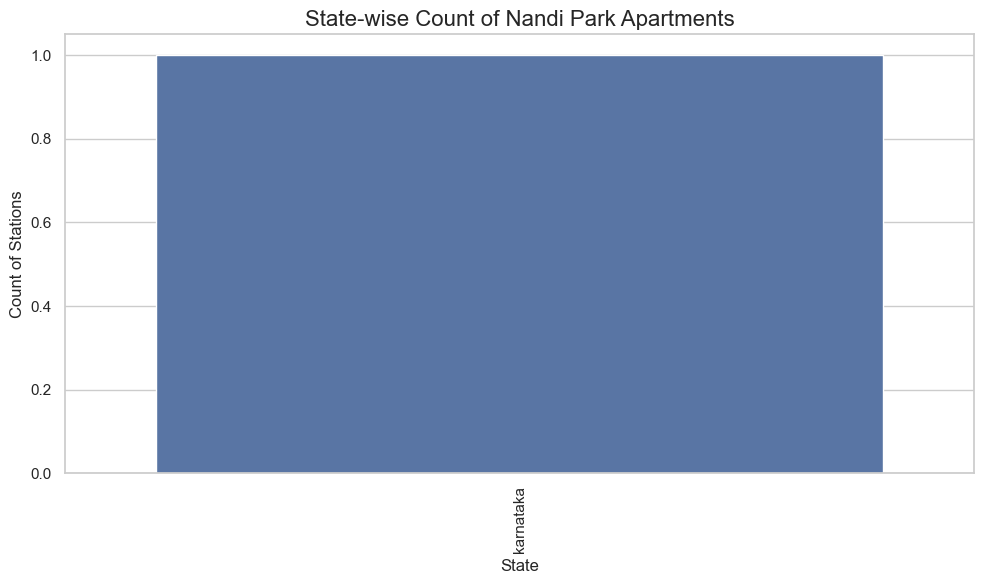

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


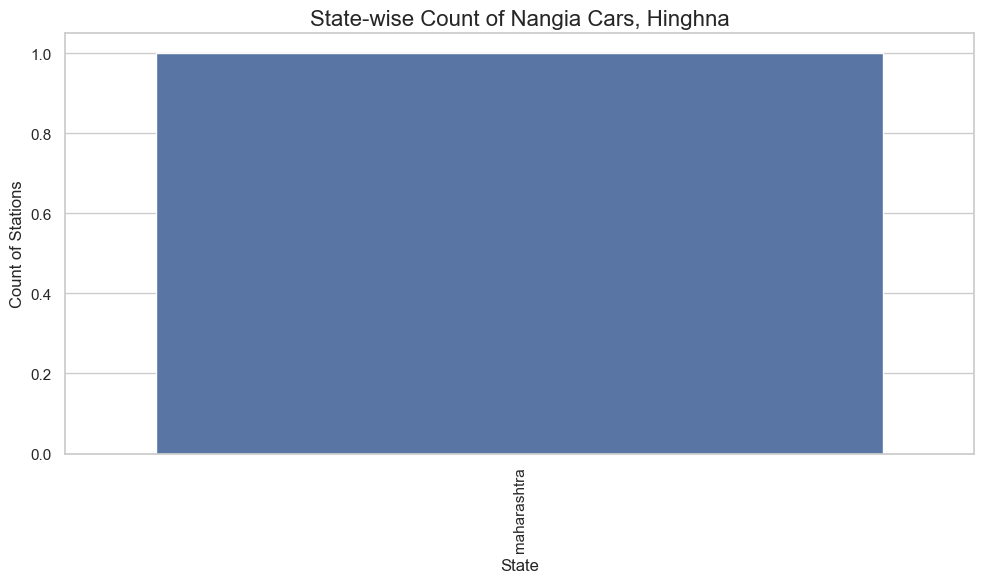

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


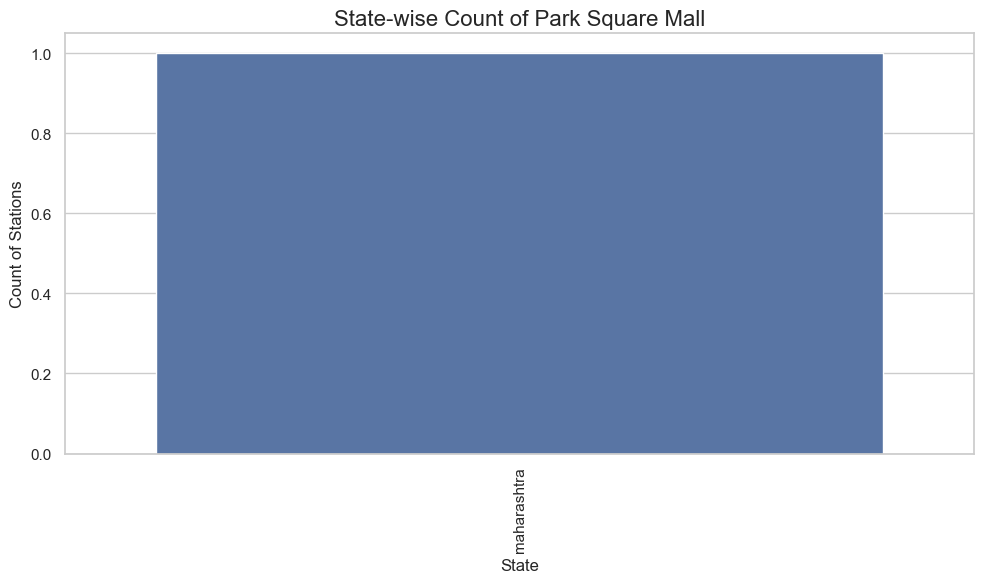

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


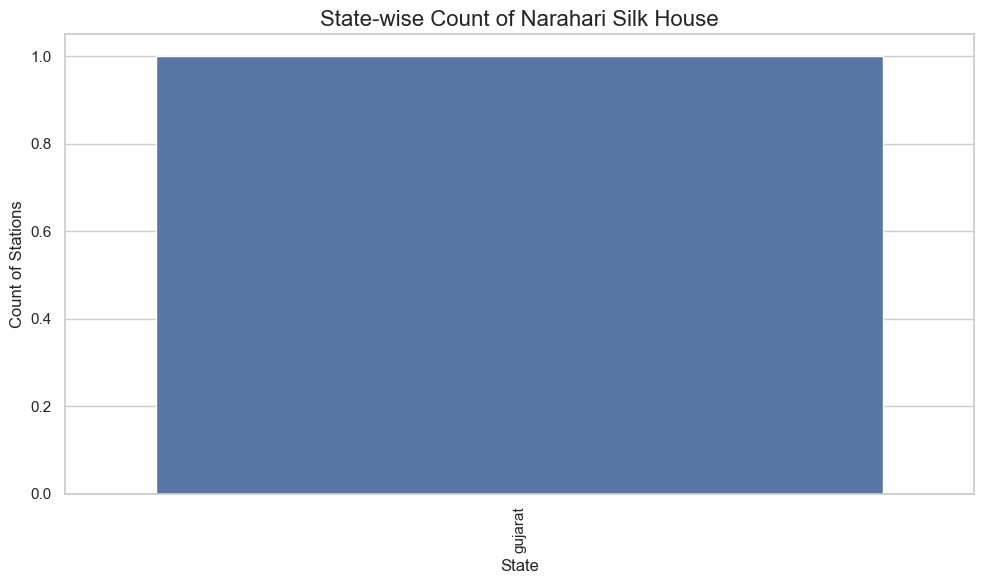

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


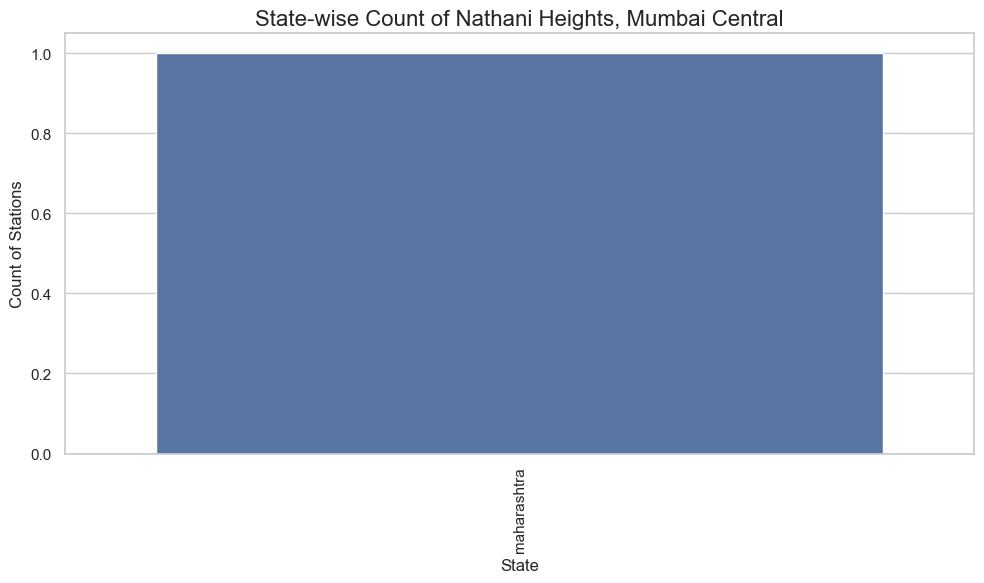

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


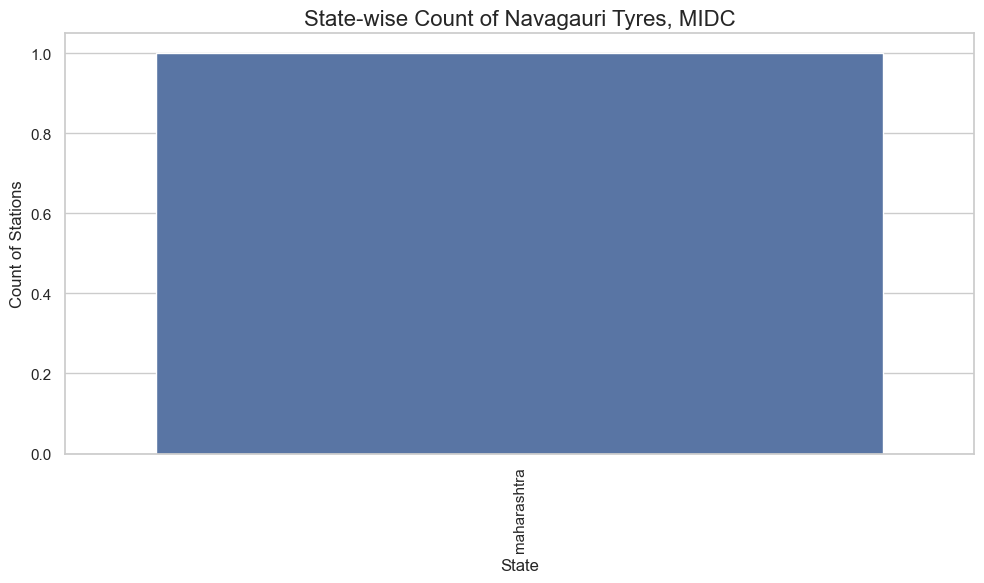

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


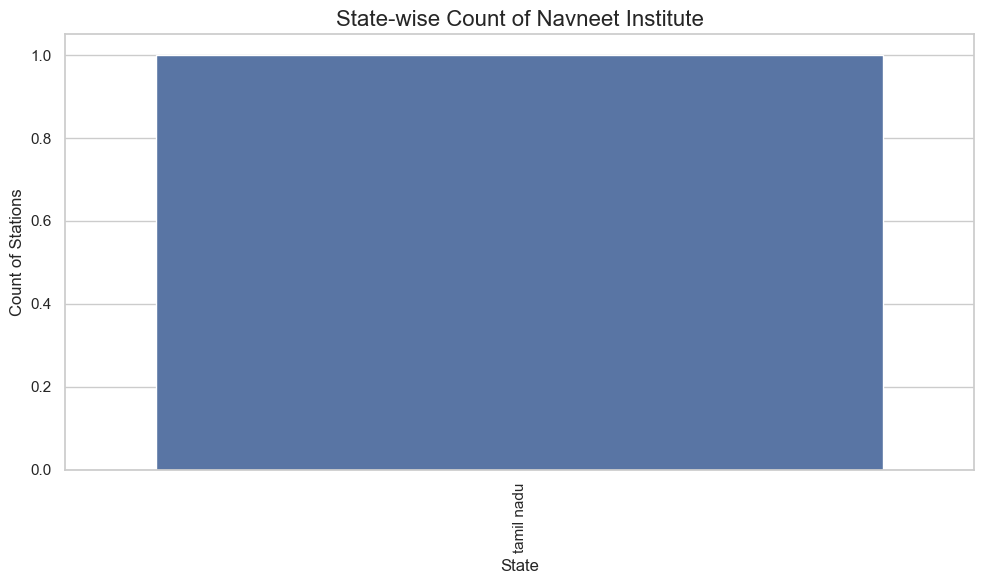

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


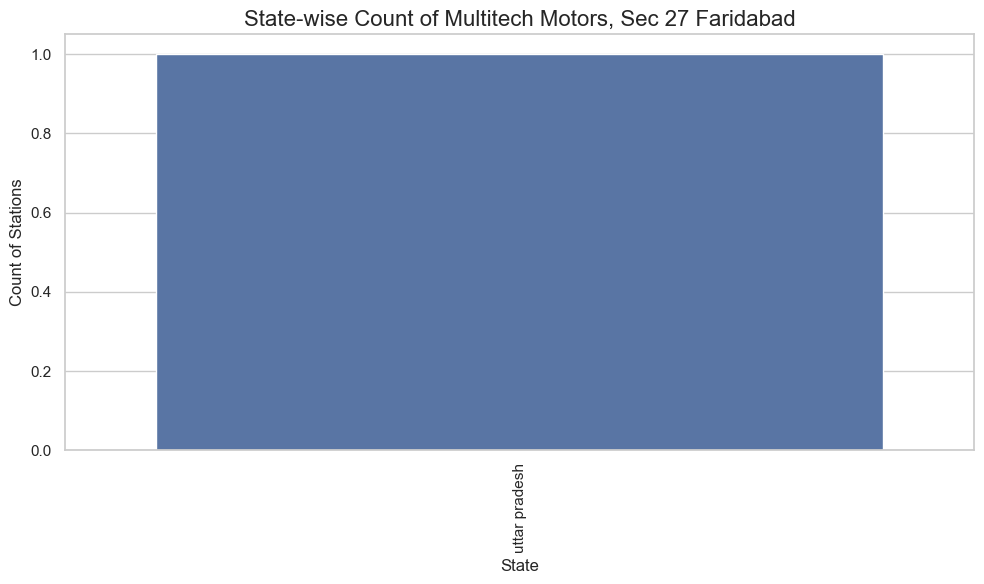

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


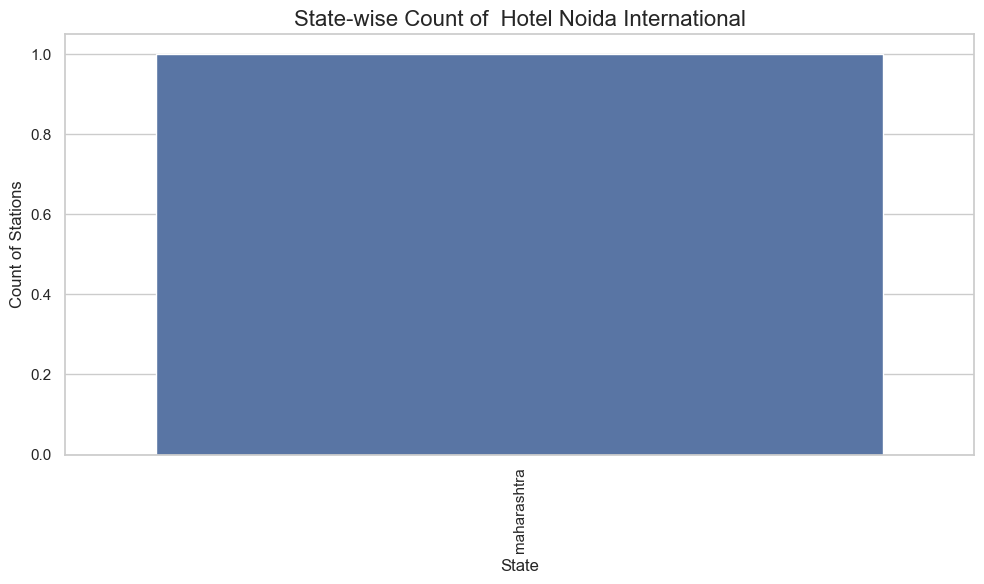

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


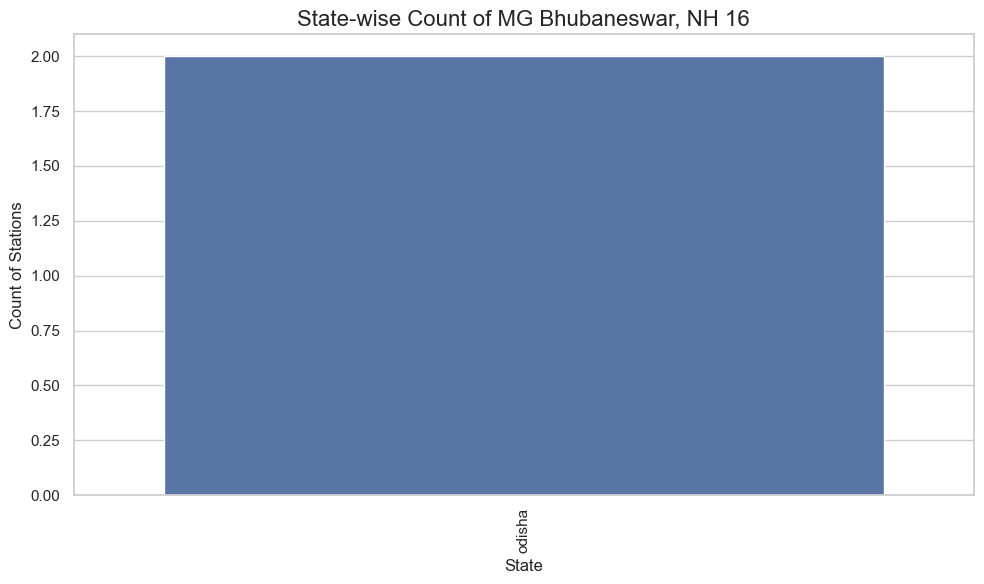

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


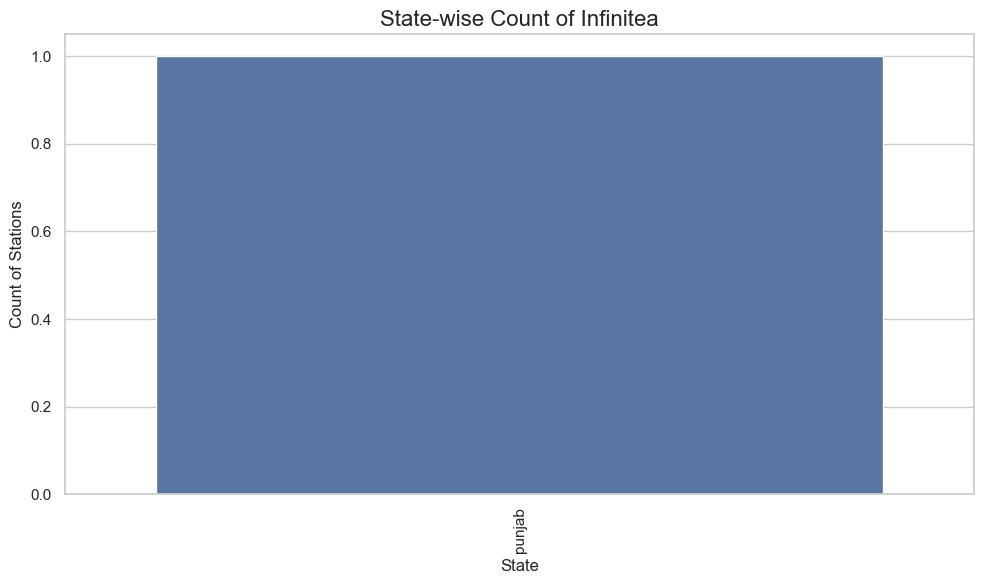

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


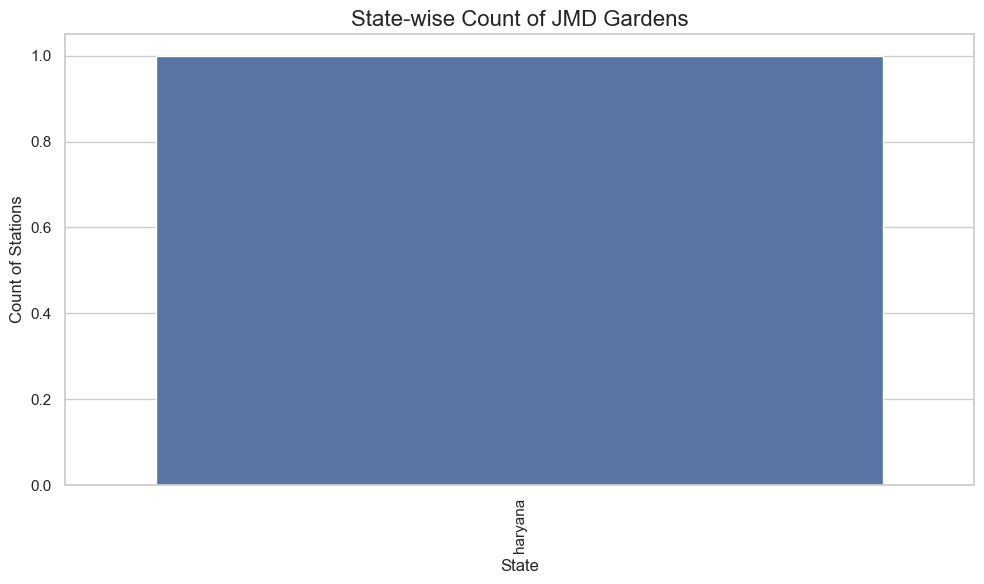

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


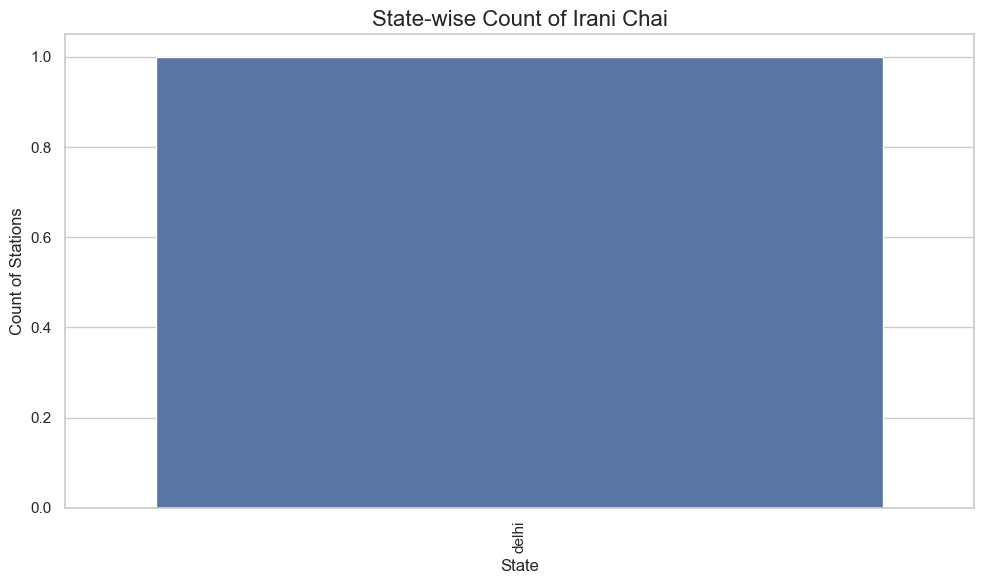

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


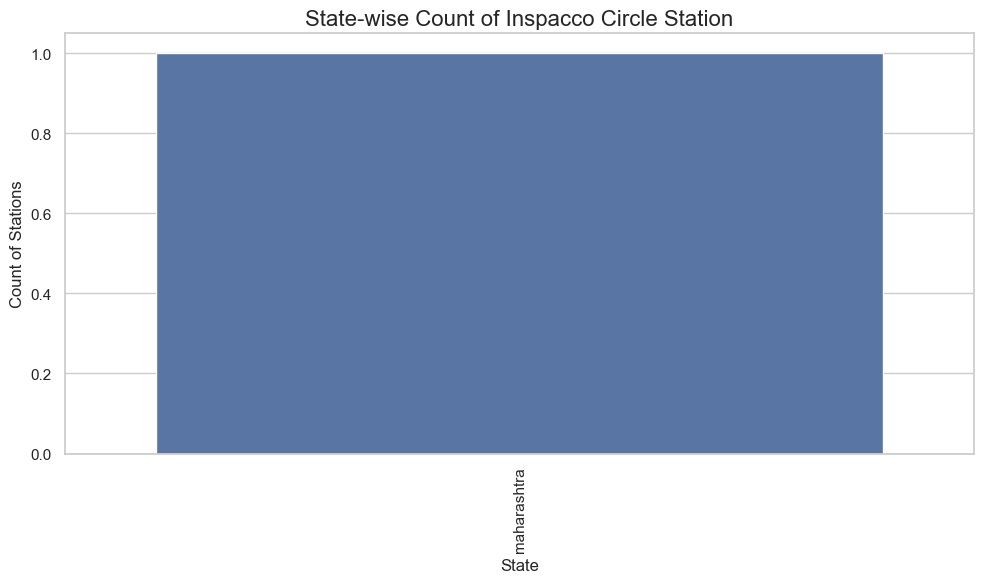

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


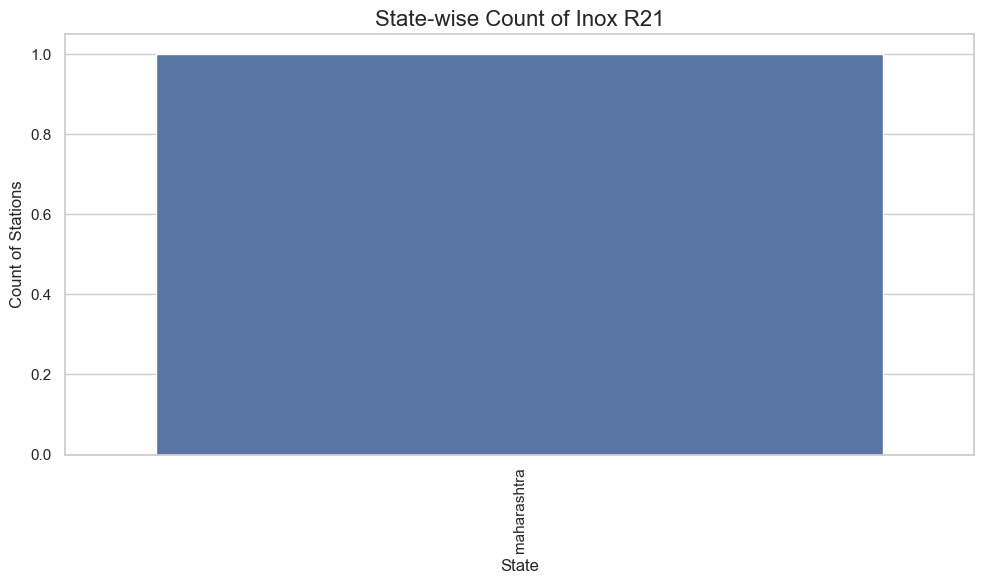

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


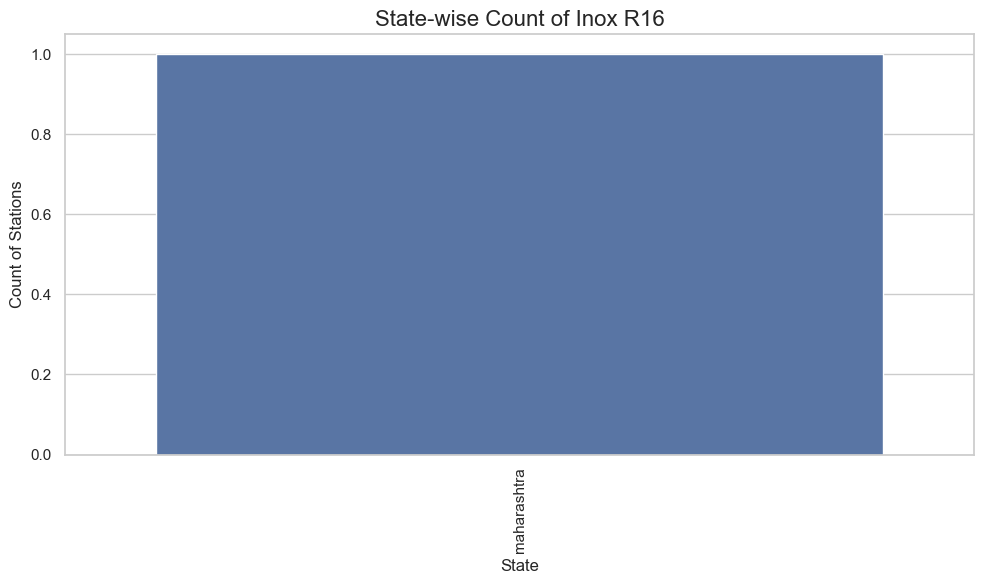

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


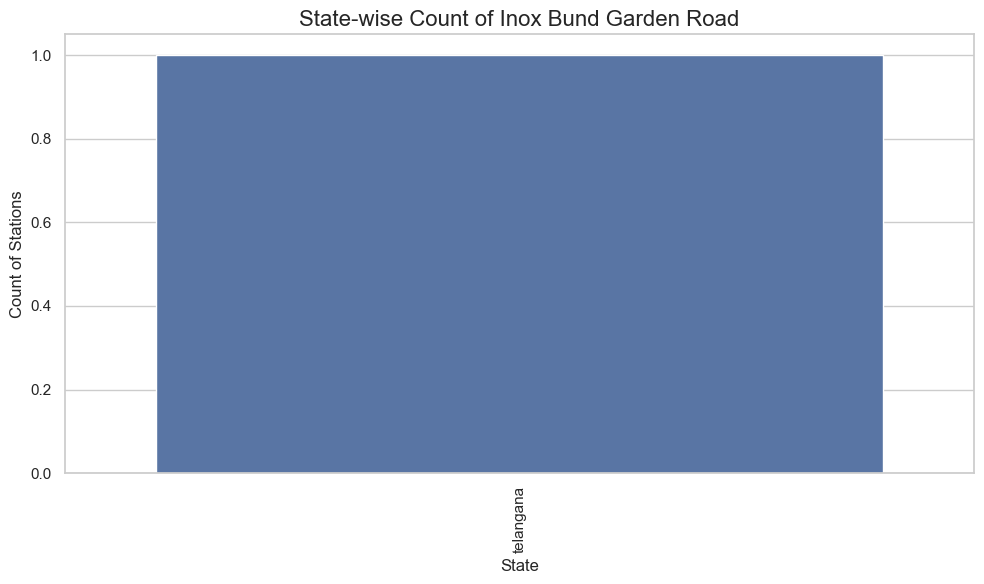

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


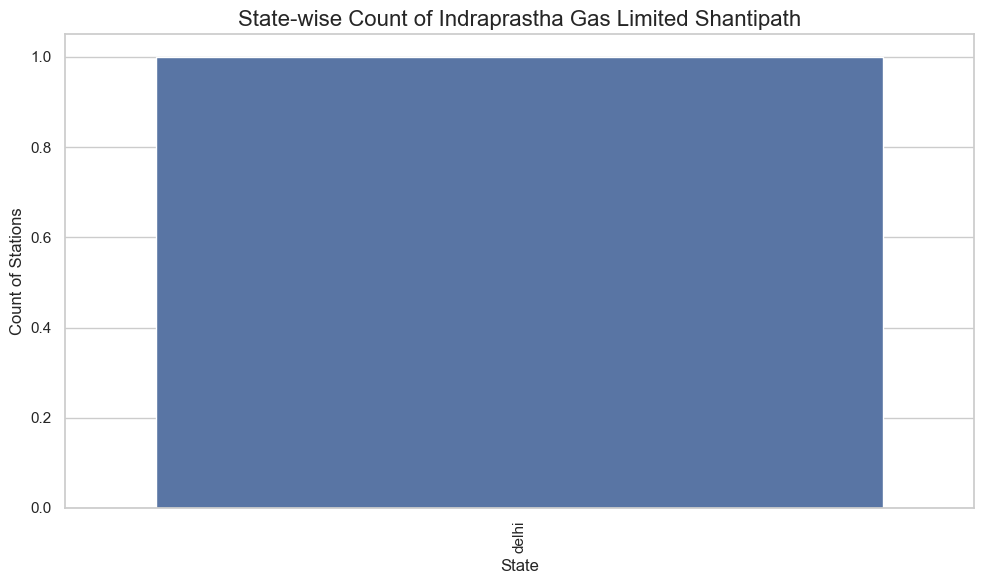

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


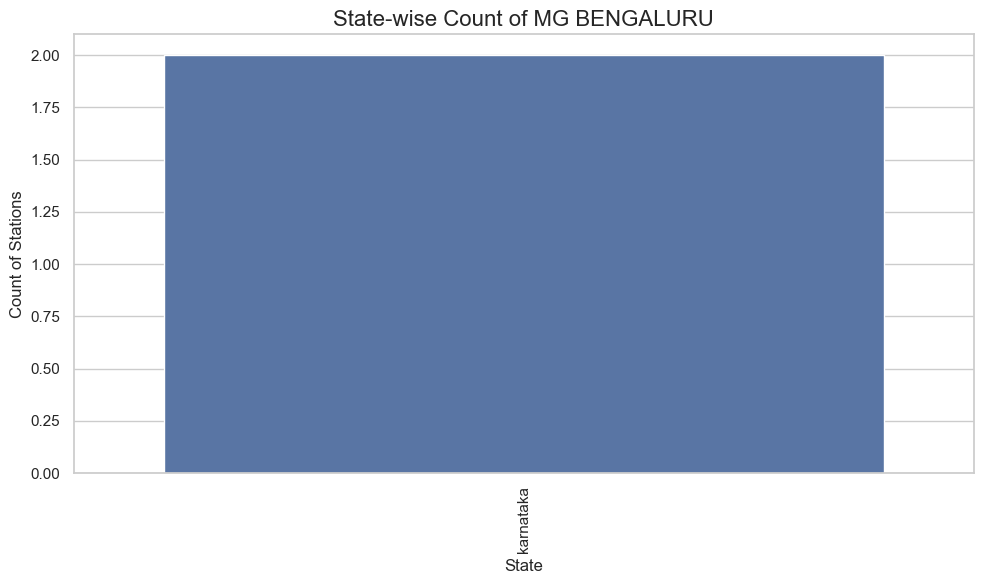

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


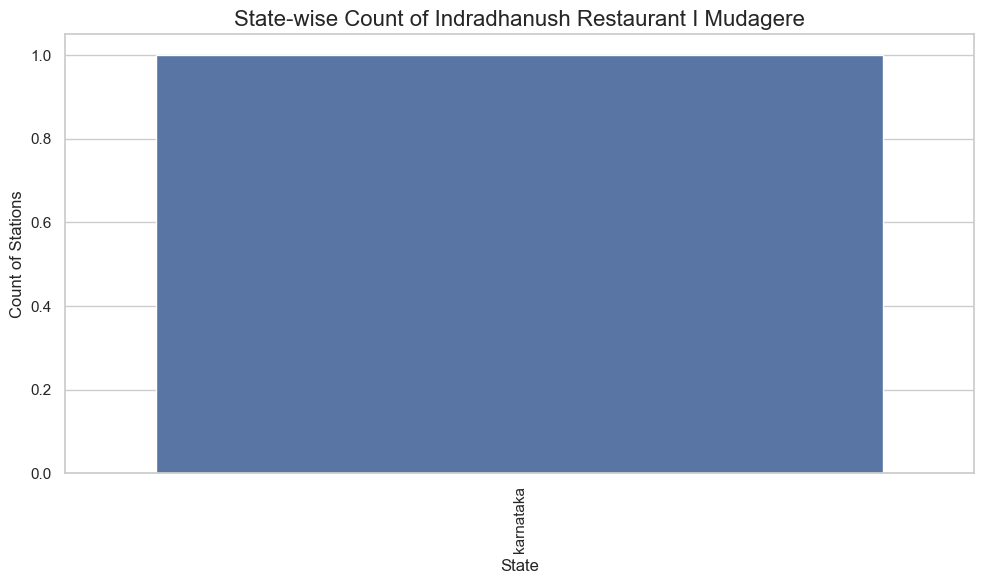

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


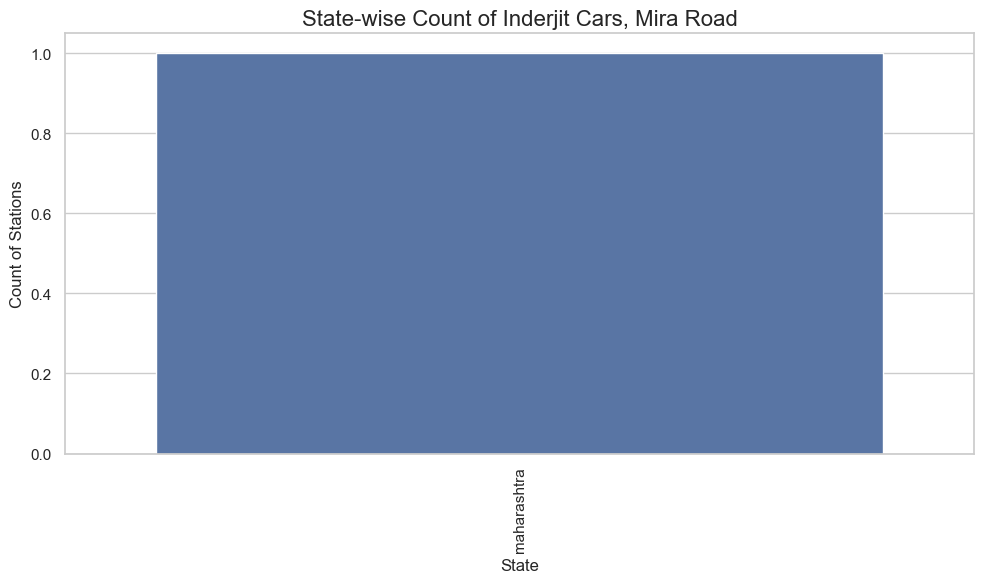

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


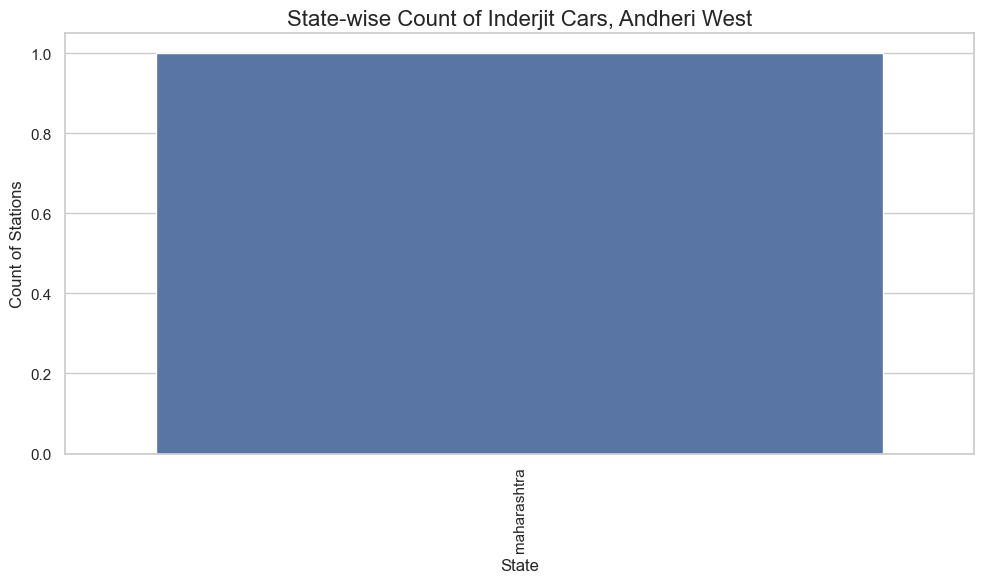

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


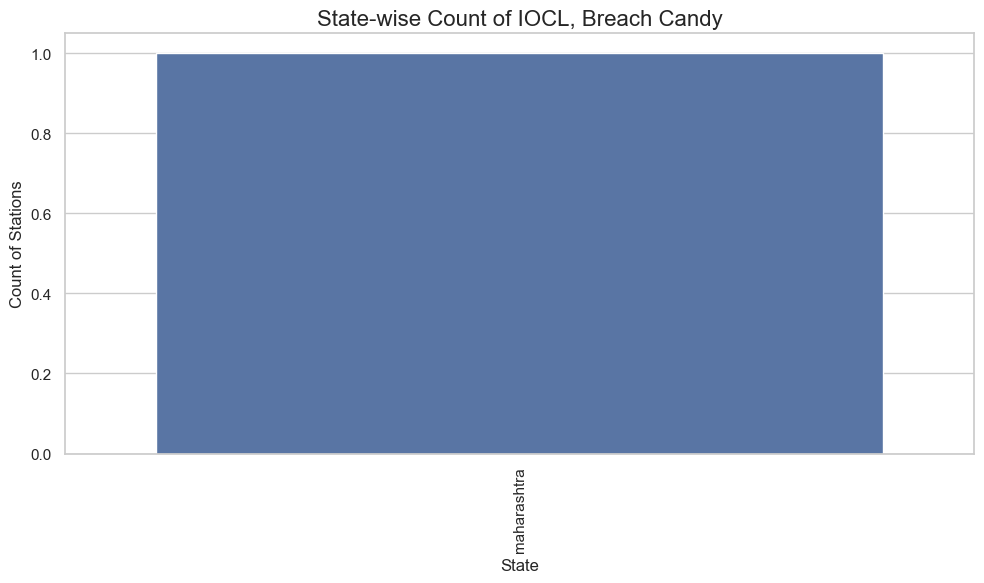

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


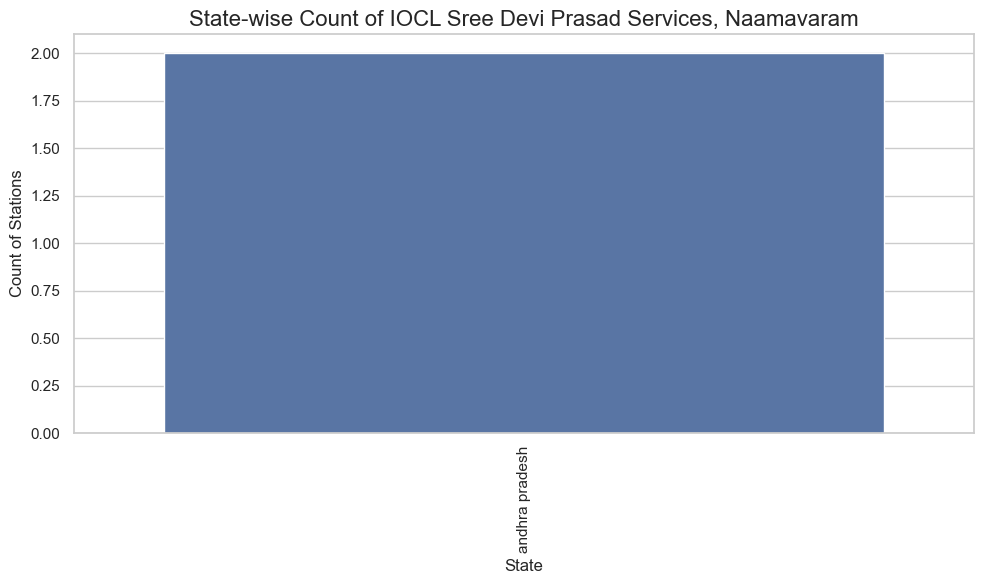

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


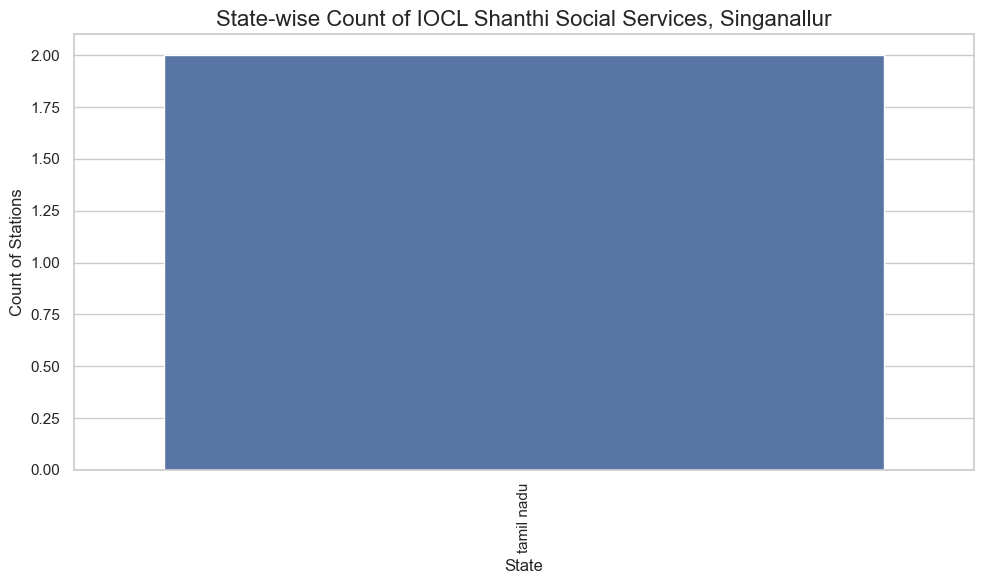

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


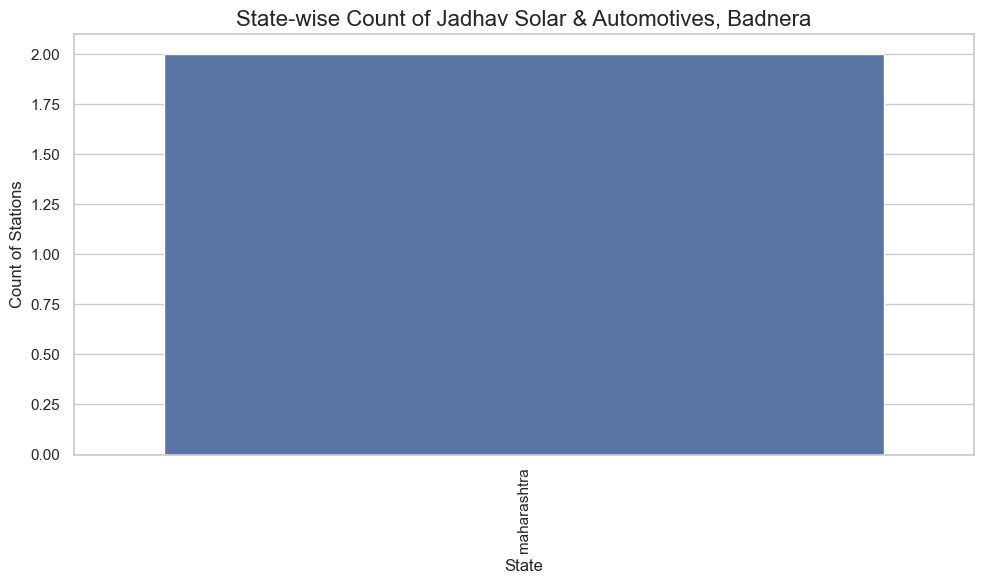

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


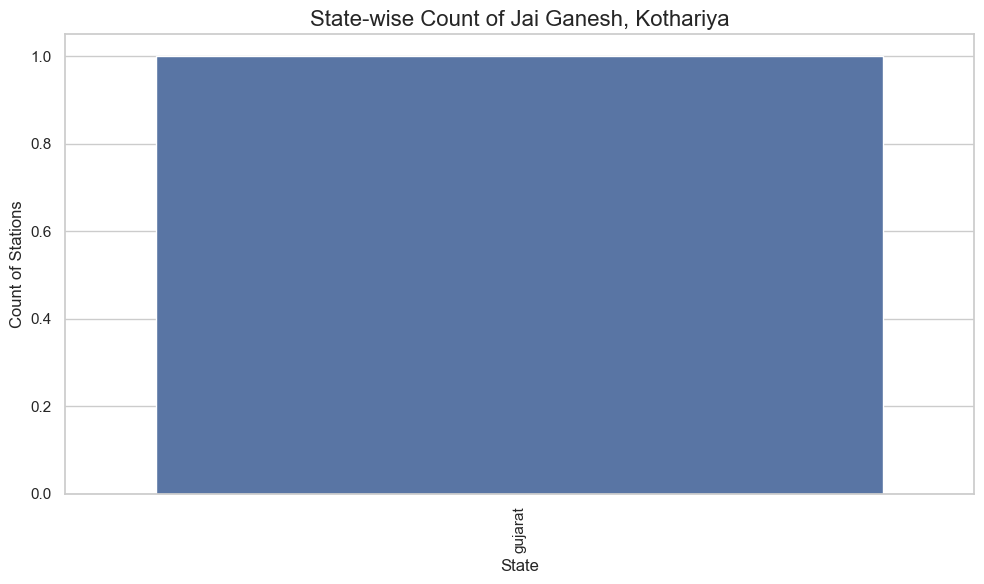

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


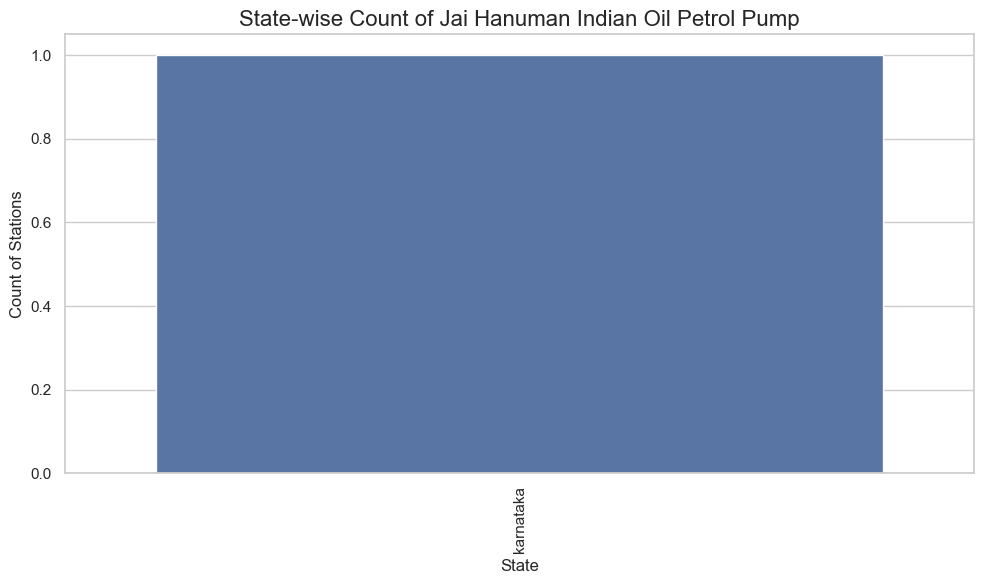

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


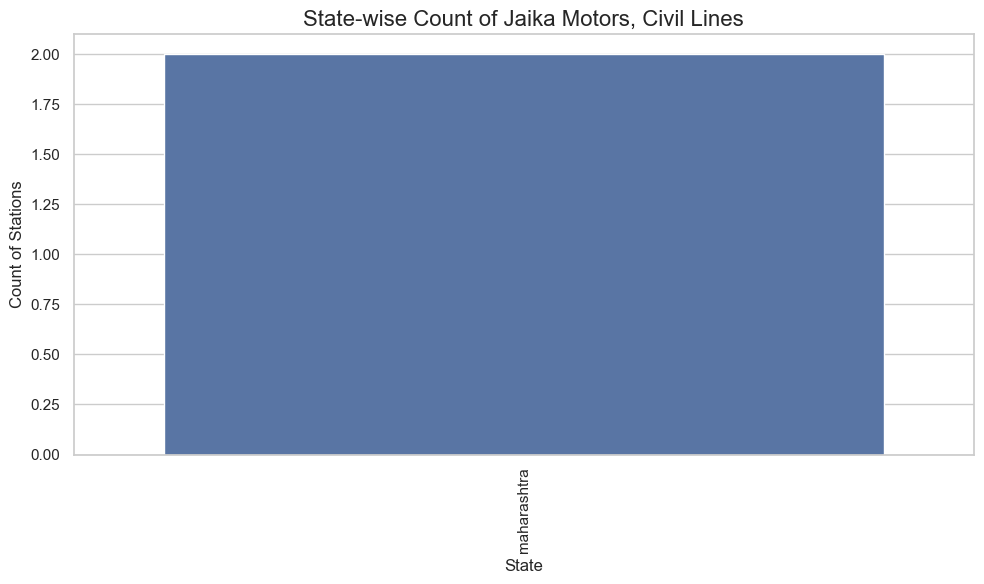

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


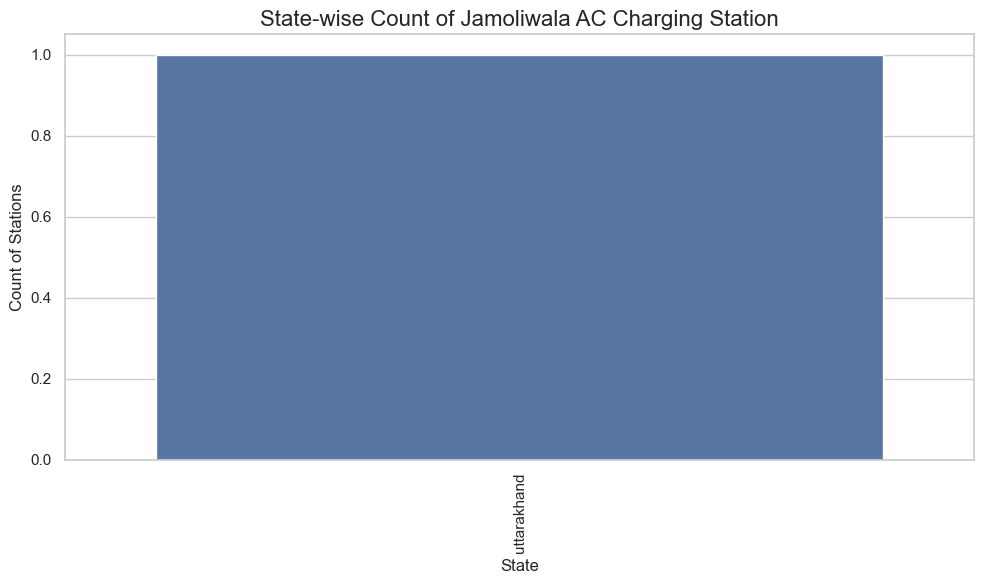

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


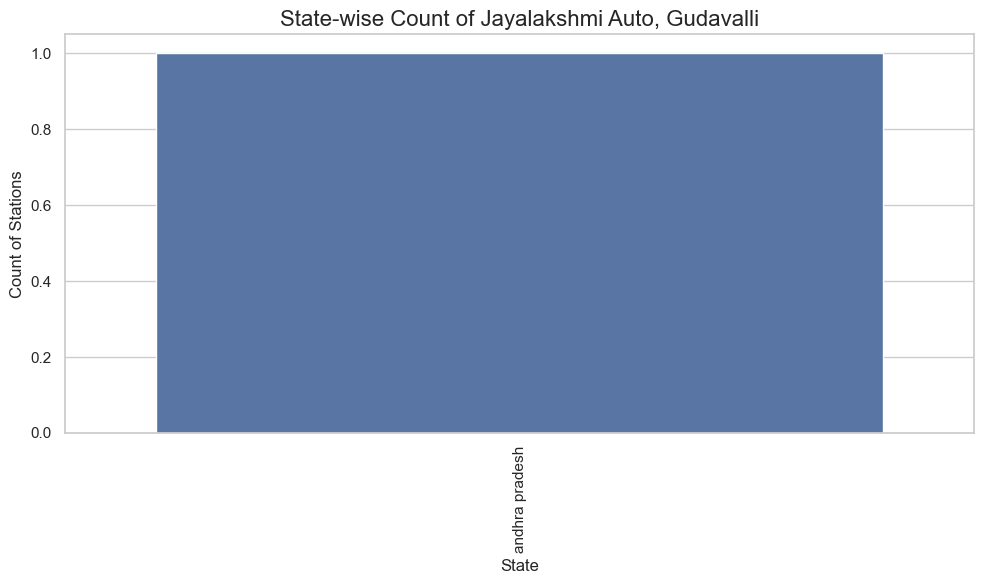

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


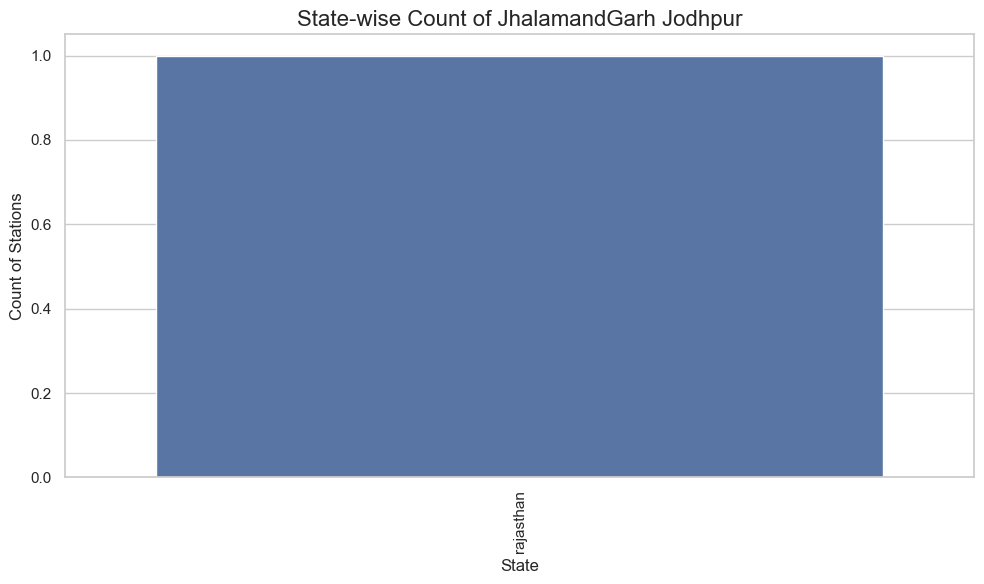

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


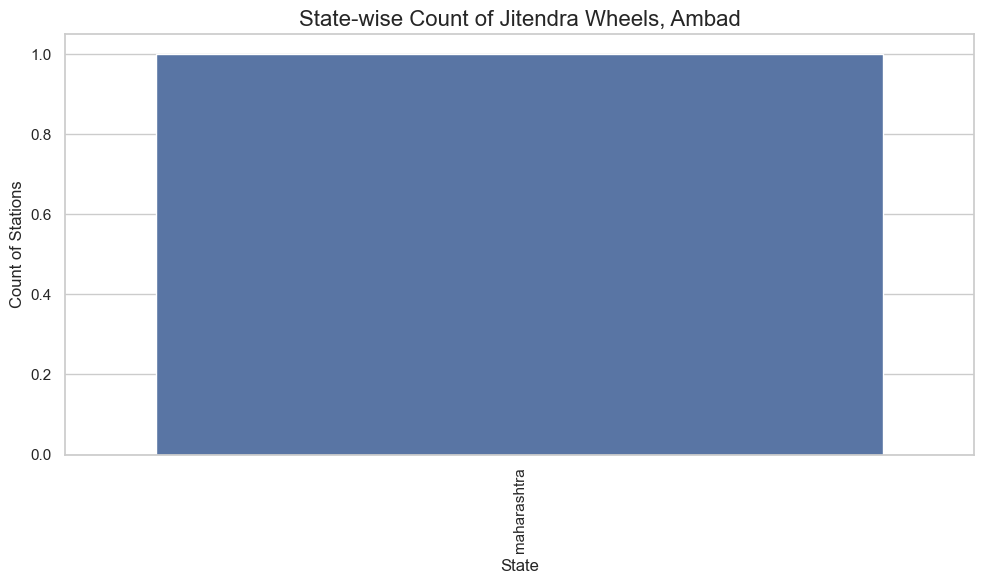

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


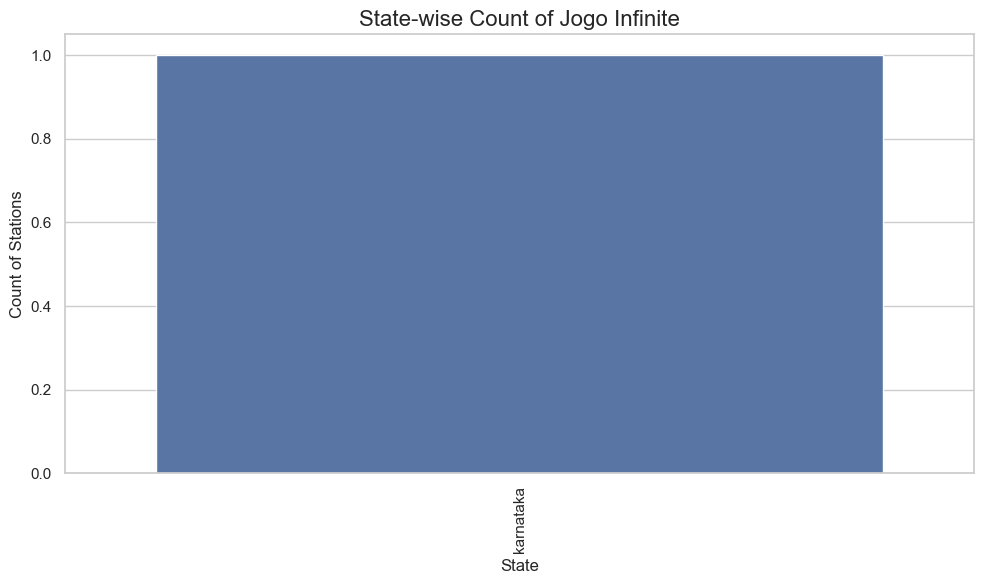

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


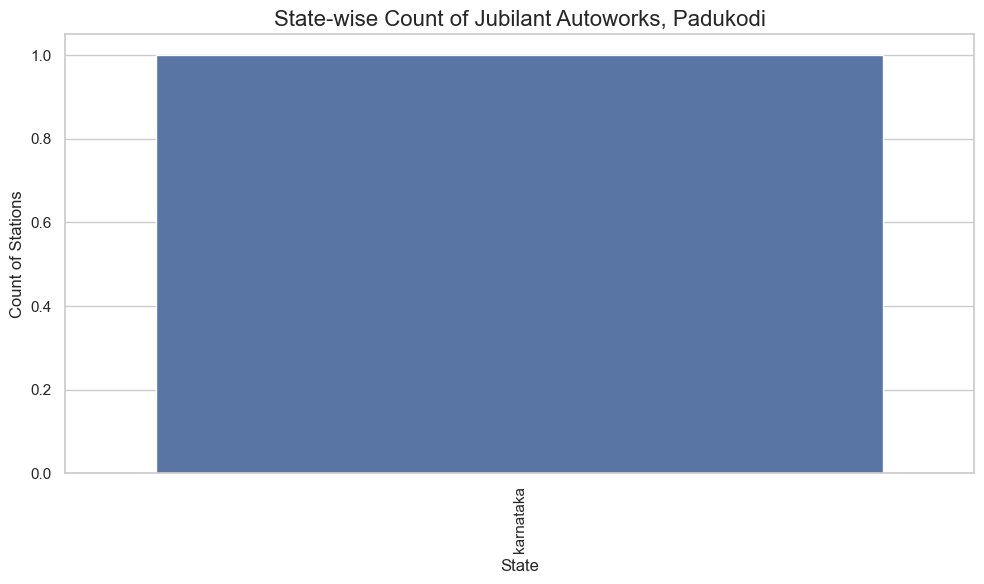

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


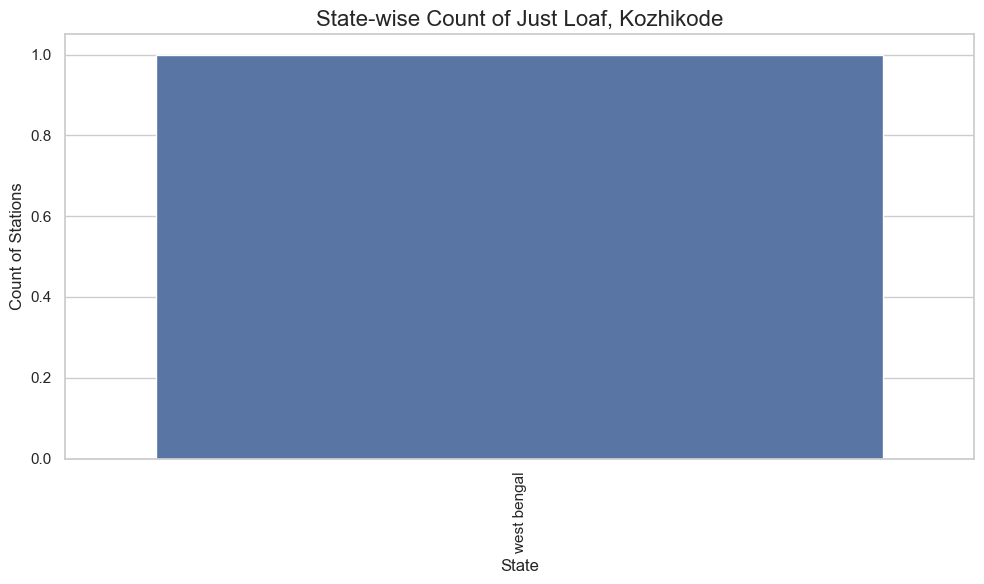

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


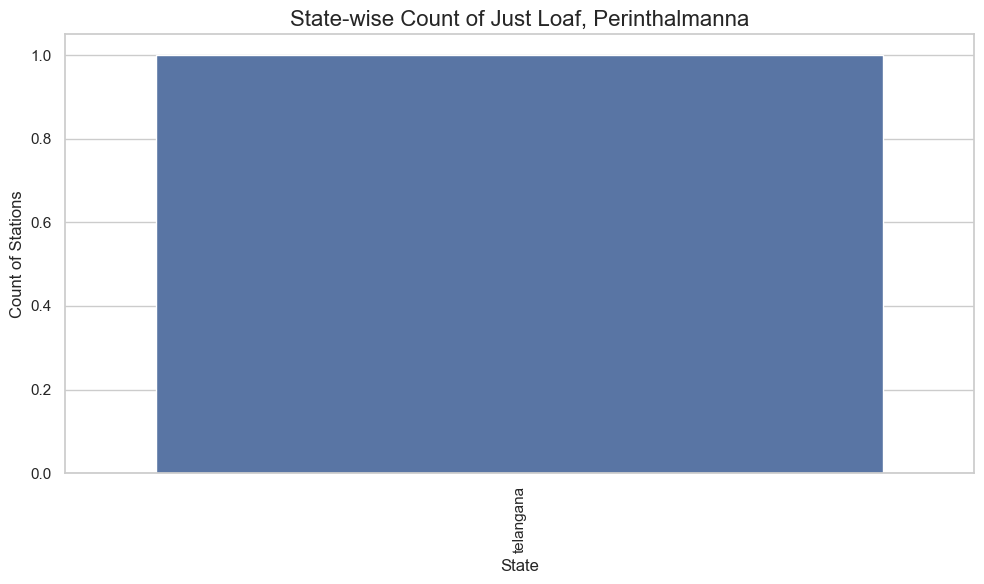

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


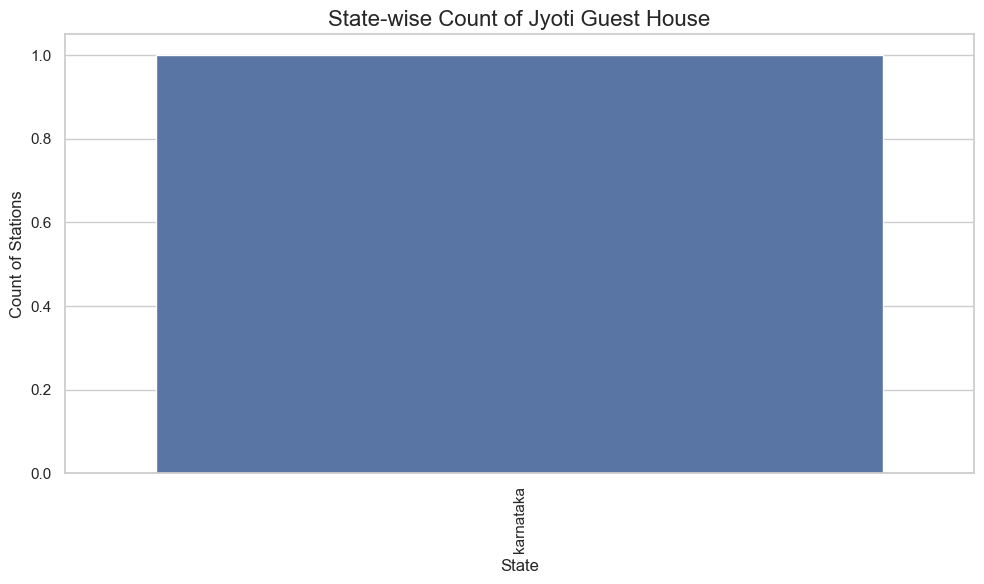

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


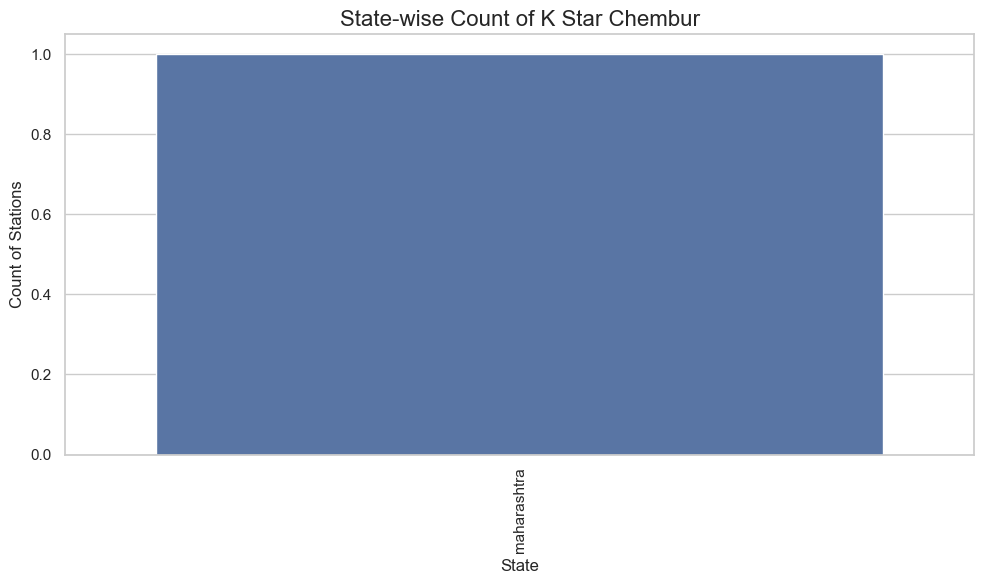

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


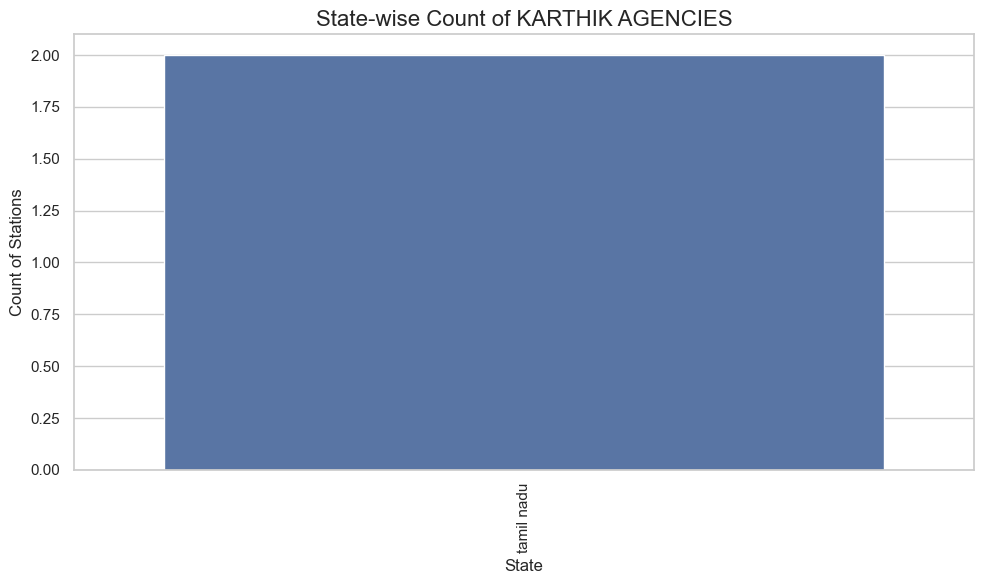

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


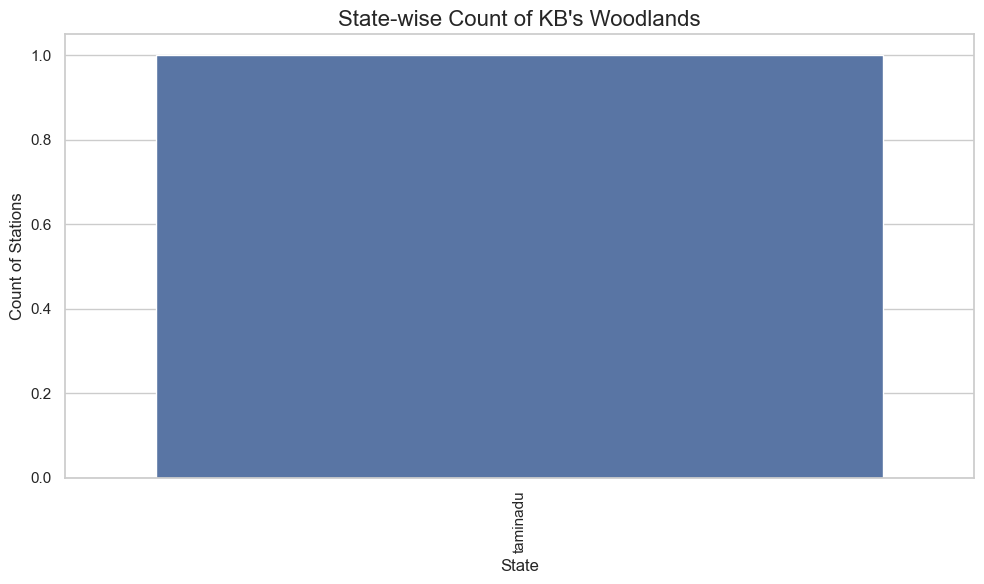

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


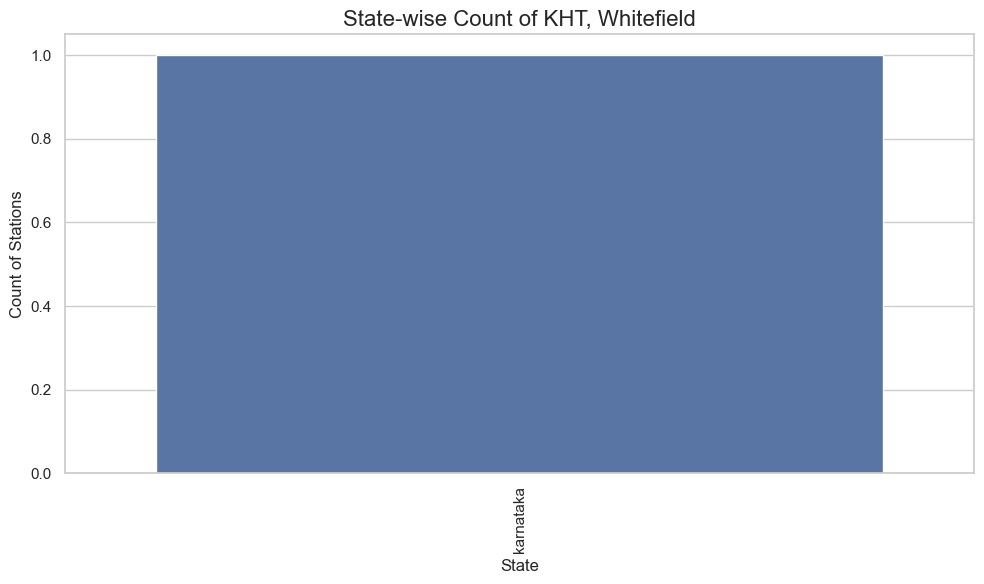

C:\Users\Visha\AppData\Local\Temp\ipykernel_30208\96092624.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='count', data=station_data, ci=None)


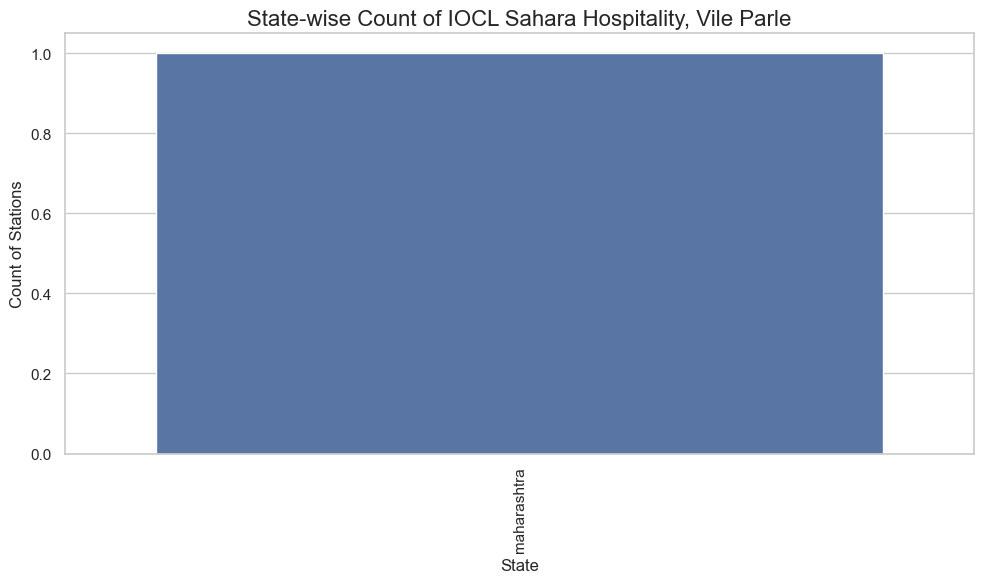

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
station_state_counts = charge.groupby(['name', 'state']).size().reset_index(name='count')
top_200_stations = charge.groupby('name')['state'].nunique().reset_index(name='unique_states_count')
top_200_stations = top_200_stations.sort_values(by='unique_states_count', ascending=False).head(200)['name']
filtered_data = station_state_counts[station_state_counts['name'].isin(top_200_stations)]
for station in top_200_stations:
    plt.figure(figsize=(10, 6))
    station_data = filtered_data[filtered_data['name'] == station]
    sns.barplot(x='state', y='count', data=station_data, ci=None)
    plt.xticks(rotation=90)  # Rotate state names for better readability
    plt.title(f'State-wise Count of {station}', fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Count of Stations', fontsize=12)
    plt.tight_layout()
    plt.show()


In [16]:

tata_power_ap = charge[(charge['name'] == 'Tata Power') & (charge['state'] == 'Andhra Pradesh'.lower())]
count_tata_power_ap = tata_power_ap.shape[0]

print(f"Count of Tata Power stations in Andhra Pradesh: {count_tata_power_ap}")


Count of Tata Power stations in Andhra Pradesh: 0


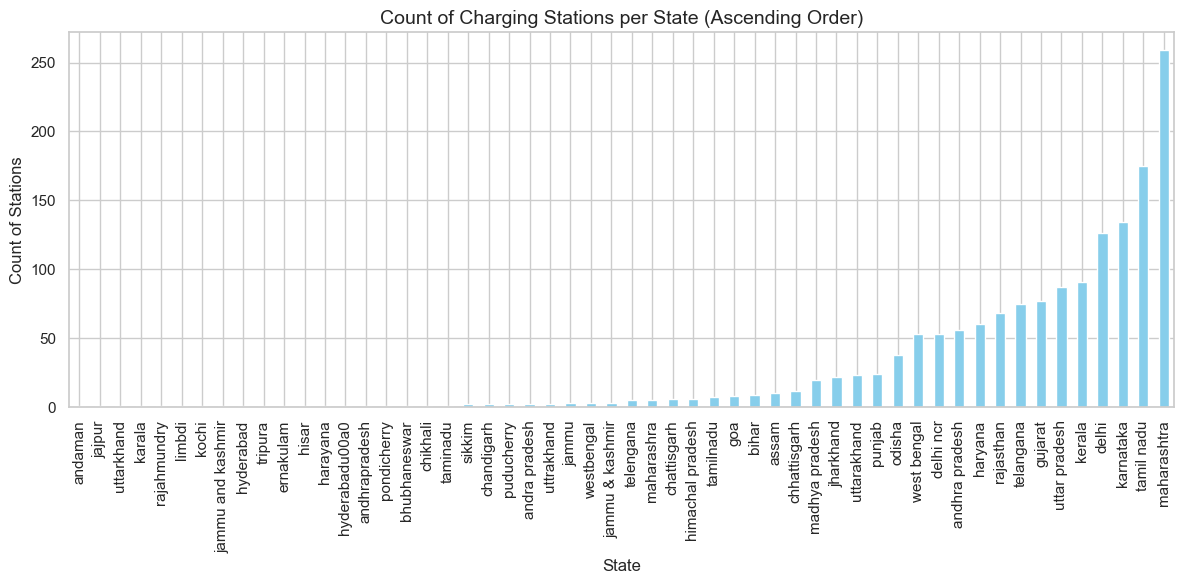

In [24]:
import matplotlib.pyplot as plt
state_station_counts = charge['state'].value_counts().sort_values()
plt.figure(figsize=(12, 6))
state_station_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Charging Stations per State (Ascending Order)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count of Stations', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KNN CLUSTERING FOR THE PREDUICTIONS OF THE WHEATHER THE PLACE IS GOOD FOR THE CHARGE STATION OR BAD

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
charge

name          state  \
0                    Neelkanth Star DC Charging Station        haryana   
1                          Galleria DC Charging Station        haryana   
2     Highway Xpress (Jaipur-Delhi) DC charging station      rajasthan   
3                     Food Carnival DC Charging Station  uttar pradesh   
4                     Food Carnival AC Charging Station  uttar pradesh   
...                                                 ...            ...   
1542                                        Tata Power          kerala   
1543                                        Tata Power         haryana   
1544                                        Tata Power         haryana   
1545                                        Tata Power           jammu   
1546                                        Tata Power       karnataka   

           city                                            address  \
0      Gurugram  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   
1      Gurugram  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   
2        Behror  Jaipur to Delhi Road, Behror Midway, Behror, R...   
3      Khatauli  Fun and Food Carnival, NH 58, Khatauli Bypass,...   
4      Khatauli  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   
...         ...                                                ...   
1542     Munnar  Gokulam Park Munnar, Power House Road, South C...   
1543    Gurgaon  Vatika Town Square II, Sector 82, Sector 82, V...   
1544    Gurgaon  Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...   
1545      Jammu  Le ROI, Jammu, Railway Station, Jammu, Jammu &...   
1546  Mangalore  Auto Matrix, Bejai, Manjusha Building, Bejai, ...   

       lattitude  longitude  type  
0        29.6019  76.980300  12.0  
1        28.4673  77.081800  12.0  
2        27.8751  76.276000  12.0  
3        29.3105  77.721800  12.0  
4        29.3105  77.721800  12.0  
...          ...        ...   ...  
1542  10.0297934  77.045859   7.0  
1543  28.3904593  76.959200   7.0  
1544   28.411072  77.040546   7.0  
1545  32.7064117  74.879203   7.0  
1546   12.885716  74.843476   7.0  

[1547 rows x 7 columns]

In [35]:
state_station_counts = charge.groupby('state').size().reset_index(name='Station_Count')
print(state_station_counts)


                state  Station_Count
0             andaman              1
1      andhra pradesh             56
2       andhrapradesh              1
3       andra pradesh              2
4               assam             10
5        bhubhaneswar              1
6               bihar              9
7          chandigarh              2
8         chattisgarh              6
9        chhattisgarh             12
10           chikhali              1
11              delhi            126
12          delhi ncr             53
13          ernakulam              1
14                goa              8
15            gujarat             77
16           harayana              1
17            haryana             60
18   himachal pradesh              6
19              hisar              1
20          hyderabad              1
21     hyderabadu00a0              1
22             jajpur              1
23              jammu              3
24    jammu & kashmir              3
25  jammu and kashmir              1
2

In [90]:

from sklearn.preprocessing import StandardScaler
state_station_counts = charge.groupby('state').size().reset_index(name='Station_Count')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_station_counts[['Station_Count']])
state_station_counts['Station_Count_Scaled'] = scaled_data
state_station_counts


state  Station_Count  Station_Count_Scaled
0             andaman              1             -0.551616
1      andhra pradesh             56              0.545704
2       andhrapradesh              1             -0.551616
3       andra pradesh              2             -0.531664
4               assam             10             -0.372054
5        bhubhaneswar              1             -0.551616
6               bihar              9             -0.392005
7          chandigarh              2             -0.531664
8         chattisgarh              6             -0.451859
9        chhattisgarh             12             -0.332152
10           chikhali              1             -0.551616
11              delhi            126              1.942293
12          delhi ncr             53              0.485850
13          ernakulam              1             -0.551616
14                goa              8             -0.411957
15            gujarat             77              0.964681
16           harayana              1             -0.551616
17            haryana             60              0.625509
18   himachal pradesh              6             -0.451859
19              hisar              1             -0.551616
20          hyderabad              1             -0.551616
21     hyderabadu00a0              1             -0.551616
22             jajpur              1             -0.551616
23              jammu              3             -0.511713
24    jammu & kashmir              3             -0.511713
25  jammu and kashmir              1             -0.551616
26          jharkhand             22             -0.132639
27             karala              1             -0.551616
28          karnataka            134              2.101903
29             kerala             91              1.243998
30              kochi              1             -0.551616
31             limbdi              1             -0.551616
32     madhya pradesh             20             -0.172542
33         maharashra              5             -0.471811
34        maharashtra            259              4.595811
35             odisha             38              0.186581
36        pondicherry              1             -0.551616
37         puducherry              2             -0.531664
38             punjab             24             -0.092736
39        rajahmundry              1             -0.551616
40          rajasthan             68              0.785119
41             sikkim              2             -0.531664
42         tamil nadu            175              2.919905
43          tamilnadu              7             -0.431908
44           taminadu              1             -0.551616
45          telangana             75              0.924778
46          telengana              5             -0.471811
47            tripura              1             -0.551616
48      uttar pradesh             87              1.164193
49        uttarakhand             23             -0.112688
50         uttarkhand              1             -0.551616
51         uttrakhand              2             -0.531664
52        west bengal             53              0.485850
53         westbengal              3             -0.511713

In [93]:

state_station_counts['Good_or_Bad'] = state_station_counts['Station_Count_Scaled'].apply(lambda x: 'Good' if x > 0 else 'Bad')
state_station_counts

state  Station_Count  Station_Count_Scaled Good_or_Bad
0             andaman              1             -0.551616         Bad
1      andhra pradesh             56              0.545704        Good
2       andhrapradesh              1             -0.551616         Bad
3       andra pradesh              2             -0.531664         Bad
4               assam             10             -0.372054         Bad
5        bhubhaneswar              1             -0.551616         Bad
6               bihar              9             -0.392005         Bad
7          chandigarh              2             -0.531664         Bad
8         chattisgarh              6             -0.451859         Bad
9        chhattisgarh             12             -0.332152         Bad
10           chikhali              1             -0.551616         Bad
11              delhi            126              1.942293        Good
12          delhi ncr             53              0.485850        Good
13          ernakulam              1             -0.551616         Bad
14                goa              8             -0.411957         Bad
15            gujarat             77              0.964681        Good
16           harayana              1             -0.551616         Bad
17            haryana             60              0.625509        Good
18   himachal pradesh              6             -0.451859         Bad
19              hisar              1             -0.551616         Bad
20          hyderabad              1             -0.551616         Bad
21     hyderabadu00a0              1             -0.551616         Bad
22             jajpur              1             -0.551616         Bad
23              jammu              3             -0.511713         Bad
24    jammu & kashmir              3             -0.511713         Bad
25  jammu and kashmir              1             -0.551616         Bad
26          jharkhand             22             -0.132639         Bad
27             karala              1             -0.551616         Bad
28          karnataka            134              2.101903        Good
29             kerala             91              1.243998        Good
30              kochi              1             -0.551616         Bad
31             limbdi              1             -0.551616         Bad
32     madhya pradesh             20             -0.172542         Bad
33         maharashra              5             -0.471811         Bad
34        maharashtra            259              4.595811        Good
35             odisha             38              0.186581        Good
36        pondicherry              1             -0.551616         Bad
37         puducherry              2             -0.531664         Bad
38             punjab             24             -0.092736         Bad
39        rajahmundry              1             -0.551616         Bad
40          rajasthan             68              0.785119        Good
41             sikkim              2             -0.531664         Bad
42         tamil nadu            175              2.919905        Good
43          tamilnadu              7             -0.431908         Bad
44           taminadu              1             -0.551616         Bad
45          telangana             75              0.924778        Good
46          telengana              5             -0.471811         Bad
47            tripura              1             -0.551616         Bad
48      uttar pradesh             87              1.164193        Good
49        uttarakhand             23             -0.112688         Bad
50         uttarkhand              1             -0.551616         Bad
51         uttrakhand              2             -0.531664         Bad
52        west bengal             53              0.485850        Good
53         westbengal              3             -0.511713         Bad

In [94]:
from sklearn.model_selection import train_test_split
X = state_station_counts[['Station_Count_Scaled','state','Station_Count']]   
y = state_station_counts['Good_or_Bad']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming state_station_counts is the DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Ensure the 'state' column is treated as categorical data
state_station_counts['state'] = state_station_counts['state'].astype(str)

# Split the data into features and target variable
X = state_station_counts[['Station_Count_Scaled', 'state', 'Station_Count']]   
y = state_station_counts['Good_or_Bad']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit LabelEncoder on the training data
label_encoder.fit(X_train['state'])

# Function to handle unseen labels in the test set
def handle_unseen_labels(val, encoder):
    if val in encoder.classes_:
        return encoder.transform([val])[0]
    else:
        # Return a default value for unseen labels, e.g., last known label
        return len(encoder.classes_)

# Apply LabelEncoder to the 'state' column (only on the train and test set)
X_train['state'] = label_encoder.transform(X_train['state'])  # Fit and transform on train

# For the test set, apply the function to handle unseen labels
X_test['state'] = X_test['state'].apply(lambda x: handle_unseen_labels(x, label_encoder))  # Handle unseen labels

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00         7
        Good       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [100]:
state_station_counts

state  Station_Count  Station_Count_Scaled Good_or_Bad
0             andaman              1             -0.551616         Bad
1      andhra pradesh             56              0.545704        Good
2       andhrapradesh              1             -0.551616         Bad
3       andra pradesh              2             -0.531664         Bad
4               assam             10             -0.372054         Bad
5        bhubhaneswar              1             -0.551616         Bad
6               bihar              9             -0.392005         Bad
7          chandigarh              2             -0.531664         Bad
8         chattisgarh              6             -0.451859         Bad
9        chhattisgarh             12             -0.332152         Bad
10           chikhali              1             -0.551616         Bad
11              delhi            126              1.942293        Good
12          delhi ncr             53              0.485850        Good
13          ernakulam              1             -0.551616         Bad
14                goa              8             -0.411957         Bad
15            gujarat             77              0.964681        Good
16           harayana              1             -0.551616         Bad
17            haryana             60              0.625509        Good
18   himachal pradesh              6             -0.451859         Bad
19              hisar              1             -0.551616         Bad
20          hyderabad              1             -0.551616         Bad
21     hyderabadu00a0              1             -0.551616         Bad
22             jajpur              1             -0.551616         Bad
23              jammu              3             -0.511713         Bad
24    jammu & kashmir              3             -0.511713         Bad
25  jammu and kashmir              1             -0.551616         Bad
26          jharkhand             22             -0.132639         Bad
27             karala              1             -0.551616         Bad
28          karnataka            134              2.101903        Good
29             kerala             91              1.243998        Good
30              kochi              1             -0.551616         Bad
31             limbdi              1             -0.551616         Bad
32     madhya pradesh             20             -0.172542         Bad
33         maharashra              5             -0.471811         Bad
34        maharashtra            259              4.595811        Good
35             odisha             38              0.186581        Good
36        pondicherry              1             -0.551616         Bad
37         puducherry              2             -0.531664         Bad
38             punjab             24             -0.092736         Bad
39        rajahmundry              1             -0.551616         Bad
40          rajasthan             68              0.785119        Good
41             sikkim              2             -0.531664         Bad
42         tamil nadu            175              2.919905        Good
43          tamilnadu              7             -0.431908         Bad
44           taminadu              1             -0.551616         Bad
45          telangana             75              0.924778        Good
46          telengana              5             -0.471811         Bad
47            tripura              1             -0.551616         Bad
48      uttar pradesh             87              1.164193        Good
49        uttarakhand             23             -0.112688         Bad
50         uttarkhand              1             -0.551616         Bad
51         uttrakhand              2             -0.531664         Bad
52        west bengal             53              0.485850        Good
53         westbengal              3             -0.511713         Bad

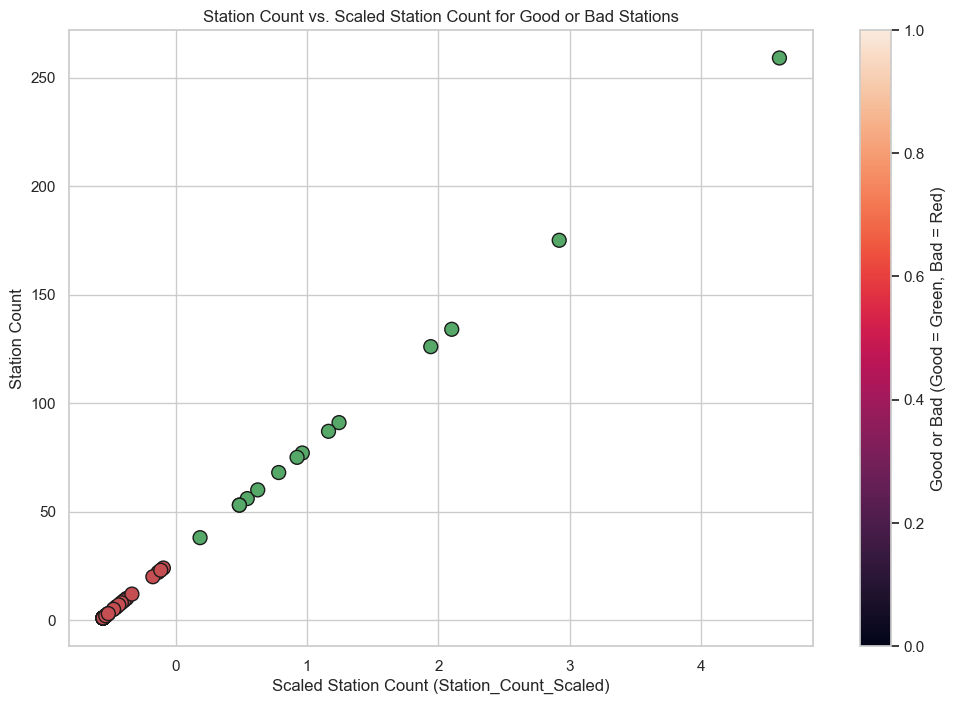

In [101]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(state_station_counts['Station_Count_Scaled'], 
            state_station_counts['Station_Count'], 
            c=state_station_counts['Good_or_Bad'].map({'Good': 'g', 'Bad': 'r'}), 
            edgecolors='k', s=100)

# Adding title and labels
plt.title('Station Count vs. Scaled Station Count for Good or Bad Stations')
plt.xlabel('Scaled Station Count (Station_Count_Scaled)')
plt.ylabel('Station Count')
plt.colorbar(label='Good or Bad (Good = Green, Bad = Red)')

# Show grid
plt.grid(True)
plt.show()


ITS SIMPLY LOOKS LIKE A LINEAR REGRESSION

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# 2. Fit (Train) the model
knn.fit(X_train[['Station_Count_Scaled', 'Station_Count']], y_train)

# 3. Now take user input
station_count_input = float(input("Enter Station Count: "))

# 4. Scale the input based on your existing dataset
scaled_station_count = (station_count_input - state_station_counts['Station_Count'].mean()) / state_station_counts['Station_Count'].std()

# 5. Create a DataFrame for prediction
input_data = pd.DataFrame([[scaled_station_count, station_count_input]], columns=['Station_Count_Scaled', 'Station_Count'])

# 6. Predict
prediction = knn.predict(input_data)

# 7. Output
if prediction[0] == 'Good':
    print("✅ It's a GOOD place to launch your EV VEHICLE.")
else:
    print("⚠️ It's a BAD place to launch your EV VEHICLE.")


Enter Station Count:  78


✅ It's a GOOD place to launch your EV VEHICLE.
